# TELECOM CHURN CASE STUDY

## Problem Statement

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## Objective

#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Understanding Data

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Reading the data file.
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# Understanding acronyms in the data using data dictionary.
df_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [7]:
df_dict

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [8]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [9]:
# Finding Column unique values and dropping columns with unique value as 1 as it does not help in analysis

col_v1=[]
for i in df.columns:
    if df[i].nunique() == 1:
        col_v1.append(i)
    else:
        pass

df.drop(col_v1, axis=1, inplace = True)
print(col_v1)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
df.shape

(99999, 210)

In [11]:
# Identifying missing values in the data set

df.isnull().sum().sum()/len(df)

35.46714467144672

In [12]:
((df.isnull().sum()/ len(df))*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

## Data Preparation



### 1.Filter high-value customers

We have to predict churn only for high-value customers. Definition of high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

So we have to take care of those columns related to the recharge amounts. and do not drop these

total_rech_data_6 - 74.8467 % missing values, total_rech_data_7 - 74.4287 % missing values, av_rech_amt_data_6 - 74.8467 % missing values, av_rech_amt_data_7 - 74.4287 % missing values, date_of_last_rech_data_6 - 74.8467 % missing values, date_of_last_rech_data_7 - 74.4287 % missing values

In [13]:
# Imputing null values 

df['total_rech_data_6'].fillna(0, inplace=True)
df['av_rech_amt_data_6'].fillna(0, inplace=True)
df['total_rech_data_7'].fillna(0, inplace=True)
df['av_rech_amt_data_7'].fillna(0, inplace=True)
df['total_rech_data_8'].fillna(0, inplace=True)
df['av_rech_amt_data_8'].fillna(0, inplace=True)

In [14]:
((df.isnull().sum()/ len(df))*100).round(2).sort_values(ascending=False)

count_rech_3g_6             74.85
date_of_last_rech_data_6    74.85
max_rech_data_6             74.85
fb_user_6                   74.85
arpu_2g_6                   74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
max_rech_data_7             74.43
arpu_3g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
fb_user_9                   74.08
arpu_3g_9                   74.08
night_pck_user_9            74.08
total_rech_data_9           74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
av_rech_amt_data_9          74.08
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
count_rech_2g_8             73.66
count_rech_3g_8             73.66
arpu_3g_8                   73.66
arpu_2g_8     

In [15]:
col_with_more_70_percent_missing_values=((df.isnull().sum()/ len(df))*100)>70
col_with_more_70_percent_missing_values.sum()

34

#### Feature Creation 
total_data_rech_amt = total_rech_data * av_rech_amt_data

In [16]:
df['total_data_rech_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_data_rech_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['total_data_rech_amt_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']

#### High value customers

In [17]:
avg_recharge_6_7 = df[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amt_70P = np.percentile(avg_recharge_6_7, 70)

amt_70P

239.0

In [18]:
df=df[avg_recharge_6_7 >= amt_70P]

In [19]:
df.shape

(30001, 214)

In [20]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04    

In [21]:
# Renaming Months

df.rename(columns = {'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

#### Tag churners and remove attributes of the churn phase

Tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [22]:
churn_params = df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_params.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00         0.00         0.00
7             0.00            0.00         0.00         0.00
8            34.91          142.18         0.00         0.00
21          252.61         1031.53         0.00         0.00
23          127.48          127.63        13.93       314.74

In [23]:
df['churn'] = df.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and
                                      (x.total_og_mou_9 == 0) and 
                                        (x.vol_2g_mb_9 == 0) and 
                                        (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [24]:
df['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [25]:
# removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

cols_9 = [col for col in df.columns if '_9' in col]
cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_data_rech_amt_9']

In [26]:
len(cols_9)

53

In [27]:
df.drop(cols_9, axis=1, inplace = True)

In [28]:
df.shape

(30001, 162)

### Data Cleaning 

In [29]:
((df.isnull().sum()/ len(df))*100).round(2).sort_values(ascending=False)

fb_user_8                   46.83
arpu_3g_8                   46.83
date_of_last_rech_data_8    46.83
arpu_2g_8                   46.83
night_pck_user_8            46.83
max_rech_data_8             46.83
count_rech_3g_8             46.83
count_rech_2g_8             46.83
arpu_3g_6                   44.15
count_rech_3g_6             44.15
fb_user_6                   44.15
date_of_last_rech_data_6    44.15
max_rech_data_6             44.15
count_rech_2g_6             44.15
arpu_2g_6                   44.15
night_pck_user_6            44.15
count_rech_3g_7             43.15
date_of_last_rech_data_7    43.15
count_rech_2g_7             43.15
fb_user_7                   43.15
night_pck_user_7            43.15
arpu_3g_7                   43.15
max_rech_data_7             43.15
arpu_2g_7                   43.15
spl_ic_mou_8                 3.91
std_og_mou_8                 3.91
isd_og_mou_8                 3.91
std_ic_mou_8                 3.91
loc_ic_t2f_mou_8             3.91
spl_og_mou_8  

In [30]:
cols_40_percent_missing = ((df.isnull().sum()/ len(df)) * 100) >= 40
cols_40_percent_missing.sum()

24

In [31]:
cols_names = cols_40_percent_missing[cols_40_percent_missing > 0.40].index

cols_names

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [32]:
# Dropping Date Column with missing values: For the columns which have date values missing, we cannot impute any date arbitrarily.

df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

In [33]:
print(df.max_rech_data_6.isnull().sum())
print(df.max_rech_data_7.isnull().sum())
print(df.max_rech_data_8.isnull().sum())

13245
12944
14048


In [34]:
df.max_rech_data_6.describe()

count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [35]:
df.max_rech_data_7.describe()

count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64

In [36]:
df.max_rech_data_8.describe()

count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64

In [37]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    df[col].fillna(0, inplace=True)

In [38]:
# Anlysing missing values of month 6,7,8 2g,3g,arpu and nightpack

In [39]:
# Month 6

arpu_6 = df['arpu_3g_6'].isnull()
night_6 = df['night_pck_user_6'].isnull()
count_2g_6 = df['count_rech_2g_6'].isnull()
count_3g_6 = df['count_rech_3g_6'].isnull()
fb_6 = df['fb_user_6'].isnull()

if arpu_6.equals(night_6) & night_6.equals(count_2g_6) & count_2g_6.equals(count_3g_6) &  count_3g_6.equals(fb_6):
    print('TRUE')

TRUE


In [40]:
# Month 7

arpu_7 = df['arpu_3g_7'].isnull()
night_7 = df['night_pck_user_7'].isnull()
count_2g_7 = df['count_rech_2g_7'].isnull()
count_3g_7 = df['count_rech_3g_7'].isnull()
fb_7 = df['fb_user_7'].isnull()

if arpu_7.equals(night_7) & night_7.equals(count_2g_7) & count_2g_7.equals(count_3g_7) &  count_3g_7.equals(fb_7):
    print('TRUE')

TRUE


In [41]:
# Month 8

arpu_8 = df['arpu_3g_8'].isnull()
night_8 = df['night_pck_user_8'].isnull()
count_2g_8 = df['count_rech_2g_8'].isnull()
count_3g_8 = df['count_rech_3g_8'].isnull()
fb_8 = df['fb_user_8'].isnull()

if arpu_8.equals(night_8) & night_8.equals(count_2g_8) & count_2g_8.equals(count_3g_8) &  count_3g_8.equals(fb_8):
    print('TRUE')

TRUE


In [42]:
# data/mobile internet usage for the months 6, 7 & 8 respectively. have same number of missing values.

In [43]:
# imputing the missing values related to columns for mobile data with 0.

df[['count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6','arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']]=df[['count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6','arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].fillna(0)


In [44]:
df[['count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6','arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   30001 non-null  float64
 1   count_rech_2g_7   30001 non-null  float64
 2   count_rech_2g_8   30001 non-null  float64
 3   count_rech_3g_6   30001 non-null  float64
 4   count_rech_3g_7   30001 non-null  float64
 5   count_rech_3g_8   30001 non-null  float64
 6   arpu_3g_6         30001 non-null  float64
 7   arpu_3g_7         30001 non-null  float64
 8   arpu_3g_8         30001 non-null  float64
 9   arpu_2g_6         30001 non-null  float64
 10  arpu_2g_7         30001 non-null  float64
 11  arpu_2g_8         30001 non-null  float64
 12  night_pck_user_6  30001 non-null  float64
 13  night_pck_user_7  30001 non-null  float64
 14  night_pck_user_8  30001 non-null  float64
 15  fb_user_6         30001 non-null  float64
 16  fb_user_7         30001 non-null  float6

In [45]:
# calculating null values again

colnull_val = df.columns[df.isna().any()].tolist()
colnull_val

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [46]:
cols_6 = [col for col in colnull_val if '_6' in col]

df[cols_6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  float64
 15  og_others_6          29456 non-null 

###### Analysis - 545 missing values for attributes reated to month 6. these attributes point to the minutes of usage calls (incoming/outgoing) made within the network or to outside network.So value is missing means that the minutes of usage is missing and can be imputed with 0.

In [47]:
for column in colnull_val:
    if "date_of_last_rech" not in column:
        df[column].fillna(0, inplace=True)

In [48]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [49]:
date_col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [50]:
df[date_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  29928 non-null  object
 1   date_of_last_rech_7  29903 non-null  object
 2   date_of_last_rech_8  29418 non-null  object
dtypes: object(3)
memory usage: 937.5+ KB


In [51]:
df.drop(date_col, axis=1, inplace = True)

In [52]:
df.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

In [53]:
df.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis = 1, inplace = True)

In [54]:
df.shape

(30001, 105)

In [55]:
# Analysing columns

df.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count   30001.000000   30001.000000  30001.000000  30001.000000  30001.000000   
mean       20.152086      19.865615    254.080388    255.116292    235.728174   
std        96.100428     104.719009    378.339061    375.418979    363.370172   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000     32.260000     34.480000     22.460000   
50%         0.000000       0.000000    124.540000    127.880000    110.810000   
75%         0.000000       0.000000    332.090000    333.390000    310.610000   
max      2812.040000    5337.040000  10643.380000   7674.780000  11039.910000   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     347.125955    363.984508    307.379315      2.171525      2.105743   
std      608.629048    639.799336    608.976504     45.852190     45.545227   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.380000      0.150000      0.000000      0.000000      0.000000   
50%       45.130000     43.980000     25.480000      0.000000      0.000000   
75%      465.390000    499.290000    357.230000      0.000000      0.000000   
max     8432.990000  10936.730000  13980.060000   5900.660000   5490.280000   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.948970      5.818270      7.108646      6.557204      0.661092   
std       44.712024     17.567237     21.788304     20.311857      4.107960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.210000   

##### The MINIMUM value for all the arpu related columns are NEGATIVE. 

"The average revenue per user is the average billing per customer earned by the telecom company every month".

The revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). dropping such observations.

In [56]:
df = df[(df['arpu_6'] >= 0) & (df['arpu_7'] >= 0) & (df['arpu_8'] >= 0)]

In [57]:
df.shape

(29824, 105)

## Exploratory Data Analysis

In [58]:
df.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.982400e+04  29824.000000  29824.000000  29824.000000  29824.000000   
mean    7.001205e+09    559.219456    562.562717    510.085640    261.221418   
std     6.908536e+05    459.504626    478.650800    501.034006    459.882386   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
25%     7.000608e+09    310.997000    311.804750    233.862000     17.310000   
50%     7.001202e+09    482.462500    482.121500    428.508500     85.040000   
75%     7.001803e+09    699.734750    699.081750    662.607000    291.277500   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean     268.432668    234.713851    373.290400    378.524141    335.496097   
std      480.118084    458.523657    479.935683    497.879922    479.852372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.280000     10.790000     72.355000     70.552500     47.810000   
50%       83.575000     66.210000    223.060000    220.970000    183.860000   
75%      291.490000    241.377500    487.630000    494.432500    439.867500   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29824.000000   29824.000000   29824.000000   29824.000000   
mean       16.163287      12.665772      12.540844      26.587856   
std        76.476134      75.919274      74.296839     115.896578   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count   29824.000000   29824.000000  29824.000000  29824.000000  29824.000000   
mean       20.221840      19.959368    254.184985    255.602001    236.198045   
std        96.329109     105.000152    377.768435    374.931788    362.335779   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000     32.580000     34.960000     23.140000   
50%         0.000000       0.000000    125.030000    128.785000    111.655000   
75%         0.000000       0.000000    332.400000    334.425000    311.815000   
max      2812.040000    5337.040000  10643.380000   7674.780000  11039.910000   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean     347.042871    364.456108    307.816943      2.157038      2.105380   
std      607.363864    639.590635    607.789460     45.933468     45.671468   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.410000      0.180000      0.000000      0.000000      0.000000   
50%       45.630000     44.470000     25.960000      0.000000      0.000000   
75%      466.167500    500.927500    359.522500      0.000000      0.000000   
max     8432.990000  10936.730000  13980.060000   5900.660000   5490.280000   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean       1.955376      5.820176      7.118840      6.572885      0.661218   
std       44.840402     17.582614     21.812118     20.334324      4.117322   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.230000   

In [59]:
df.head(10)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   
38     7000815202   363.987   486.558   393.909       248.99       619.96   
41     7000721289   482.832   425.764   229.769        86.39       118.88   
48     7000294396  1873.271   575.927   179.218      2061.69       881.43   
53     7002188521   978.077  1141.296   706.020       135.14       119.59   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   
33         0.00          0.00          0.00          0.00           0.00   
38       666.38         88.86         50.58         97.81           0.00   
41        80.44        232.36        280.78        136.69           0.00   
48       156.91       1087.76        258.29         68.18           0.00   
53       102.69        479.31        543.18        261.34           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00           0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
0           0.00          0.00          0.00          0.00          0.00   
7         422.16        533.91        255.79         60.86         75.14   
8         378.09        288.18         63.04        130.26        143.48   
21         97.04         94.09        129.74        763.29        934.69   
23        131.91        133.68        182.14          2.36          6.35   
33          0.00          0.00          0.00          0.00          0.00   
38         63.64         33.53         28.44        274.21        637.01   
41        283.24        304.46        203.21         34.68         94.89   
48       1642.58        347.08         95.69       1506.81        792.23   
53        357.03        300.23        241.61         30.66         52.44   

    std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0           0.00          0.00          0.00          0.00          0.00   
7          77.84          0.00          0.18         10.01          4.50   
8          98.28          0.00          0.00          0.00          0.00   
21        938.79          0.00          0.00          0.00          0.00   
23         39.61          0.00          0.01          0.00          0.10   
33          0.00          0.00          0.00          0.00          0.00   
38        735.74          0.00          0.00          0.00

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 99997
Columns: 105 entries, mobile_number to churn
dtypes: float64(81), int64(24)
memory usage: 24.1 MB


In [61]:
df[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']]=df[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].astype(int)


In [62]:
df[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


In [63]:
df = df.reset_index(drop=True)

In [64]:
# Finding duplicate entries

df.duplicated(subset = 'mobile_number')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [65]:
df.drop(['mobile_number'], axis=1, inplace = True)

In [66]:
df.shape

(29824, 104)

#### Data Visualisation  - Univariate Analysis 

In [254]:
sns.set_theme(style="darkgrid")

In [67]:
def data_labels(ax, spacing = 5):
    
    for rect in ax.patches:
        
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'
       
        if y_value < 0:
      
            space *= -1
        
            va = 'top'
      
        label = "{:.2f}%".format(y_value)
    
        plt.annotate(
            label,                        
            (x_value, y_value),           
            xytext = (0, space),          
            textcoords = "offset points", 
            ha = 'center',                
            va = va)                     

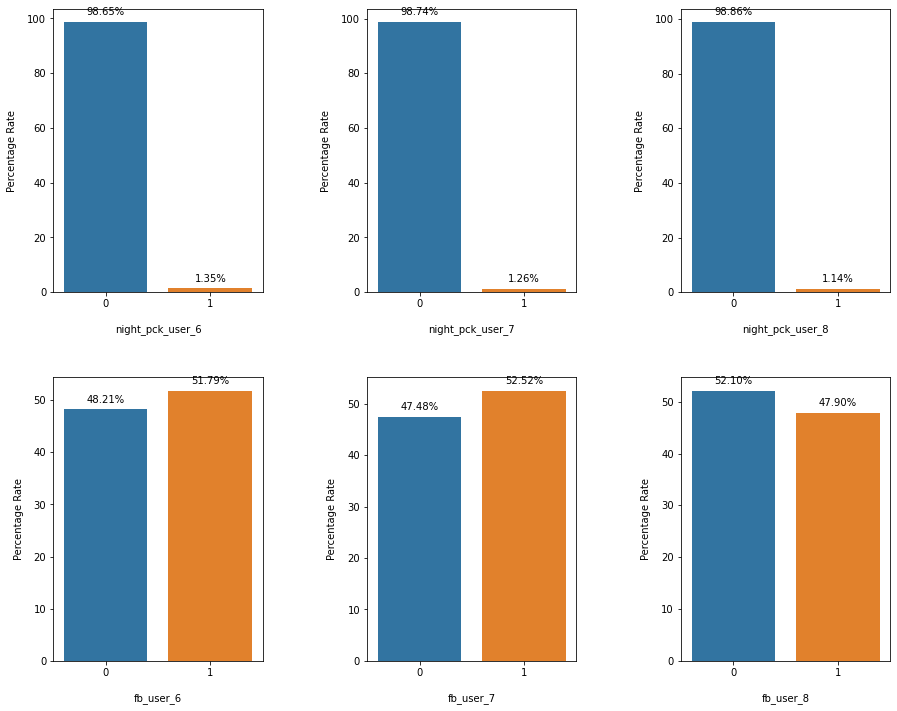

In [68]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((df[col_list].value_counts(dropna = False))/(len(df[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

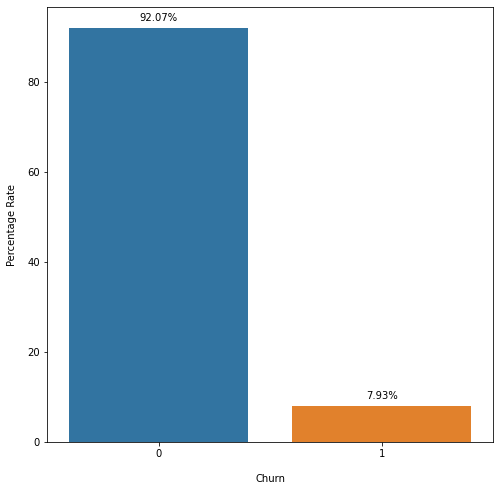

In [69]:
plt.figure(figsize = (8, 8))

series = round(((df["churn"].value_counts(dropna = False))/(len(df["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)


data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

#####  From the above plot it is evident that the dataset is highly imbalanced. The proportion for churn to non-churn is around 8%.

In [70]:
def plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [71]:
def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g', kde_kws={'bw':0.1})
    # Call Custom Function
    plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

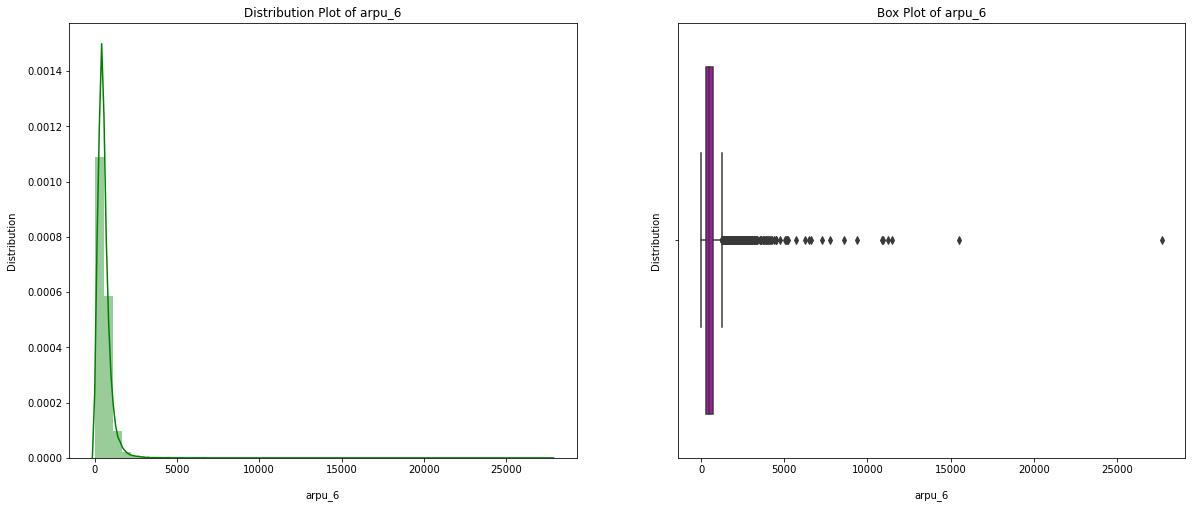

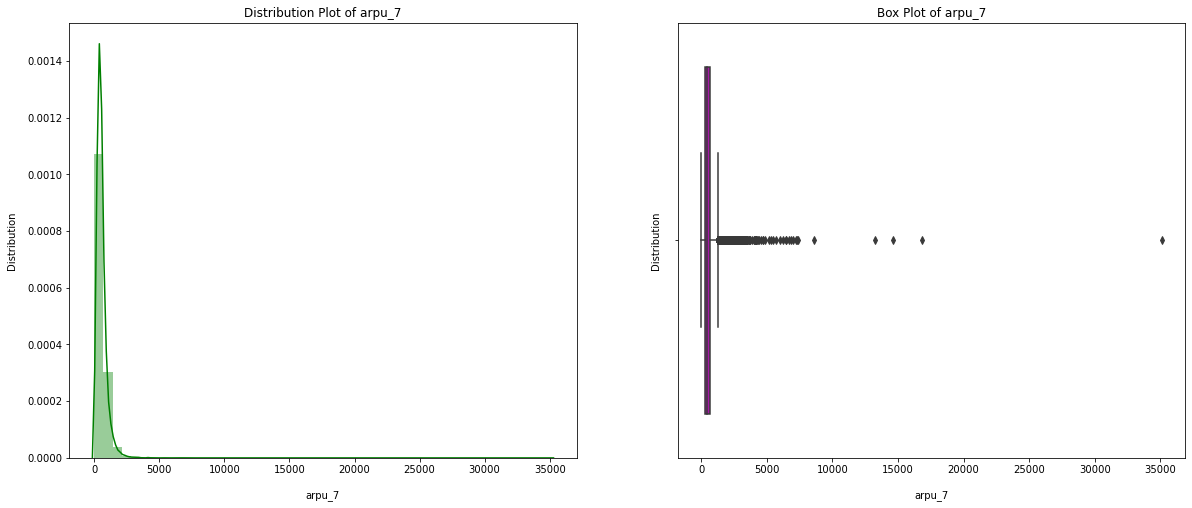

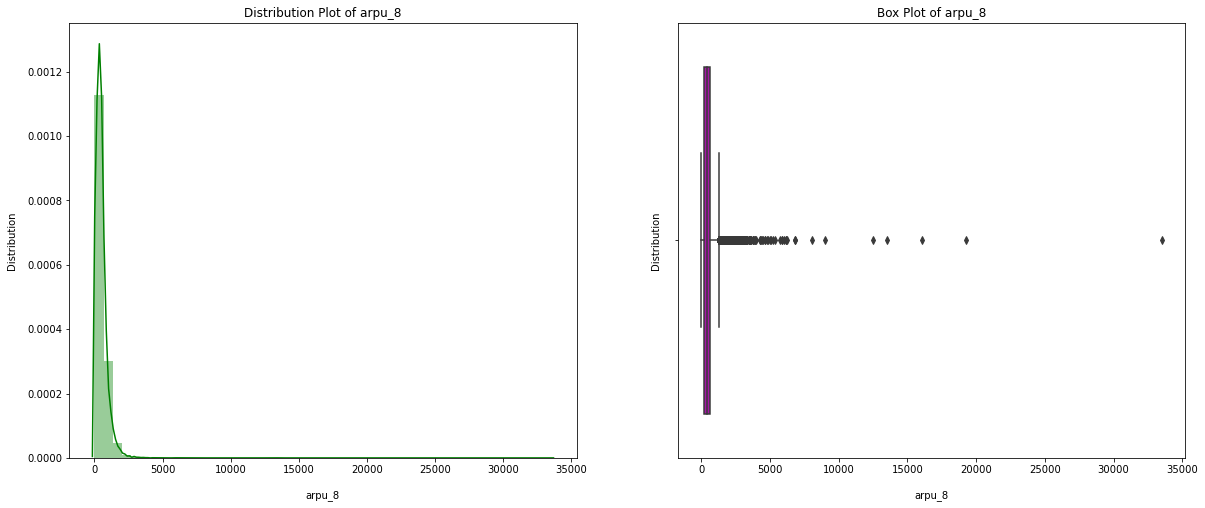

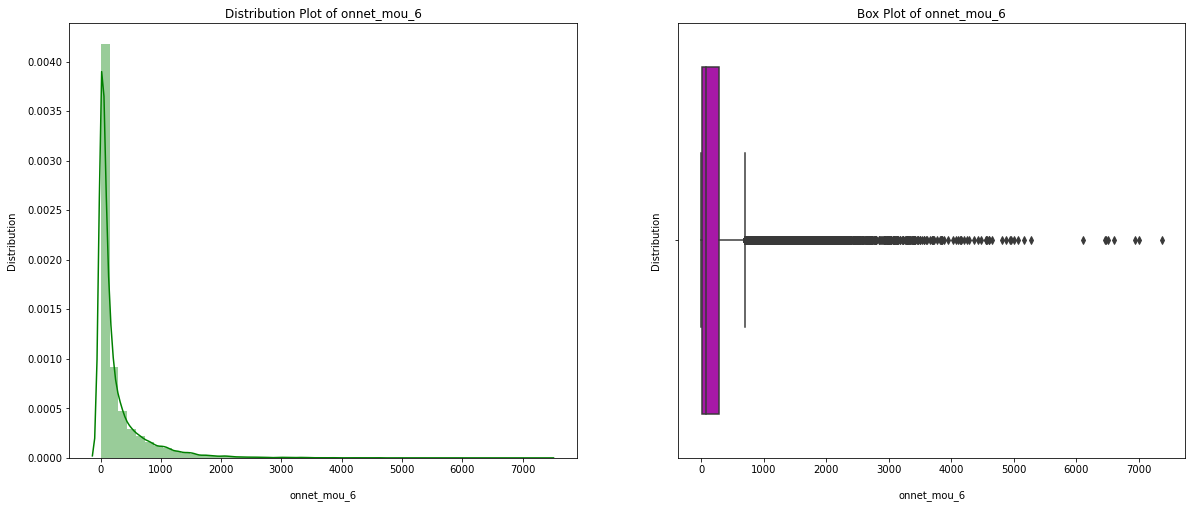

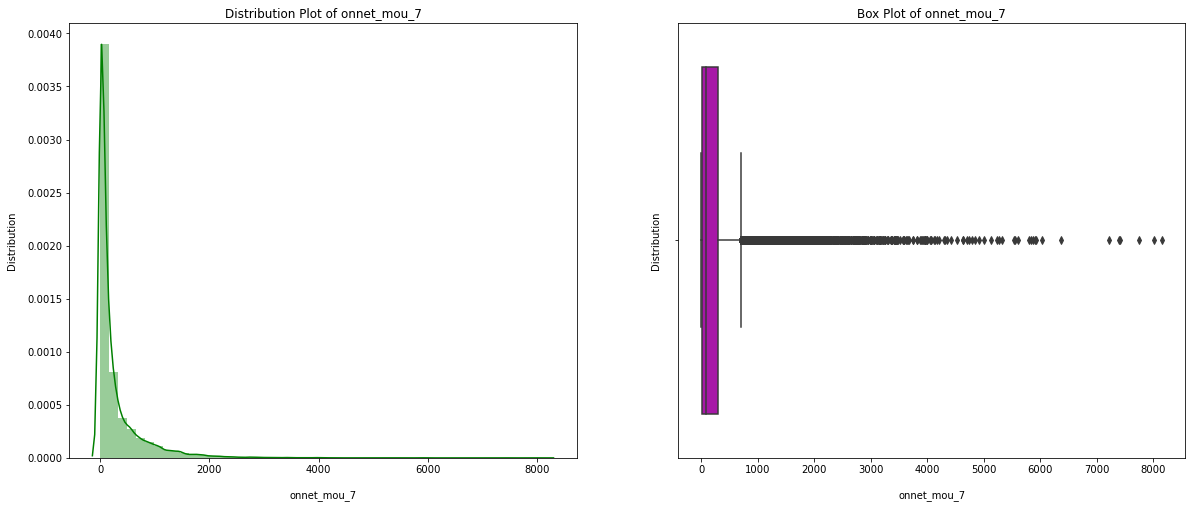

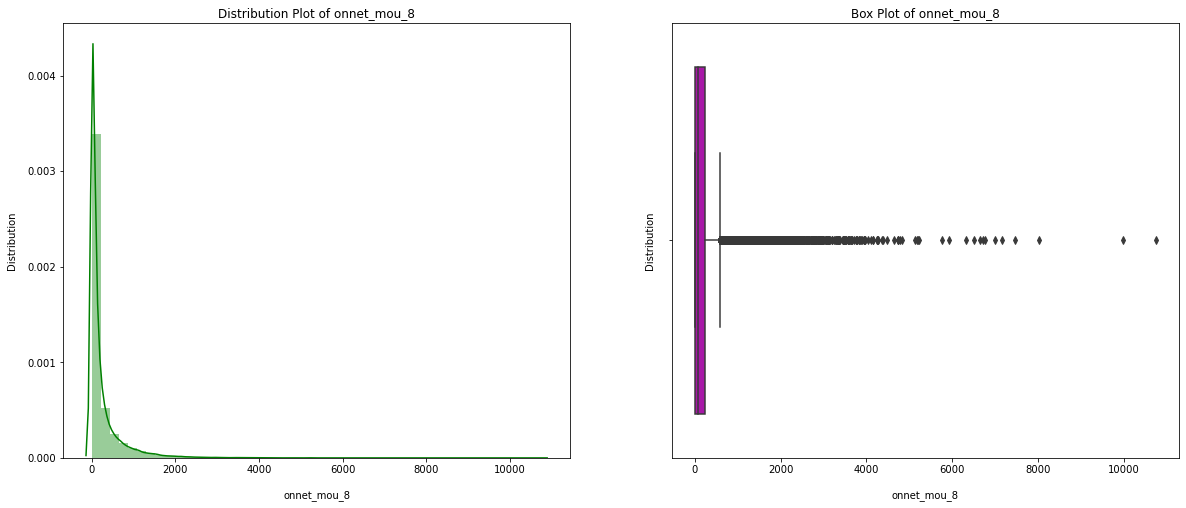

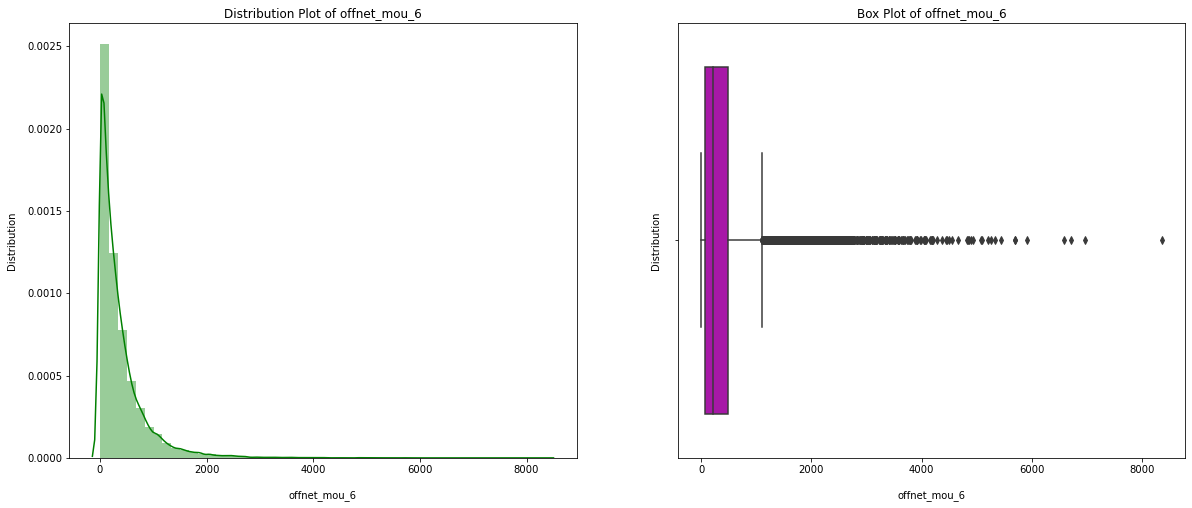

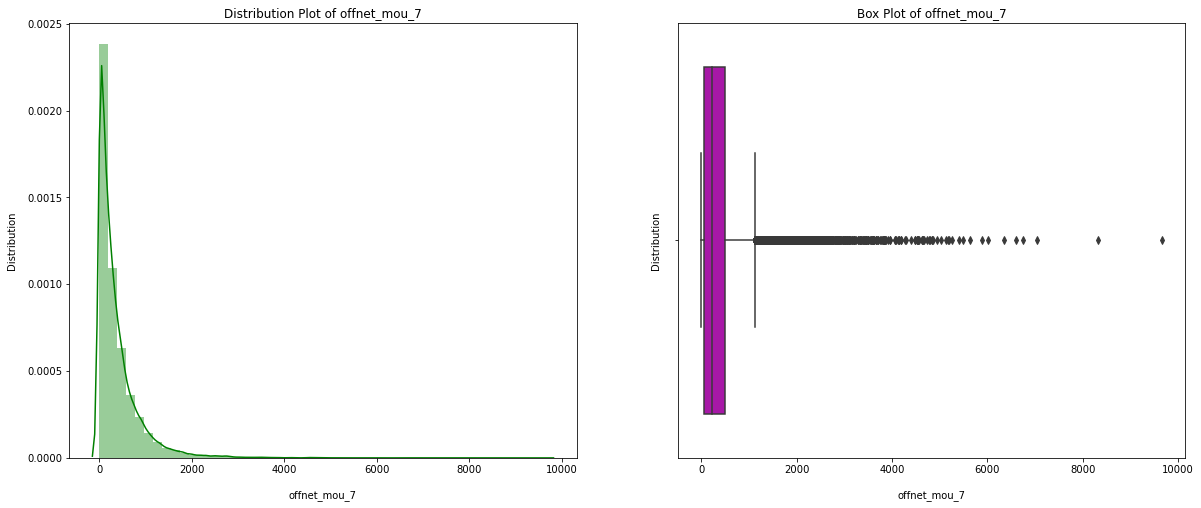

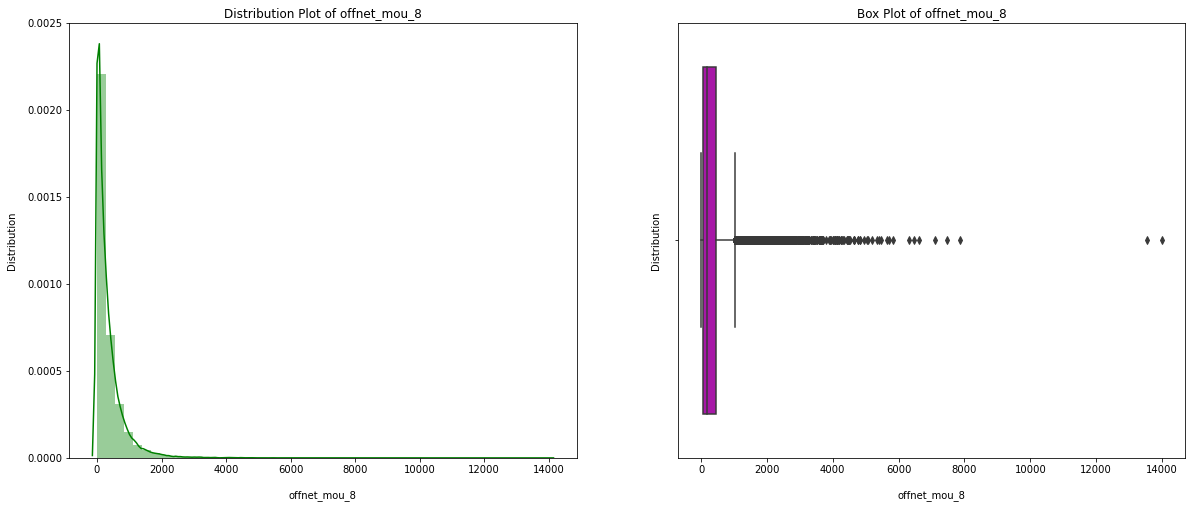

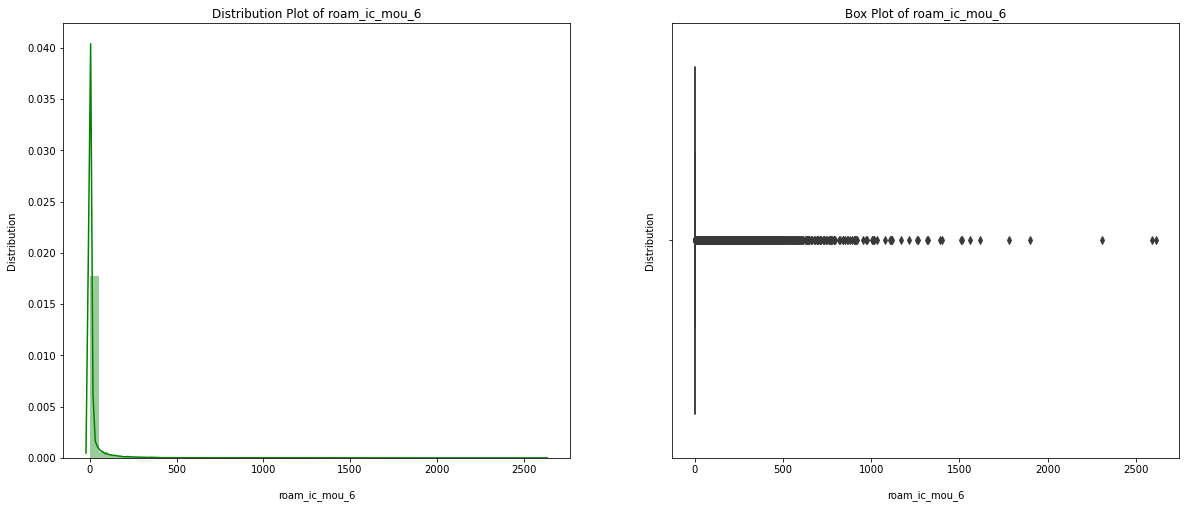

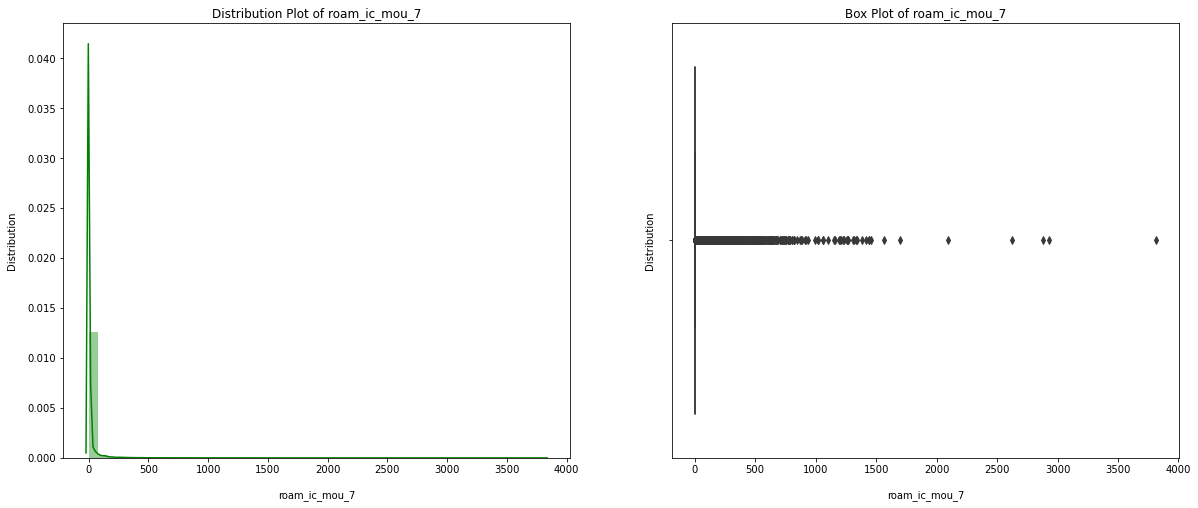

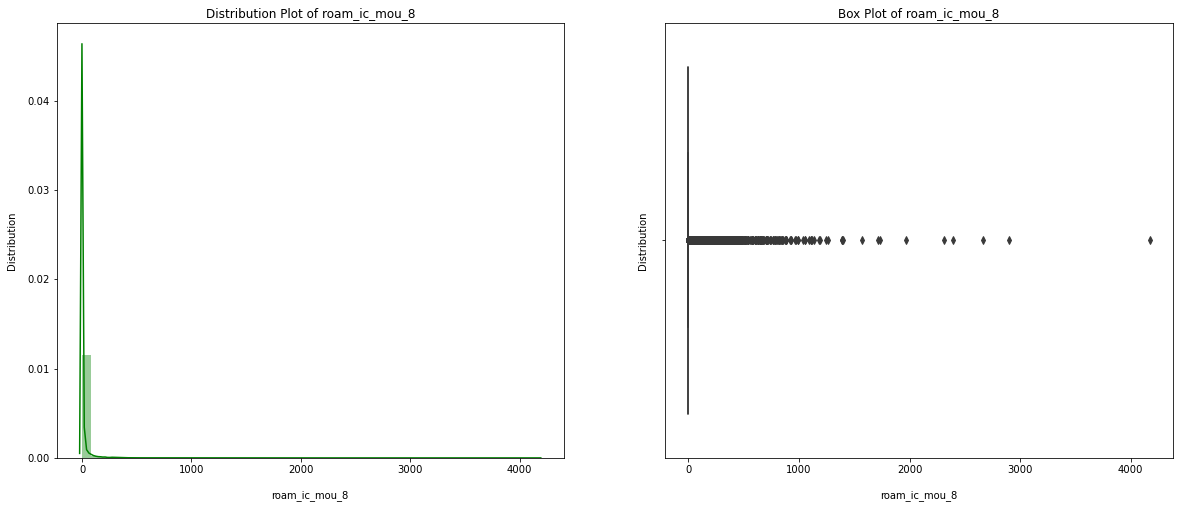

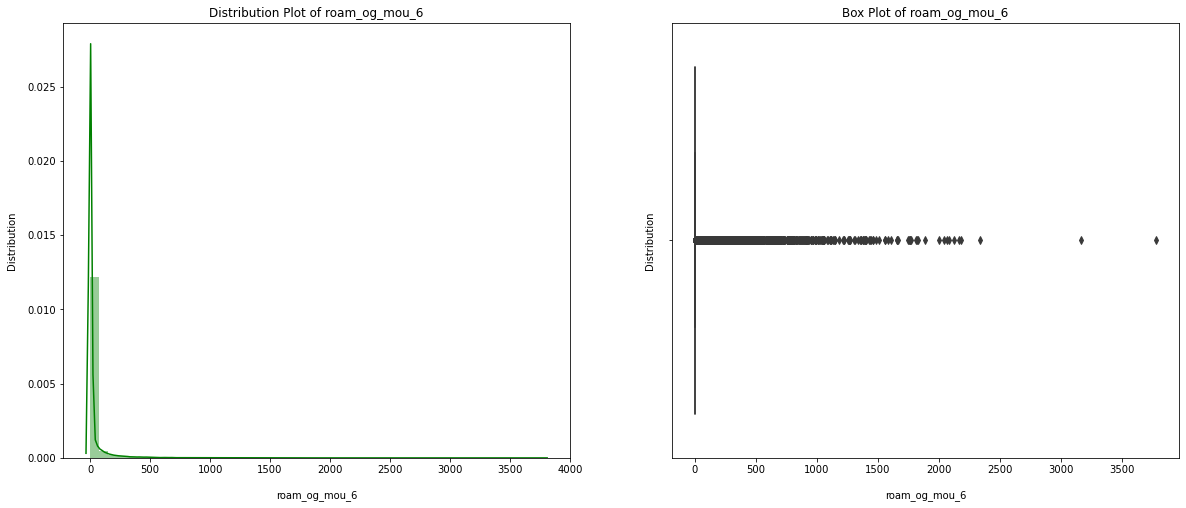

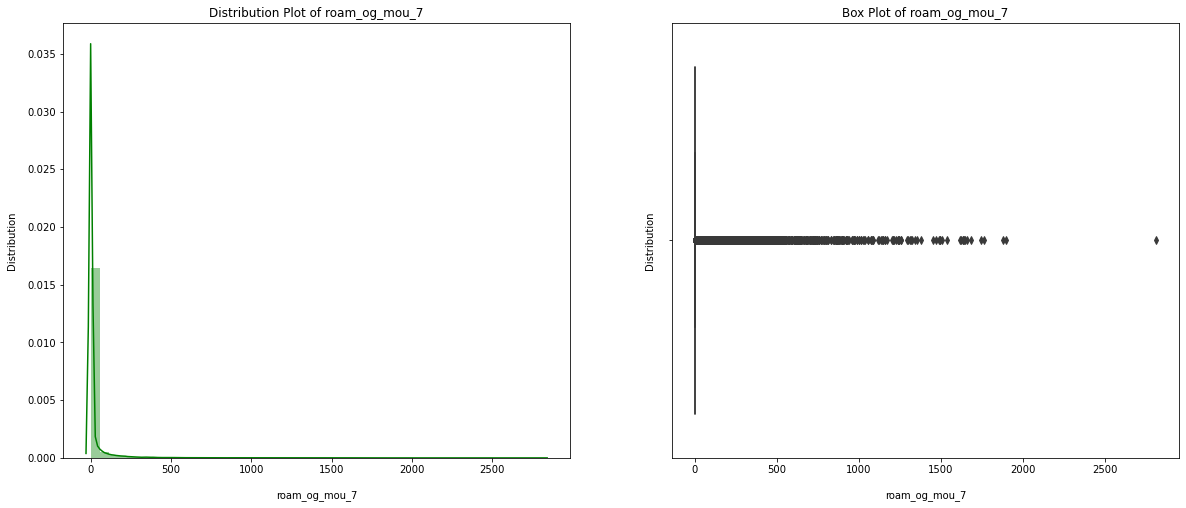

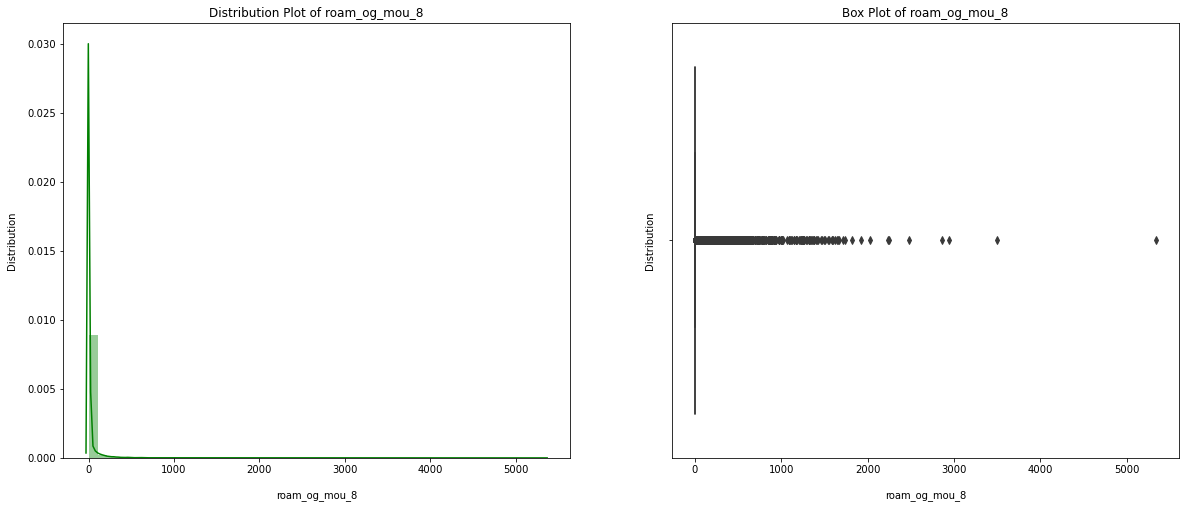

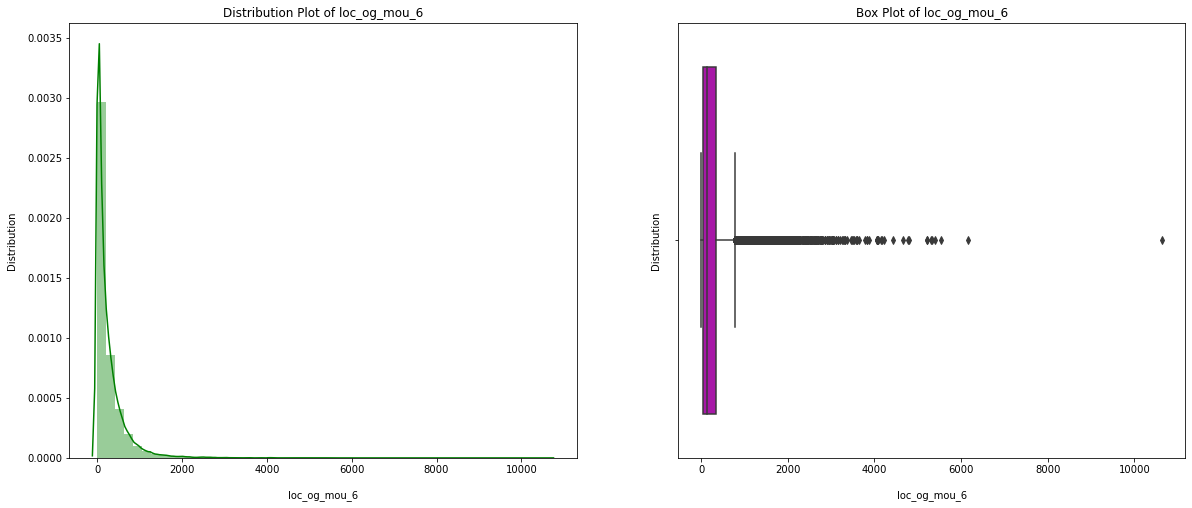

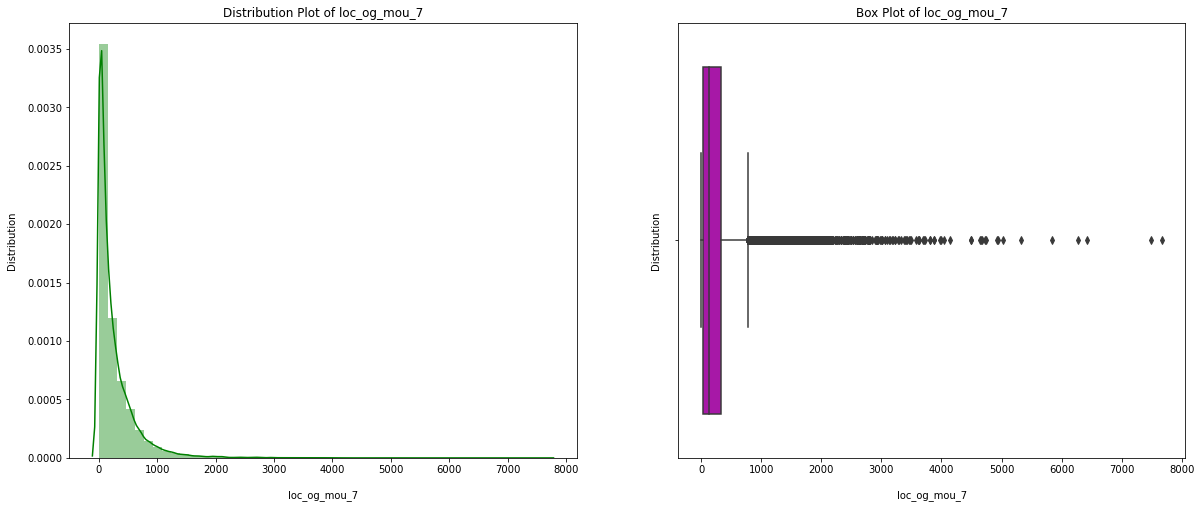

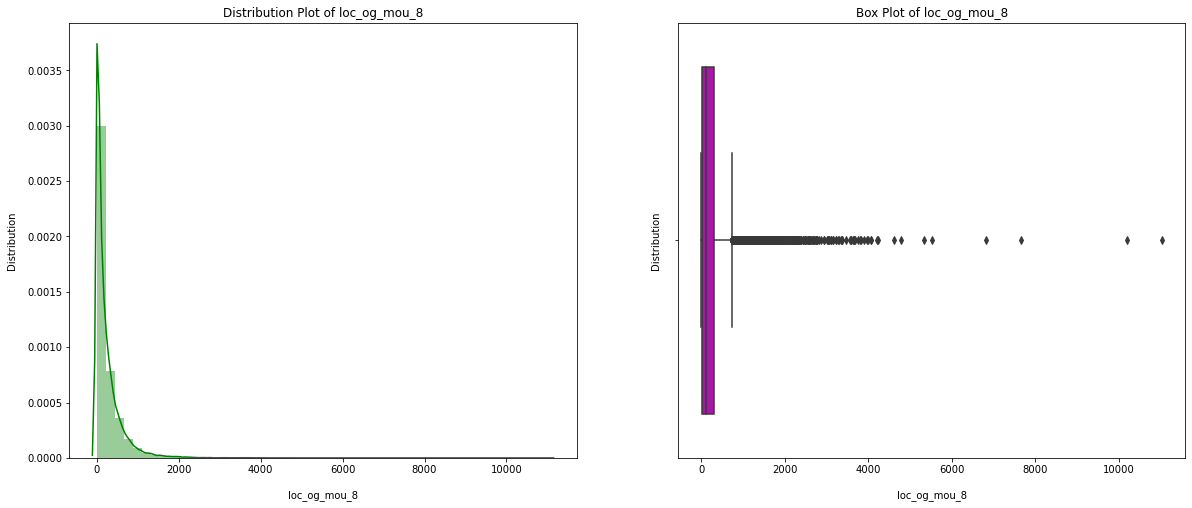

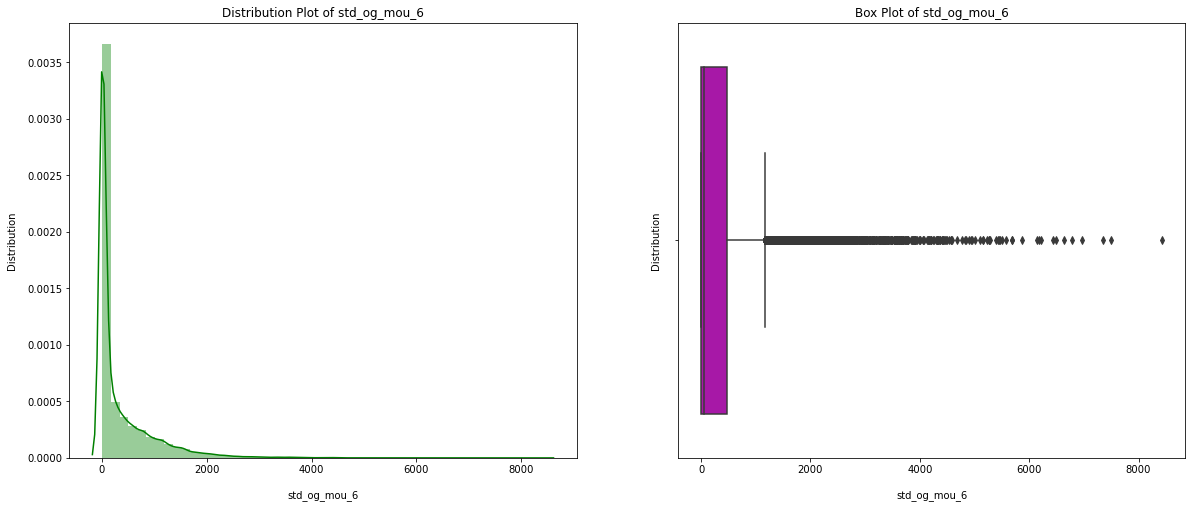

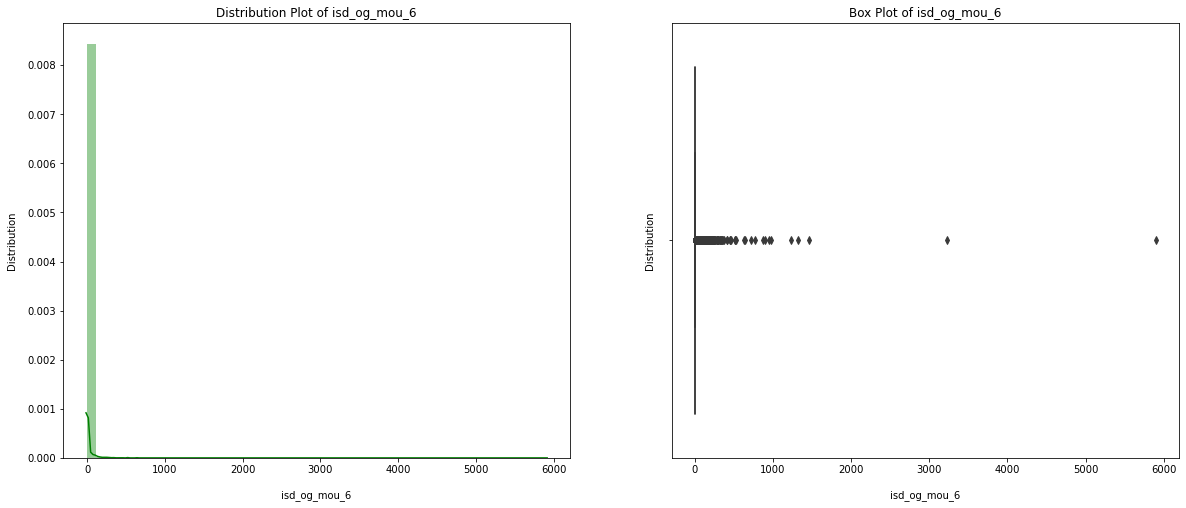

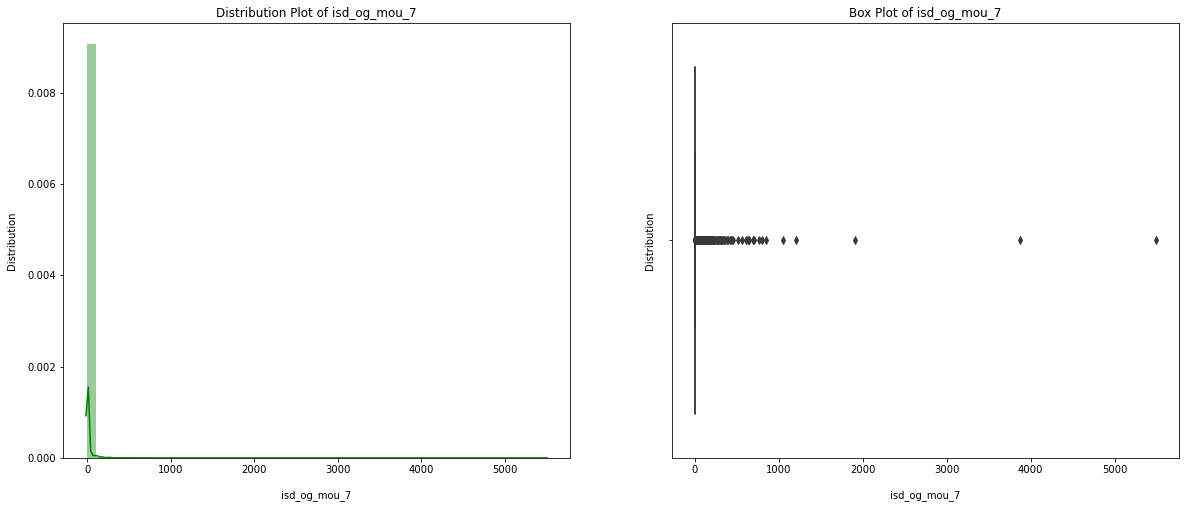

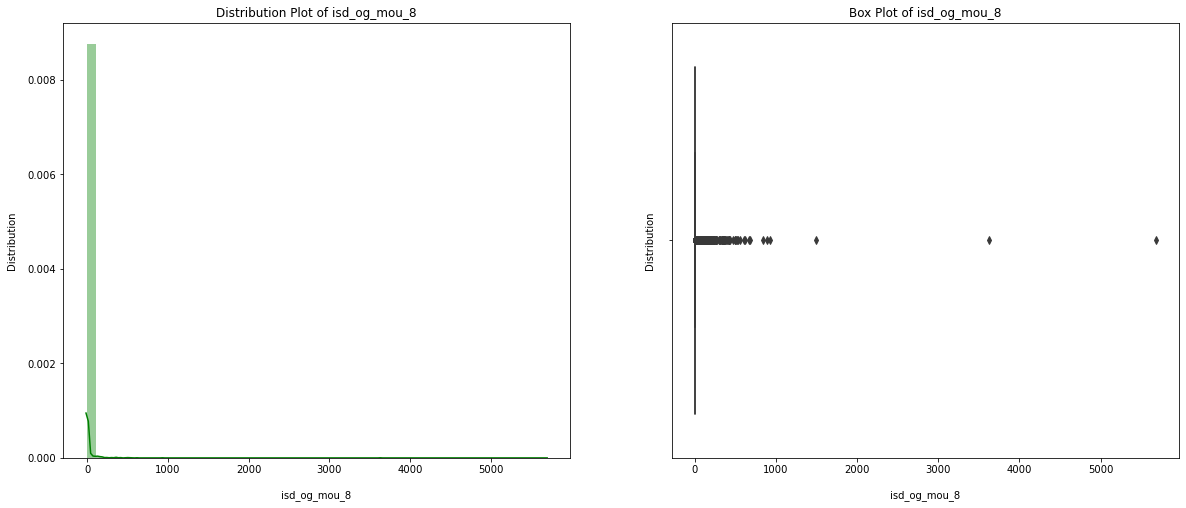

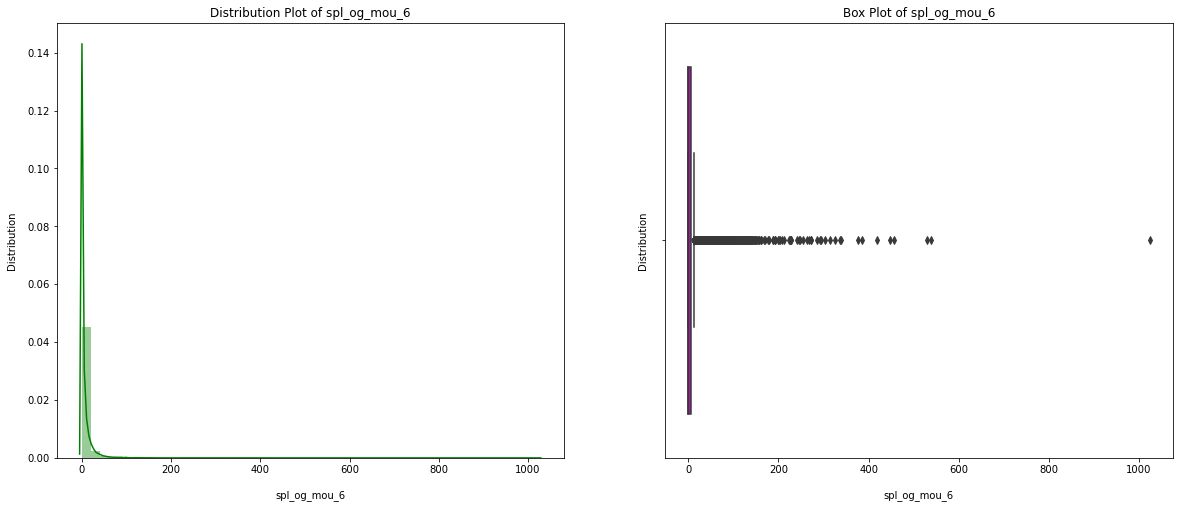

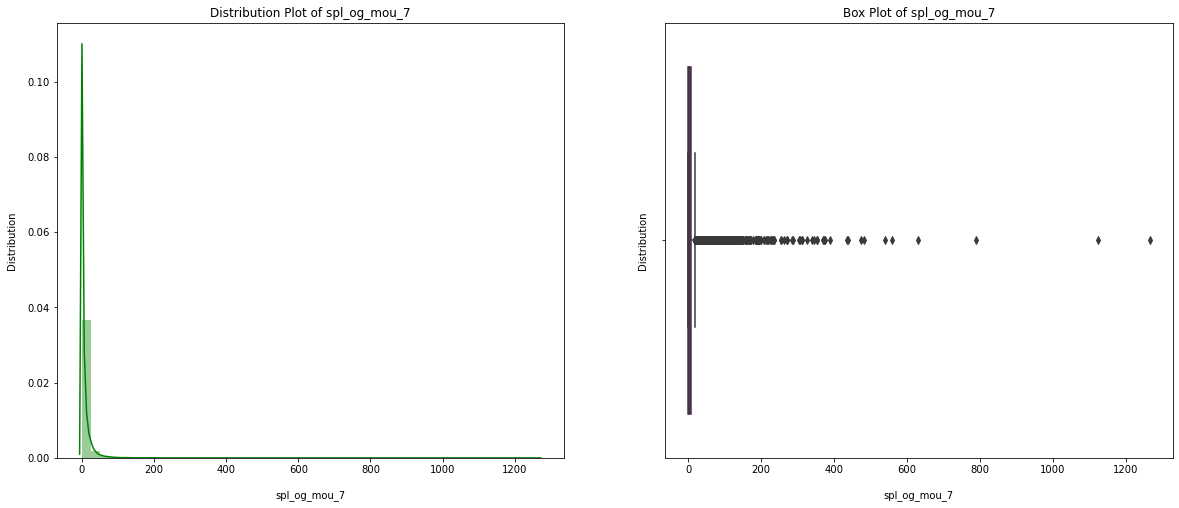

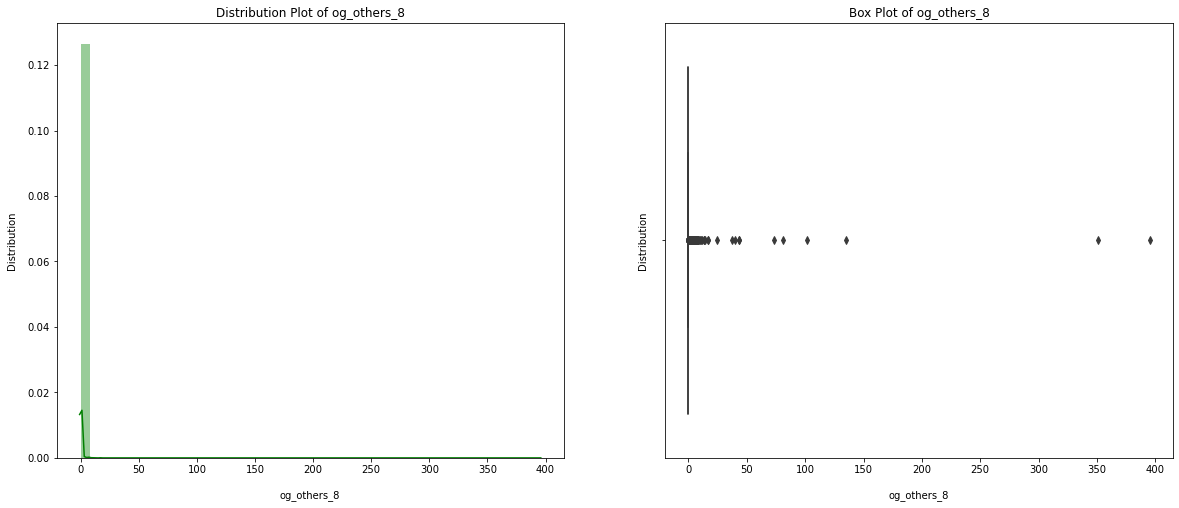

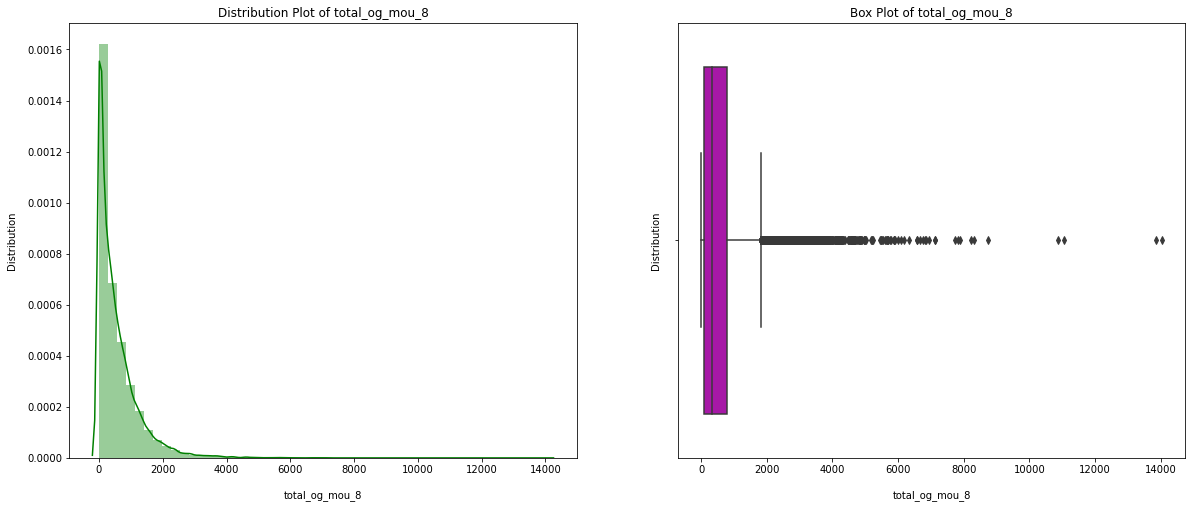

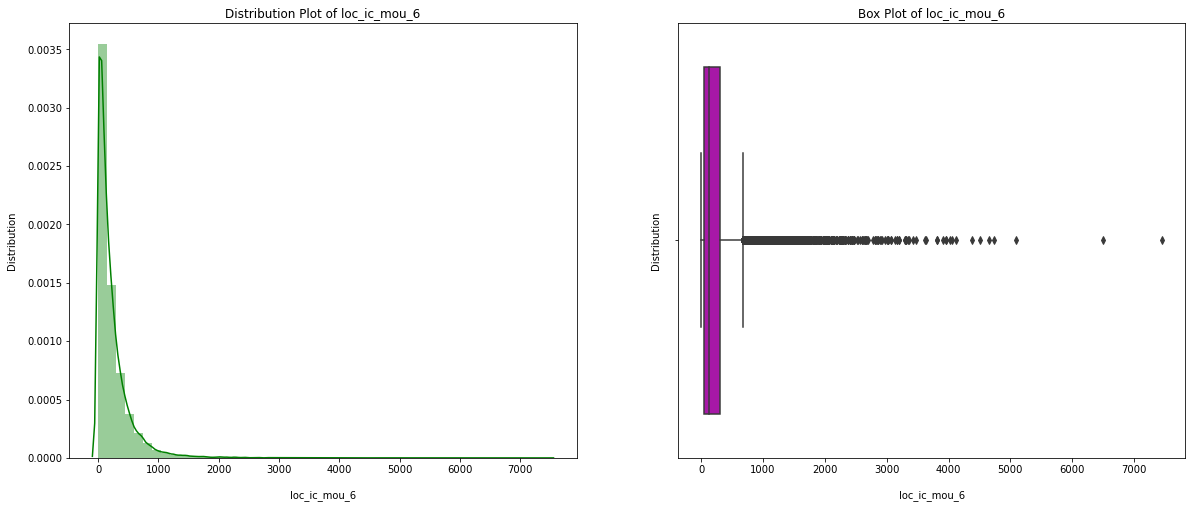

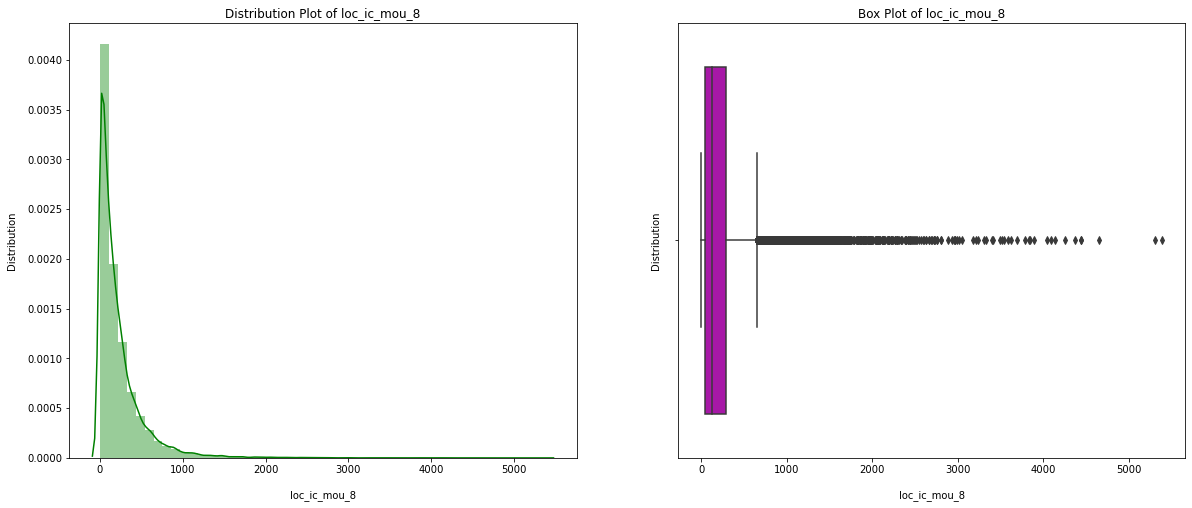

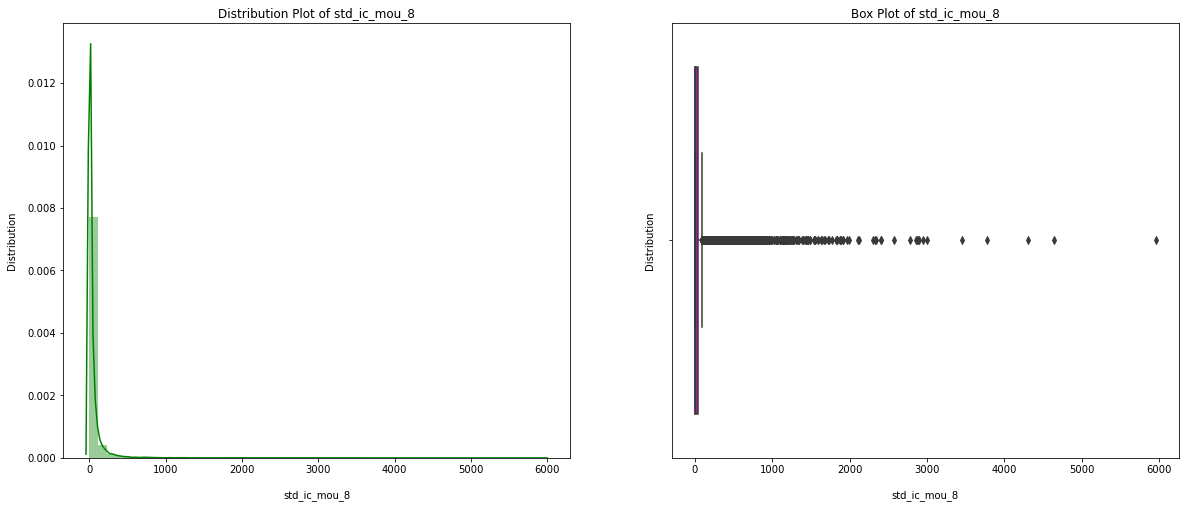

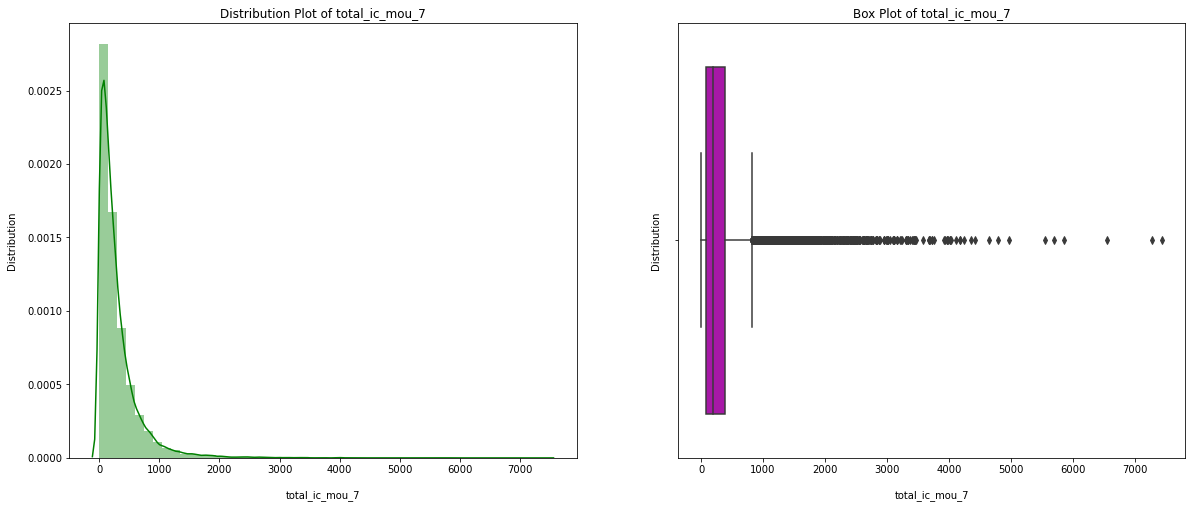

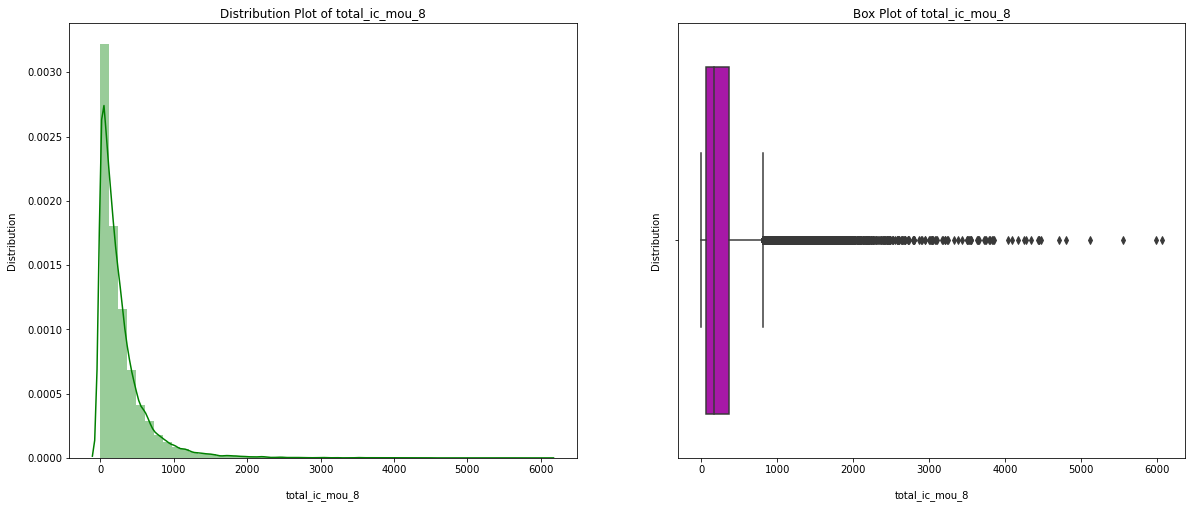

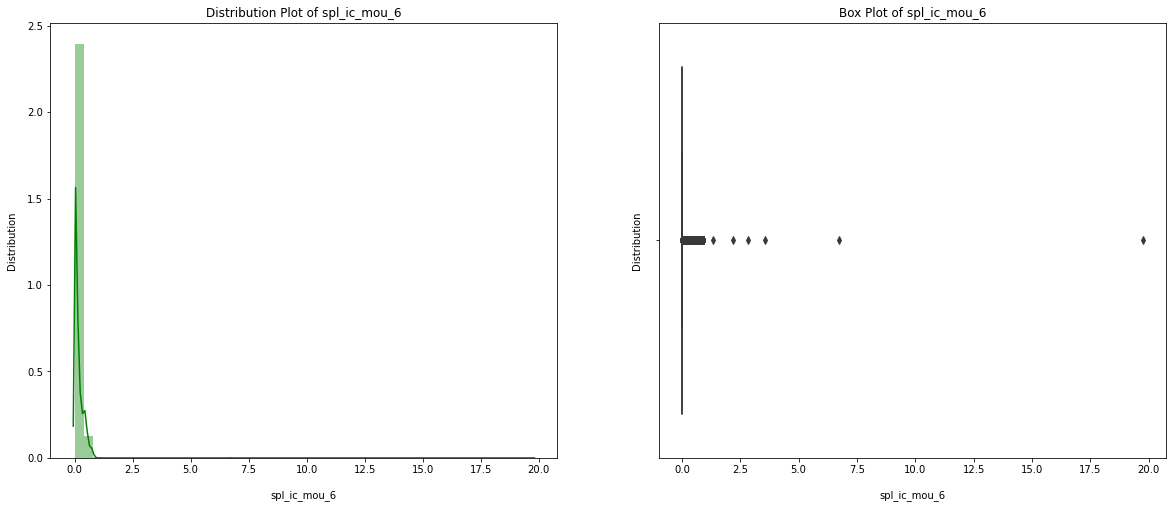

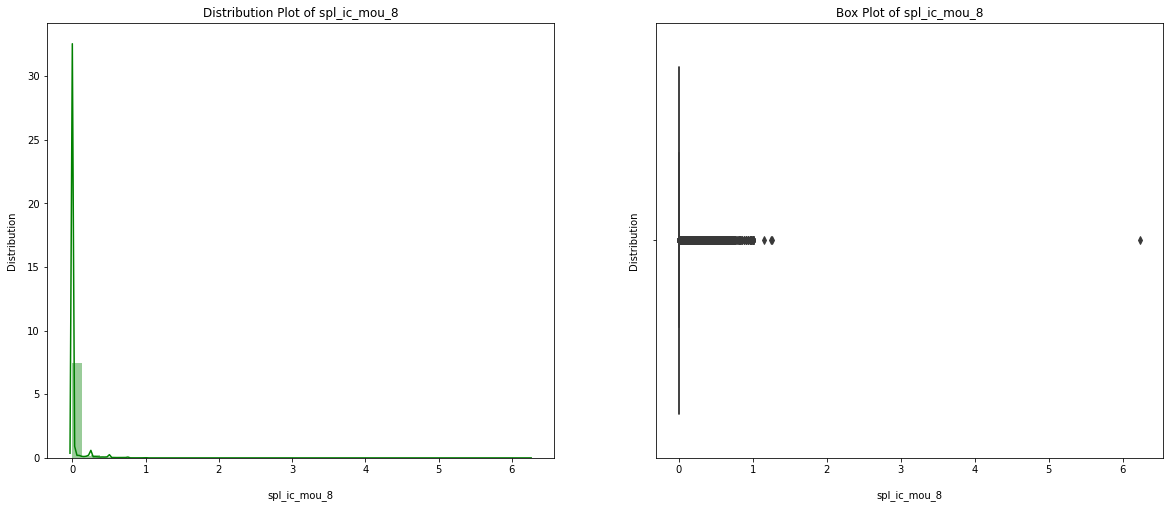

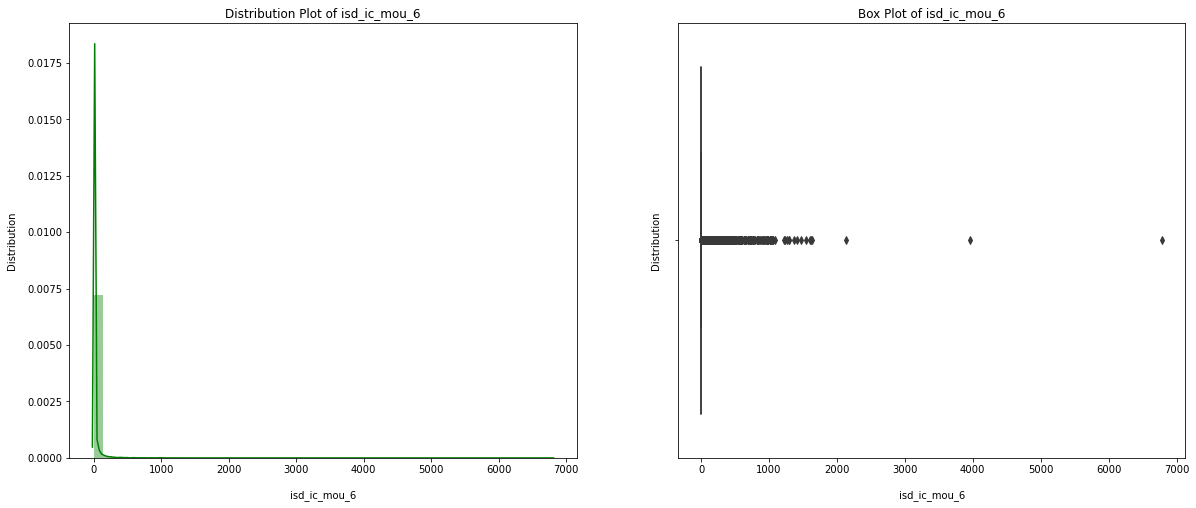

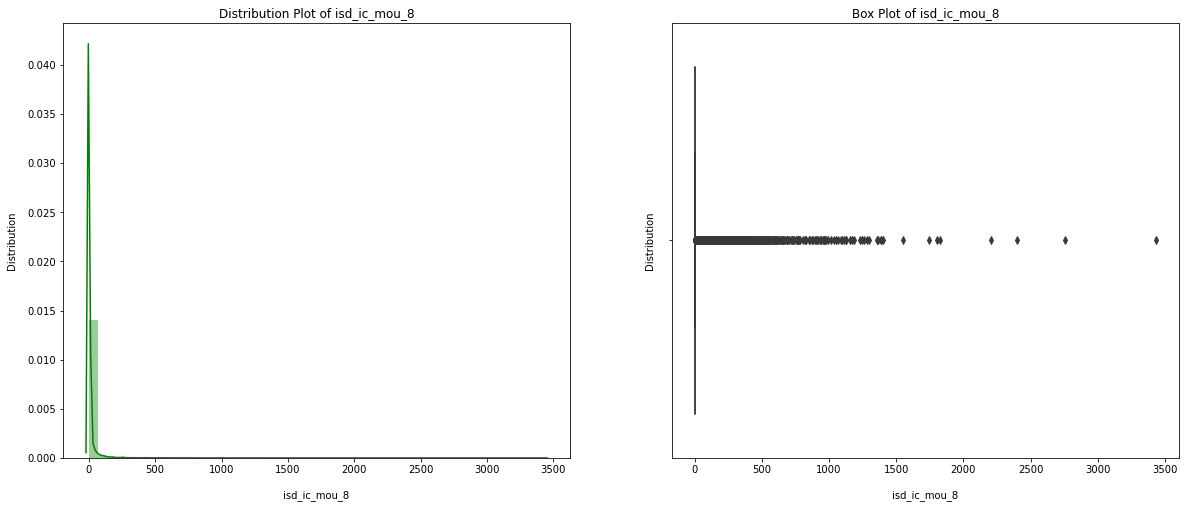

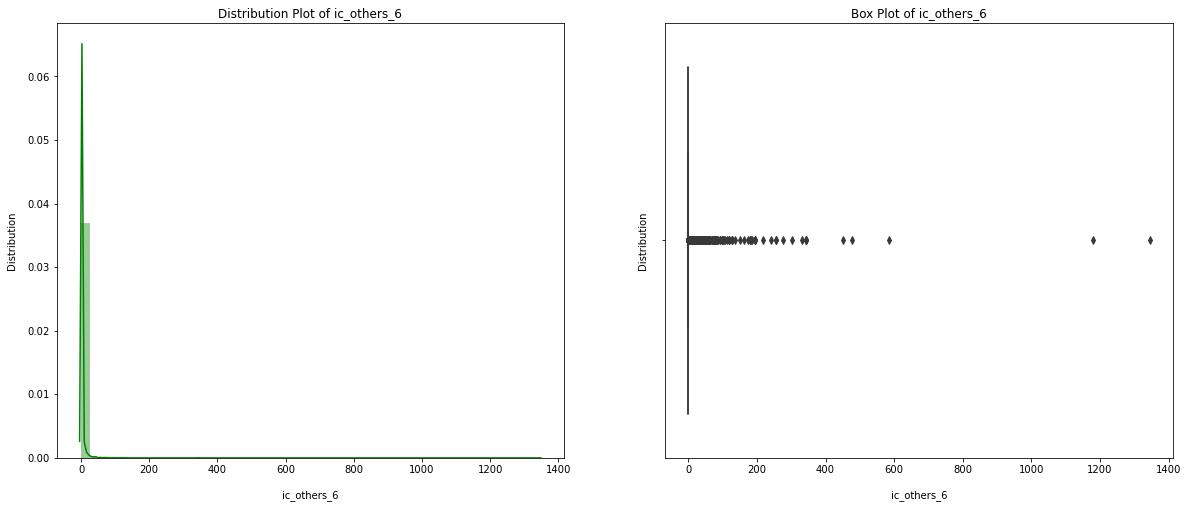

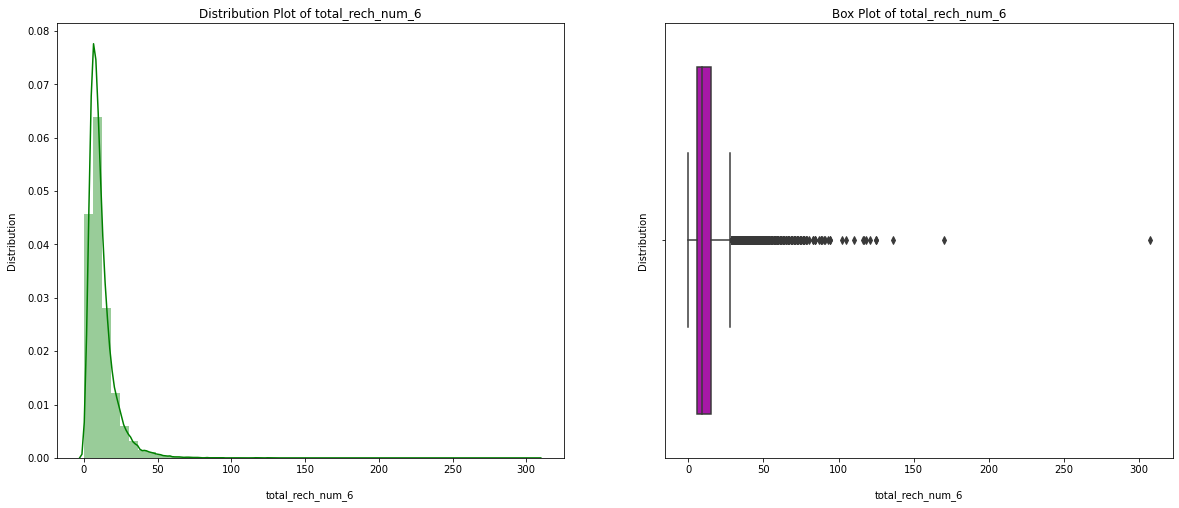

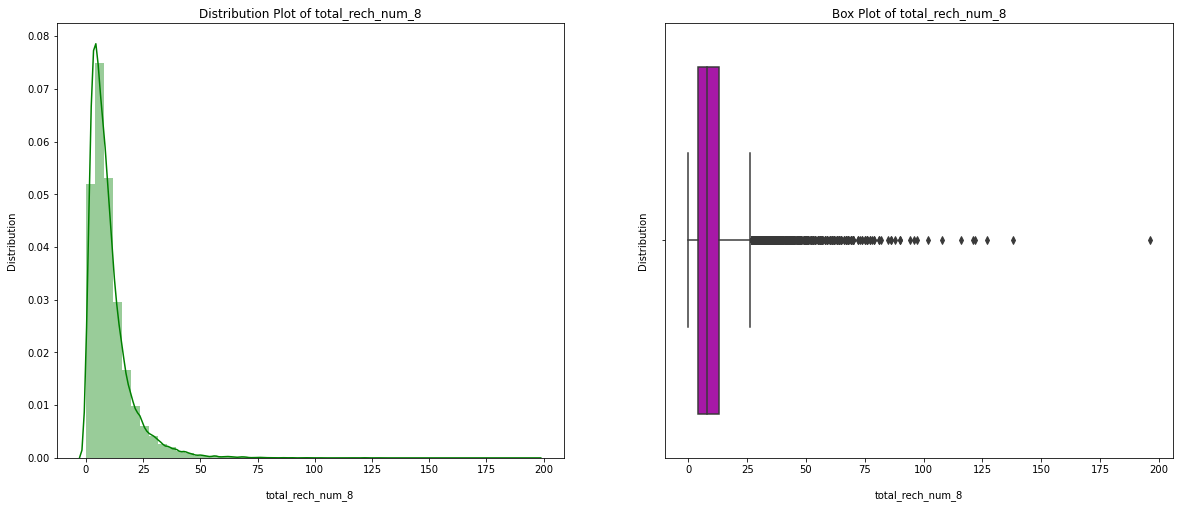

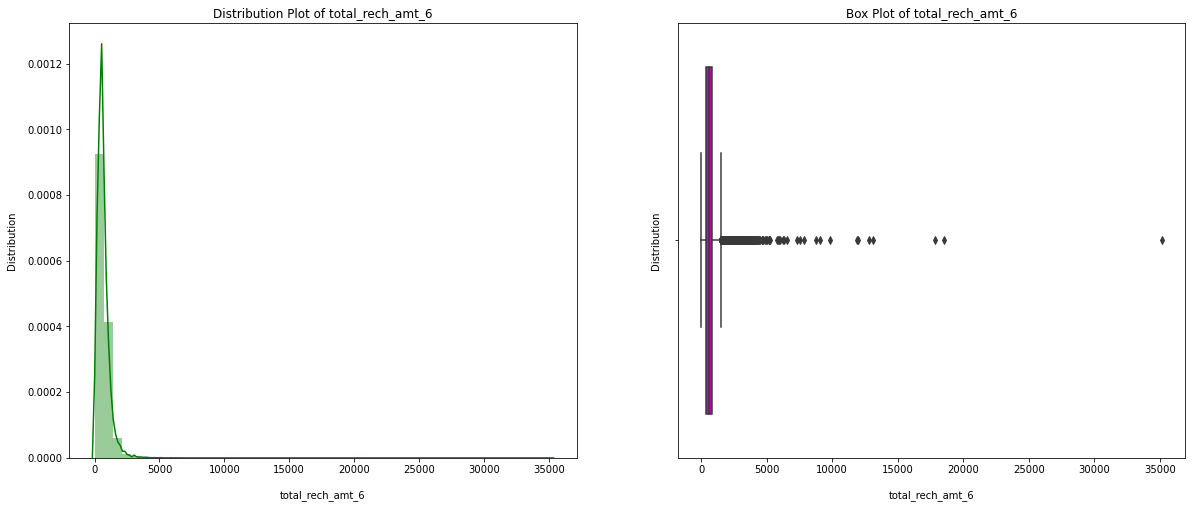

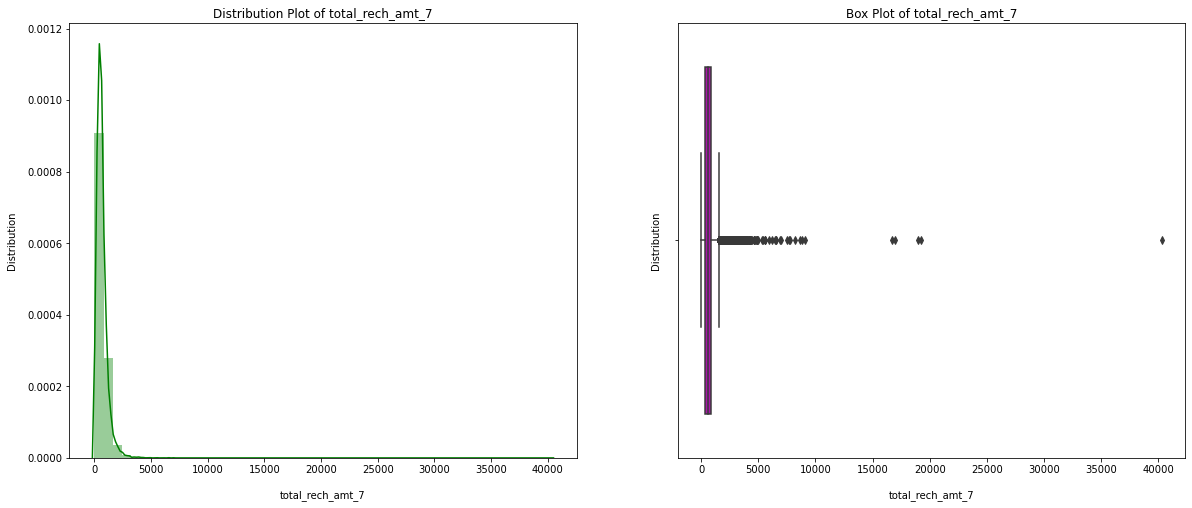

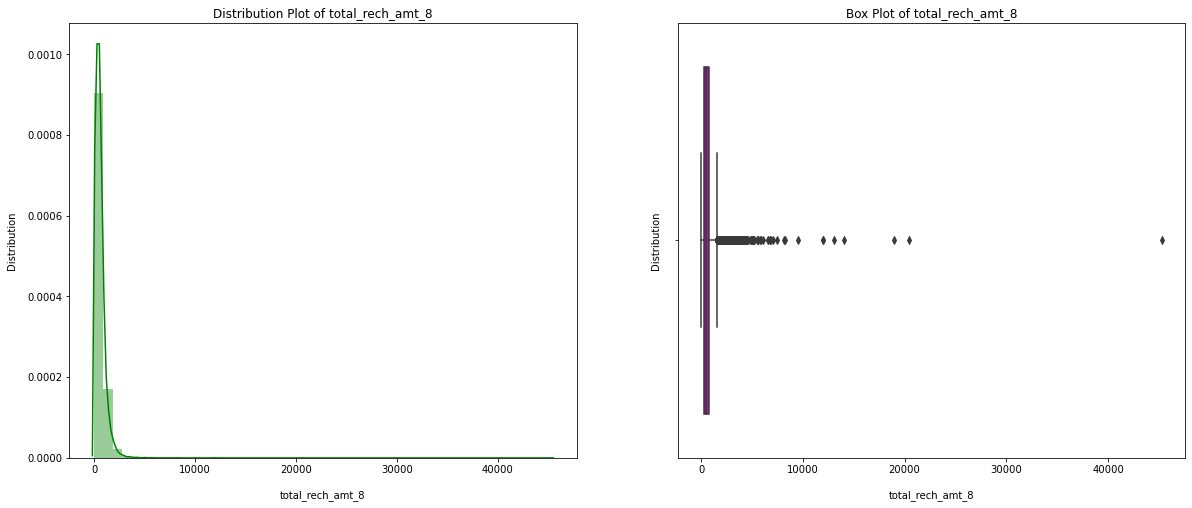

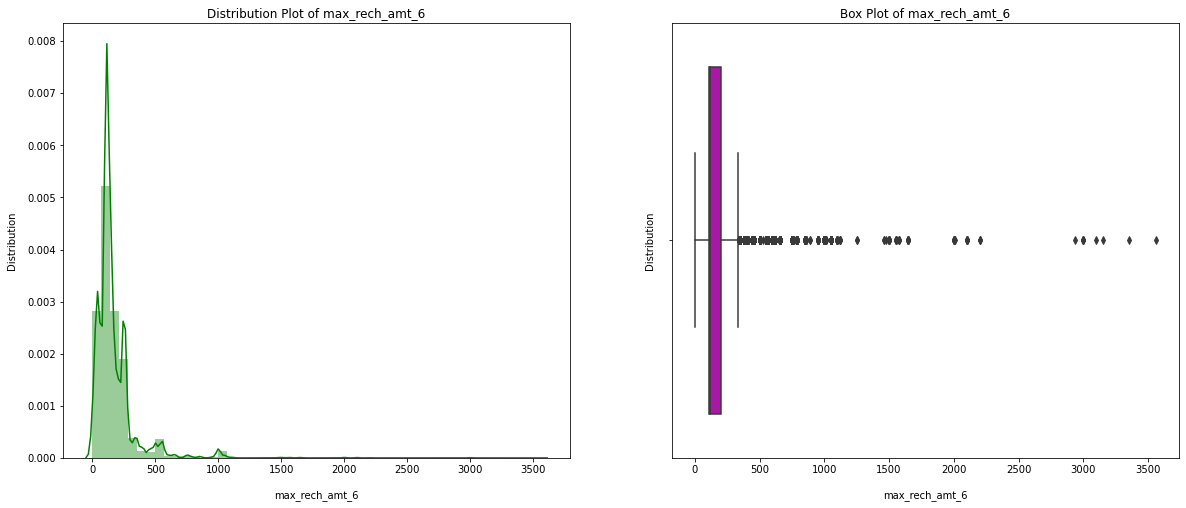

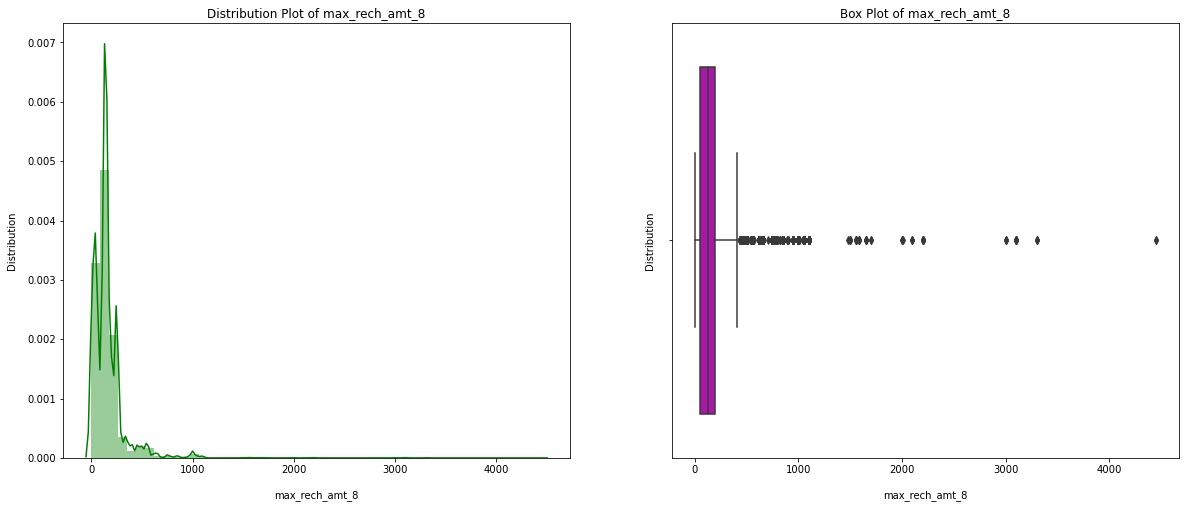

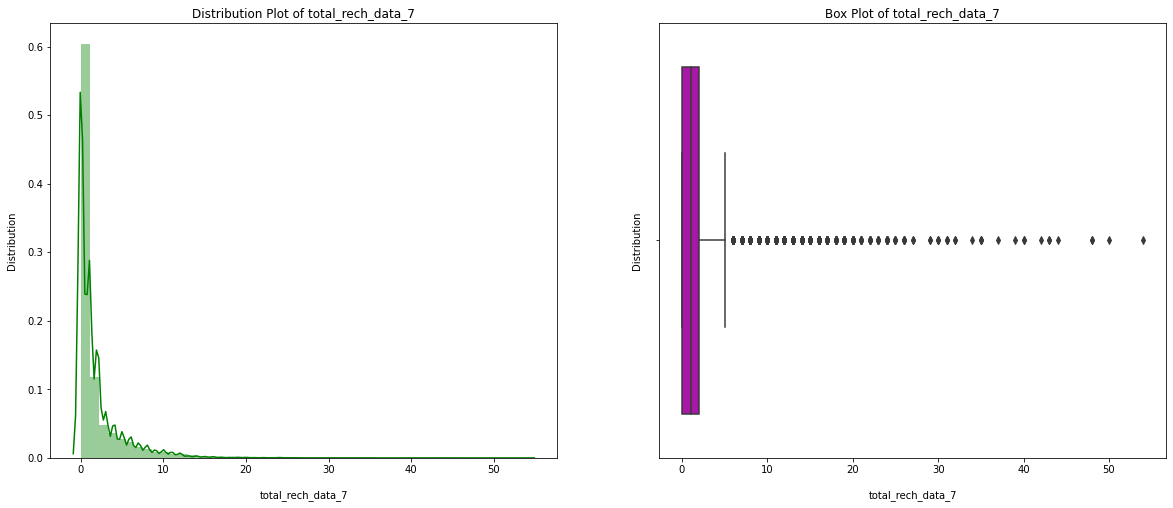

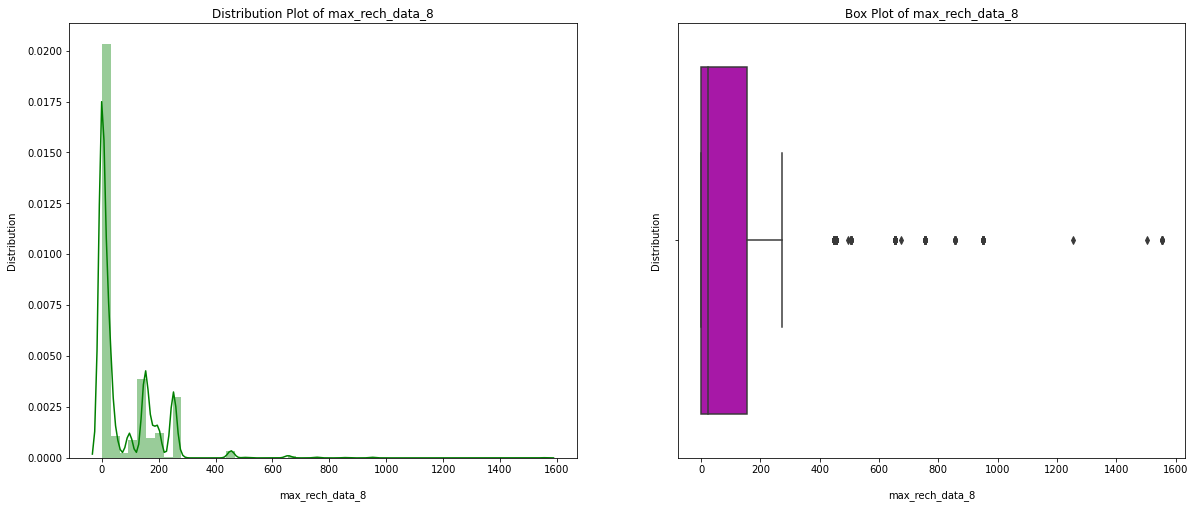

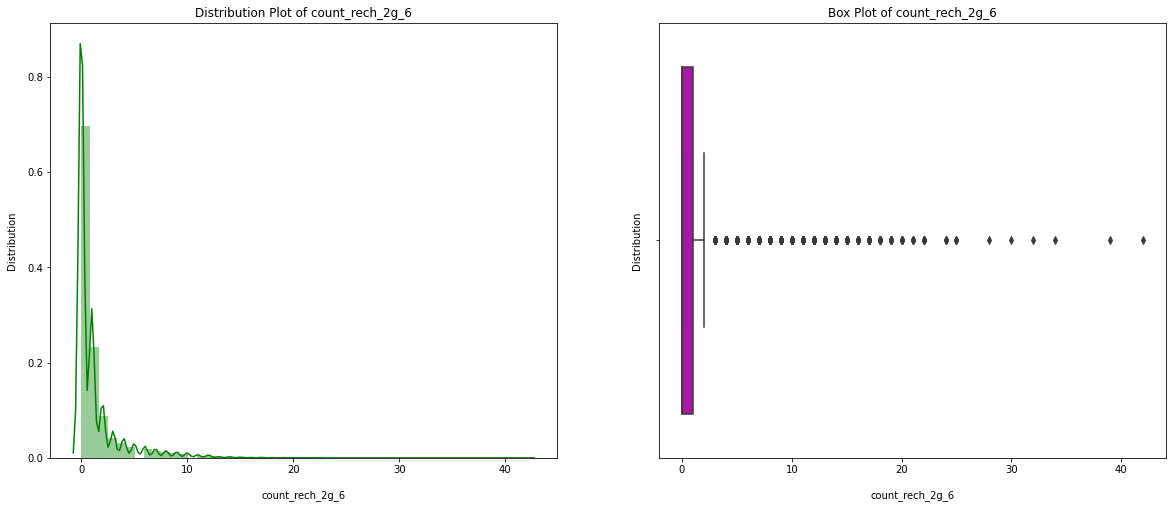

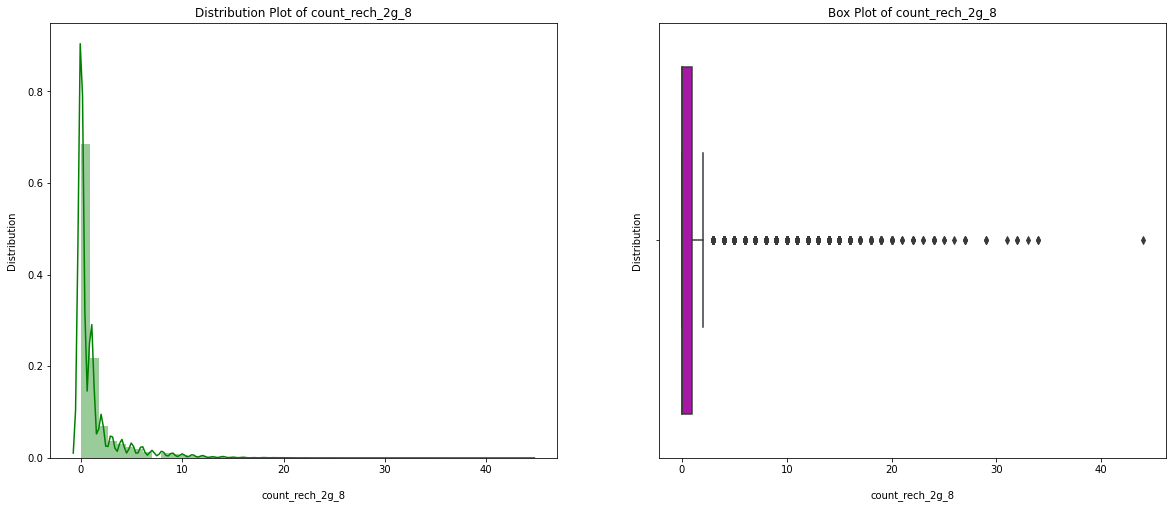

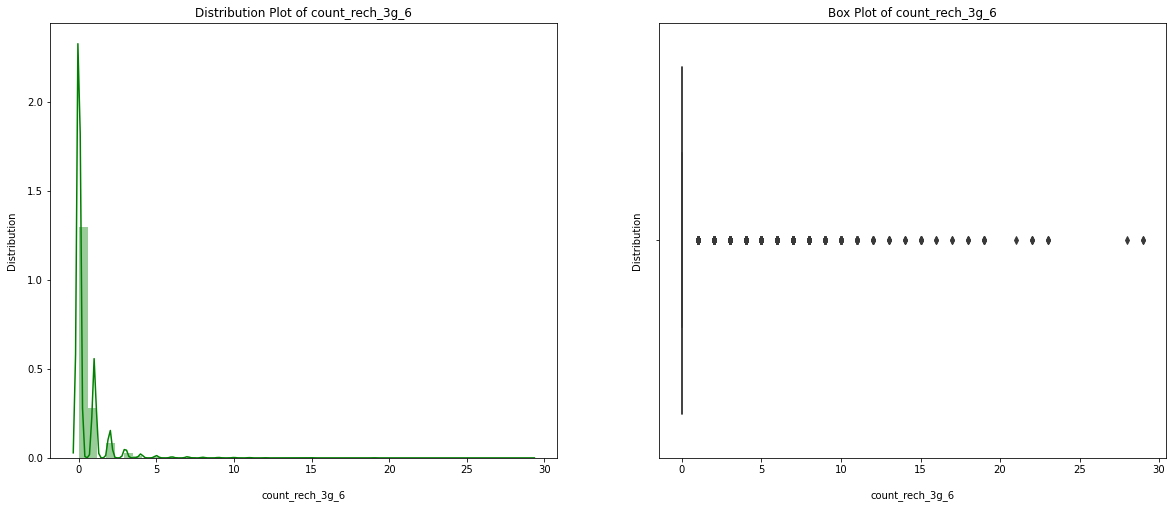

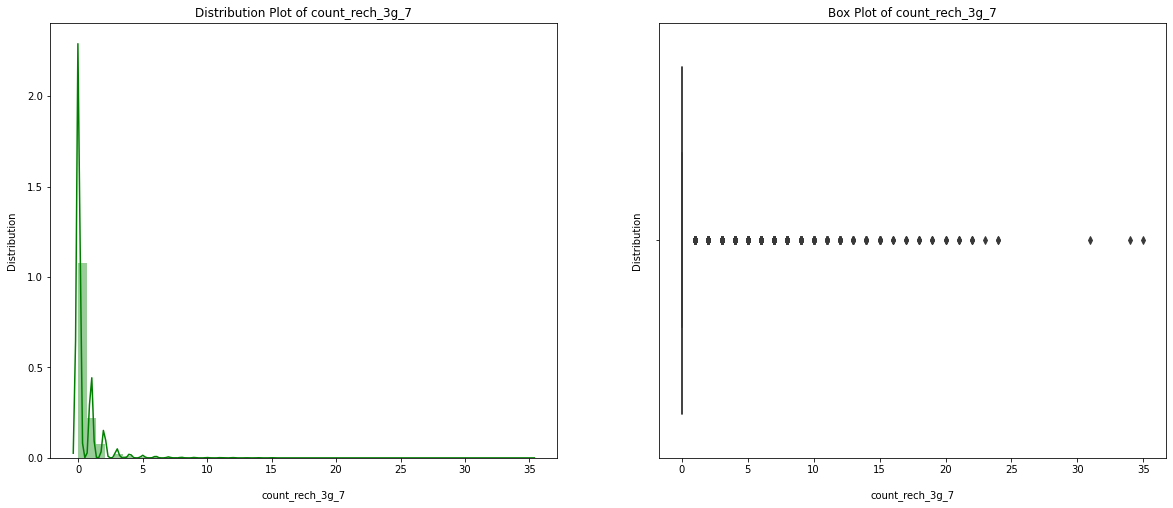

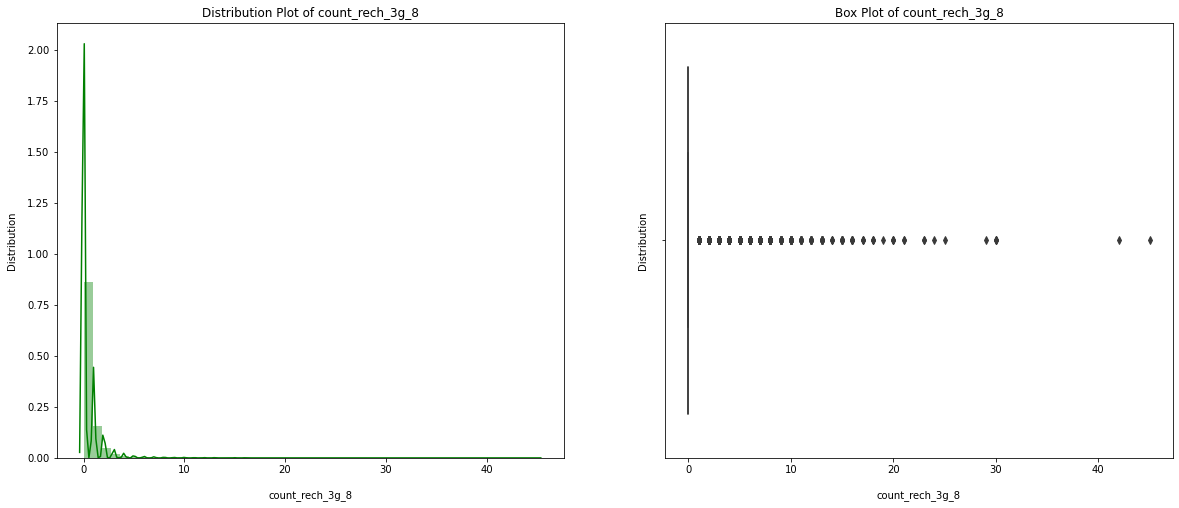

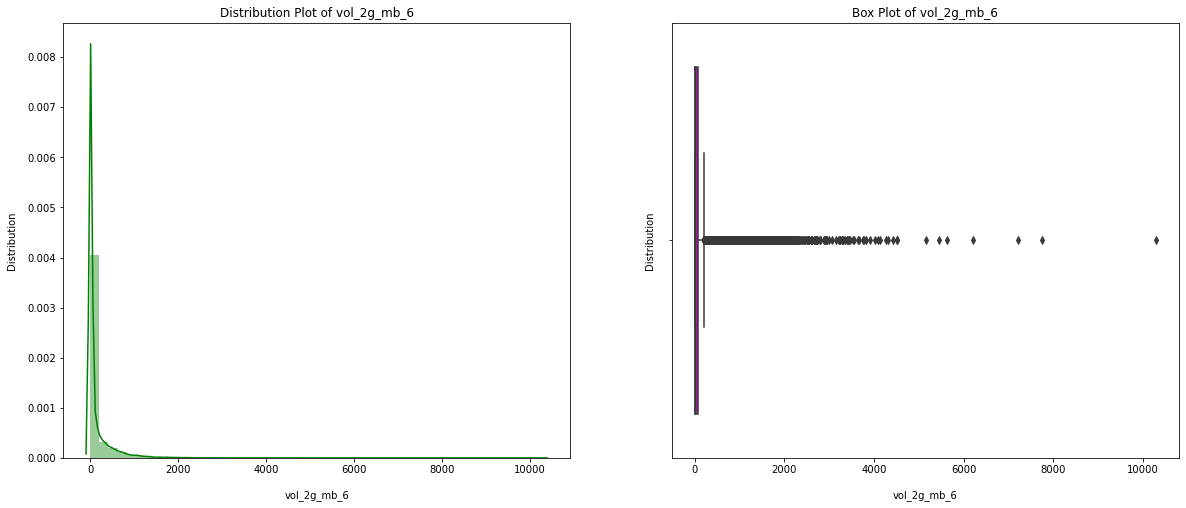

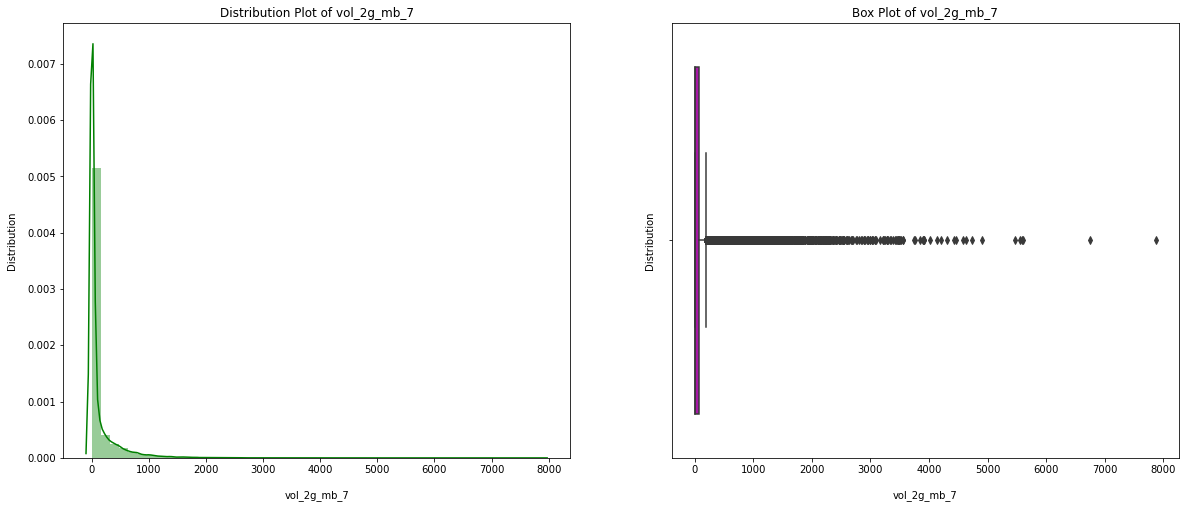

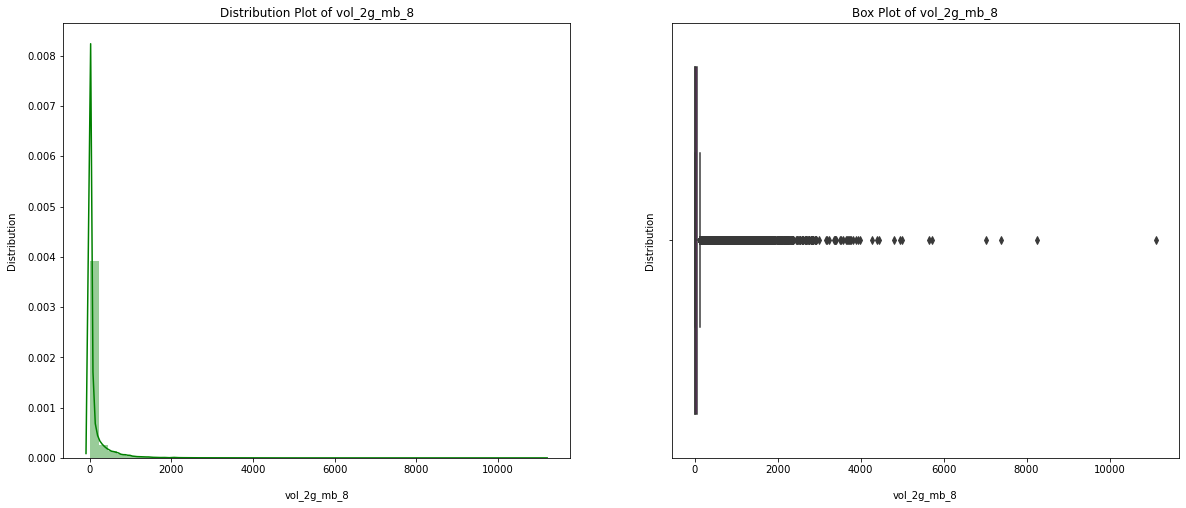

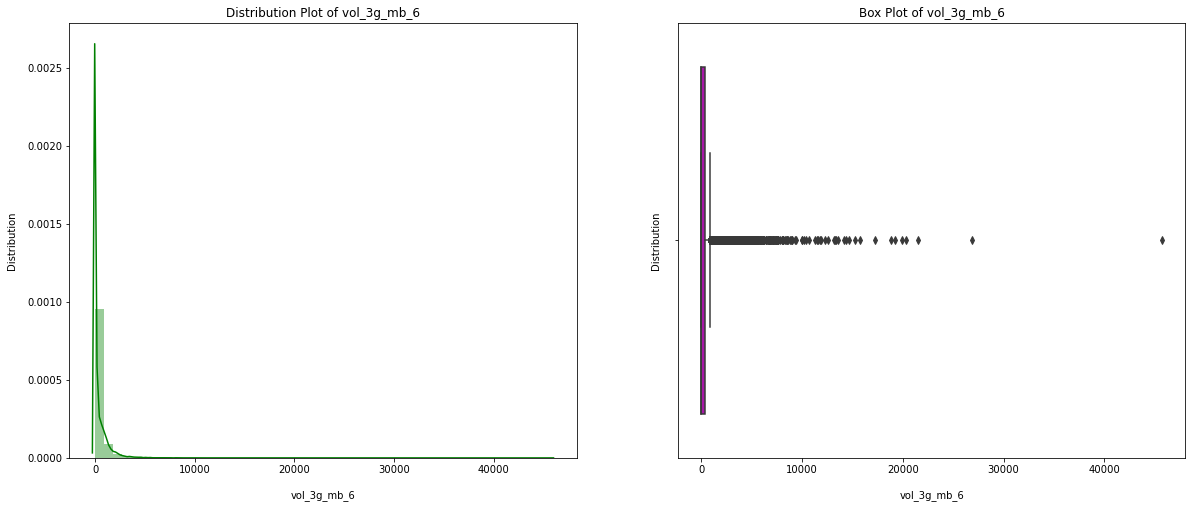

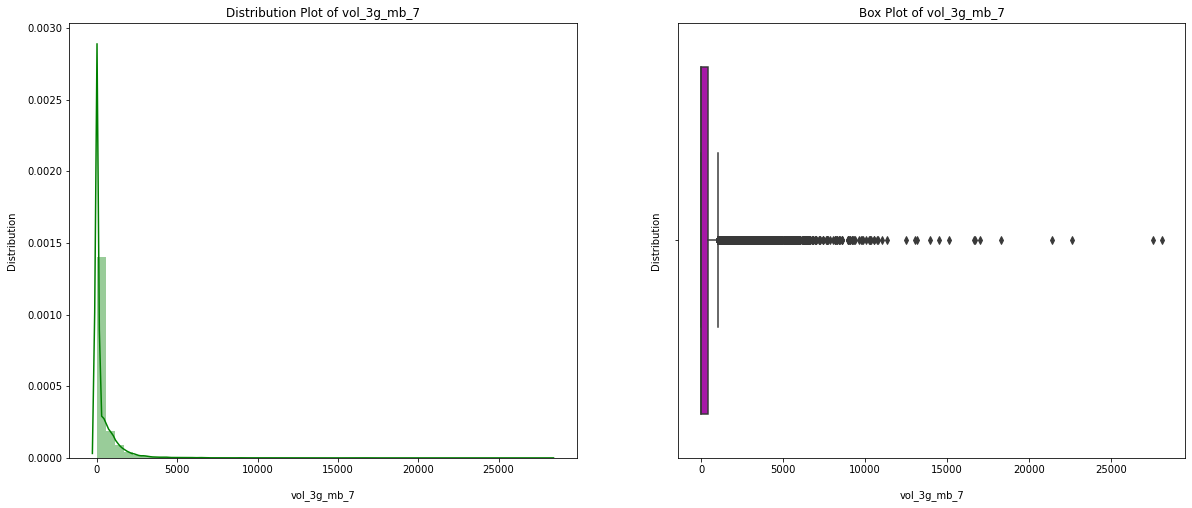

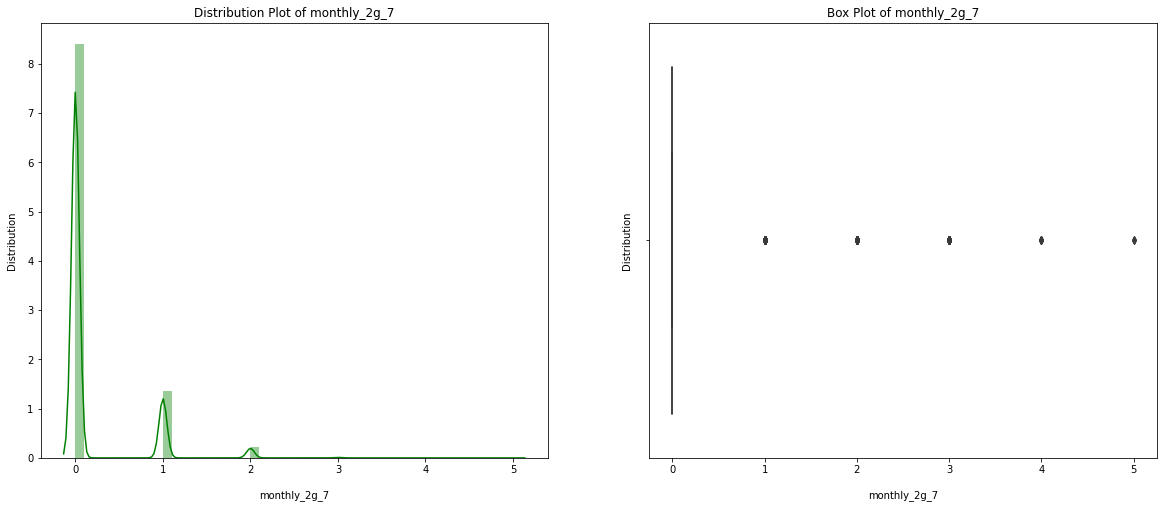

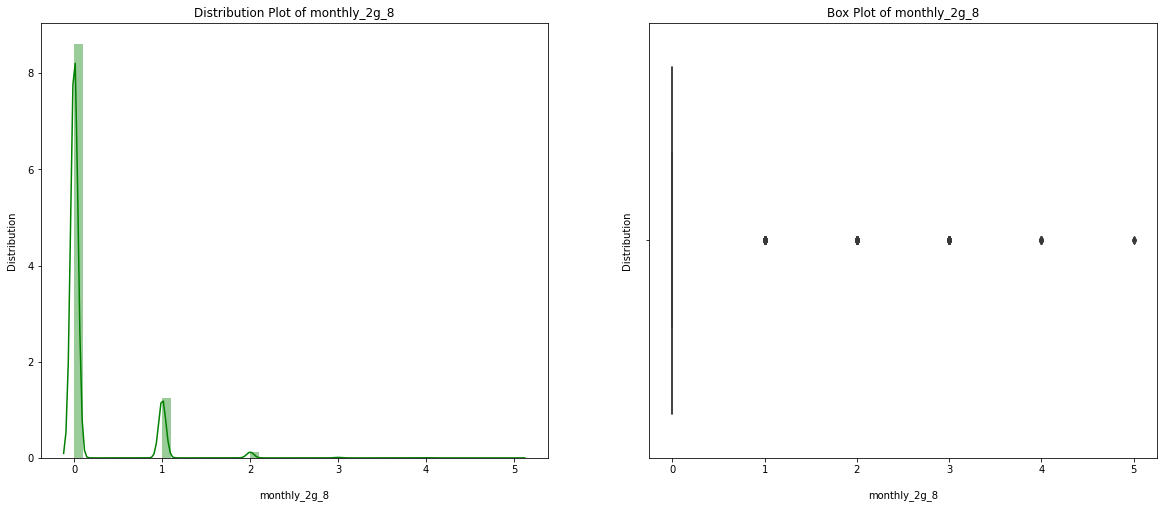

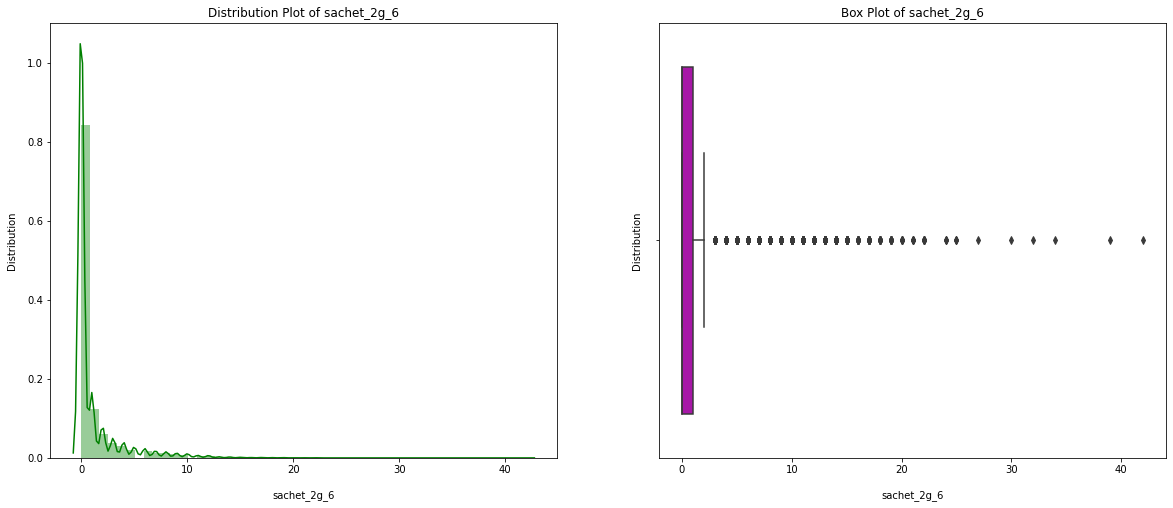

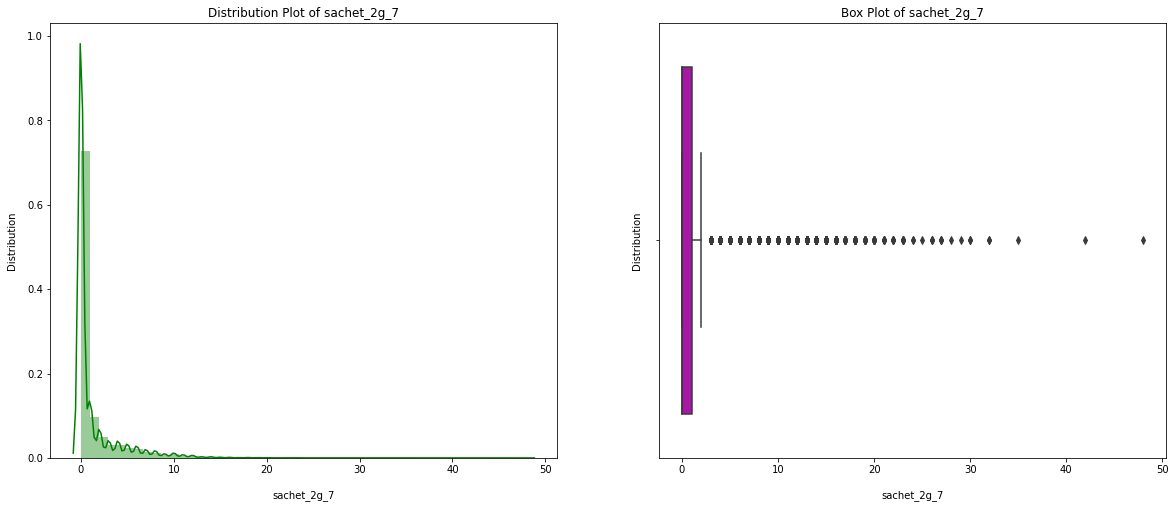

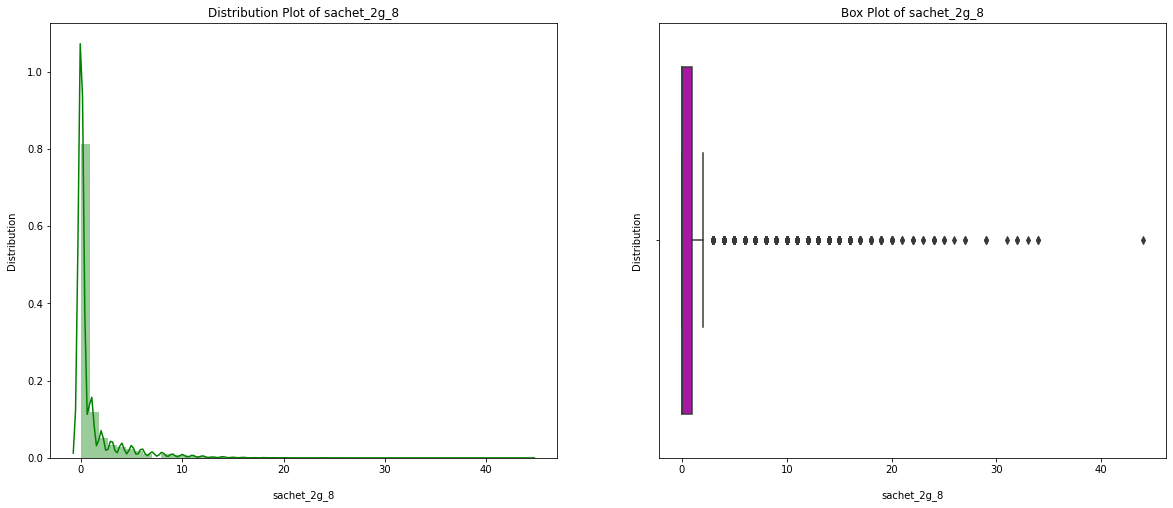

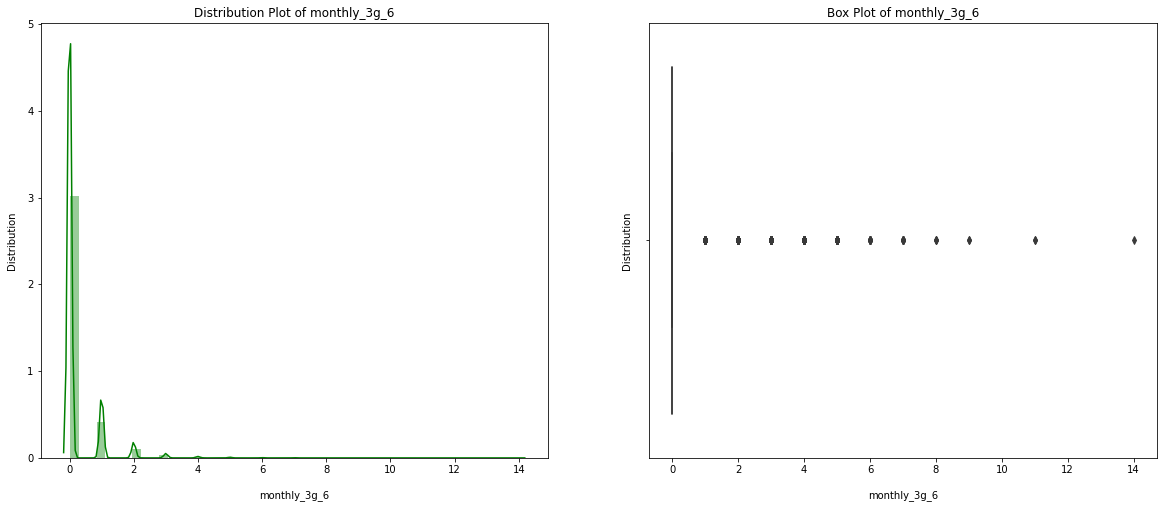

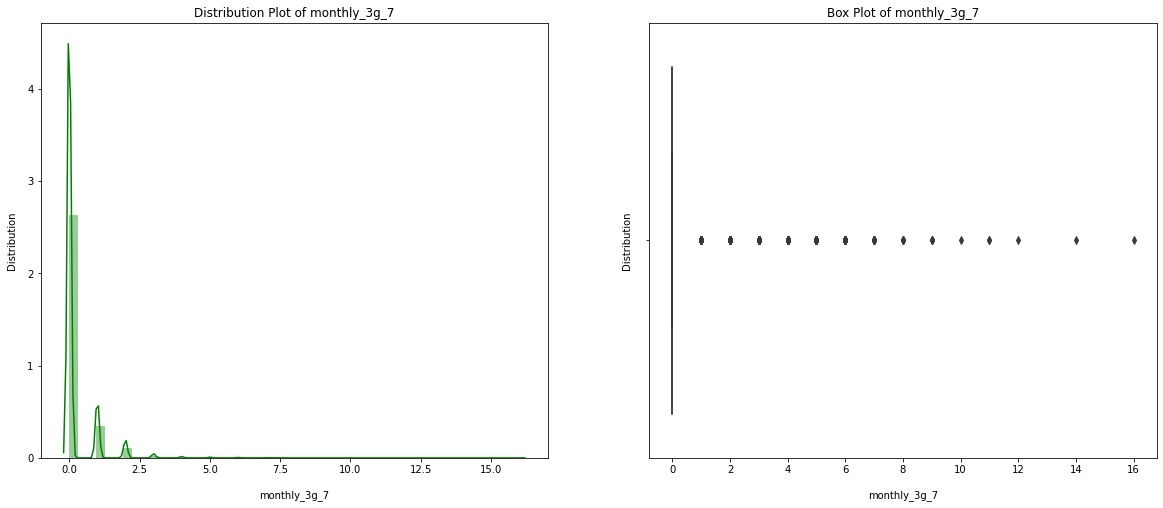

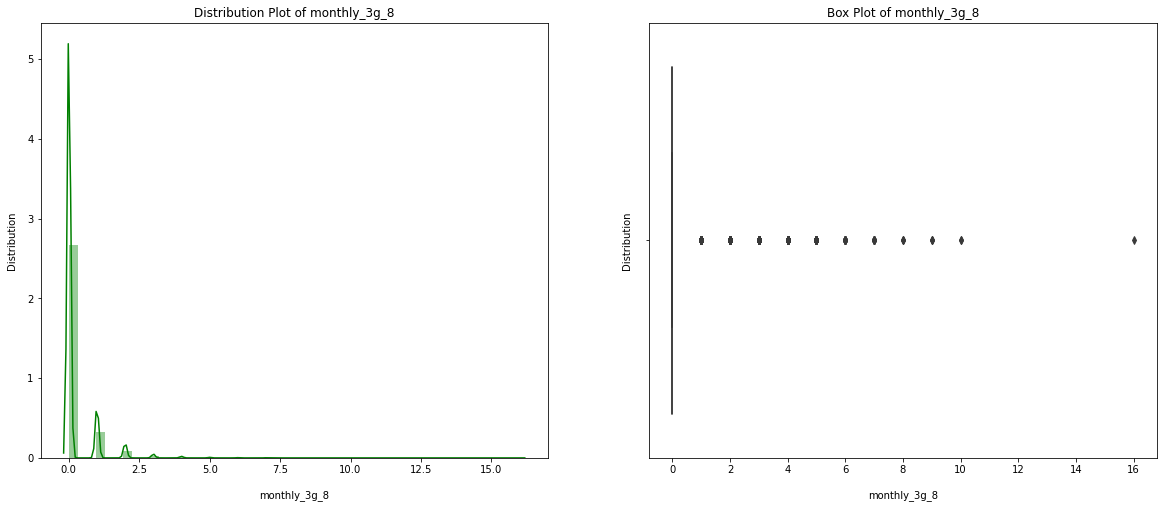

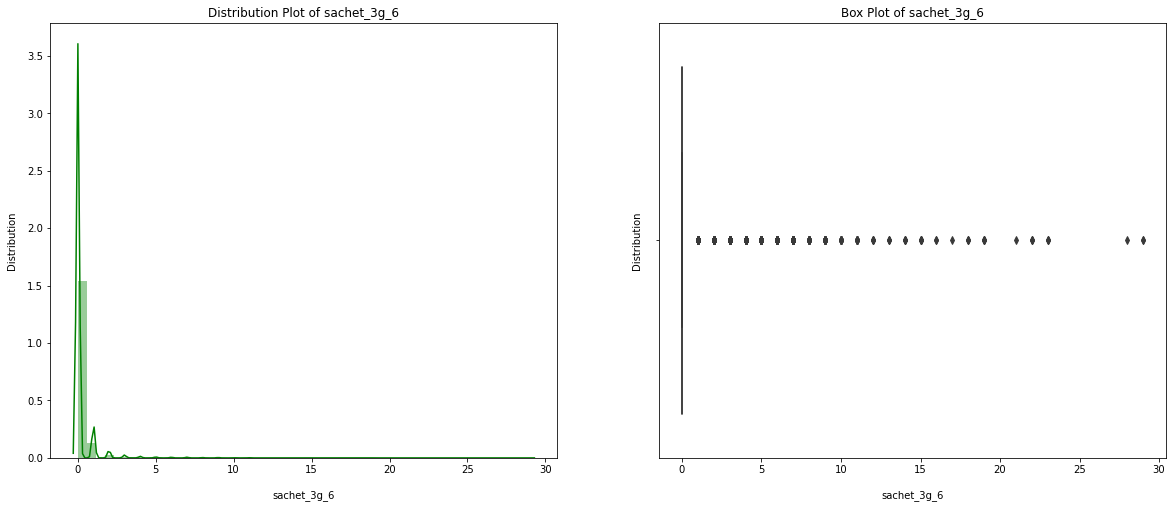

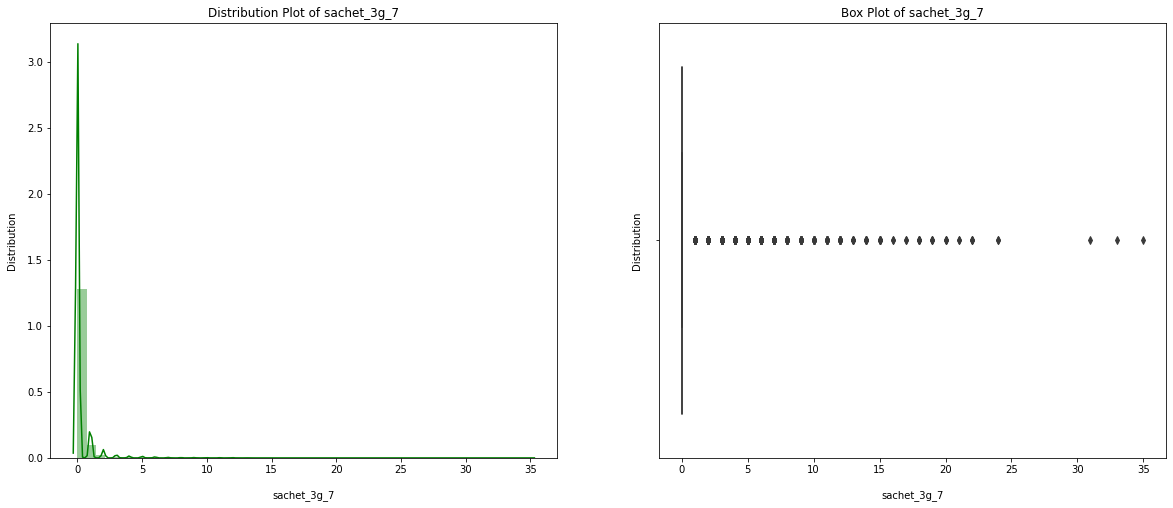

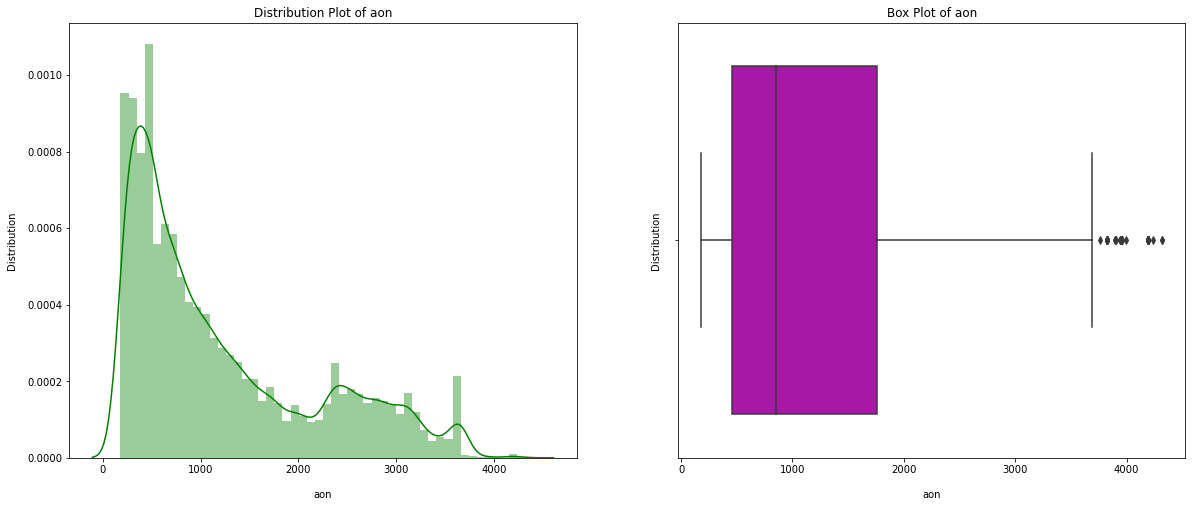

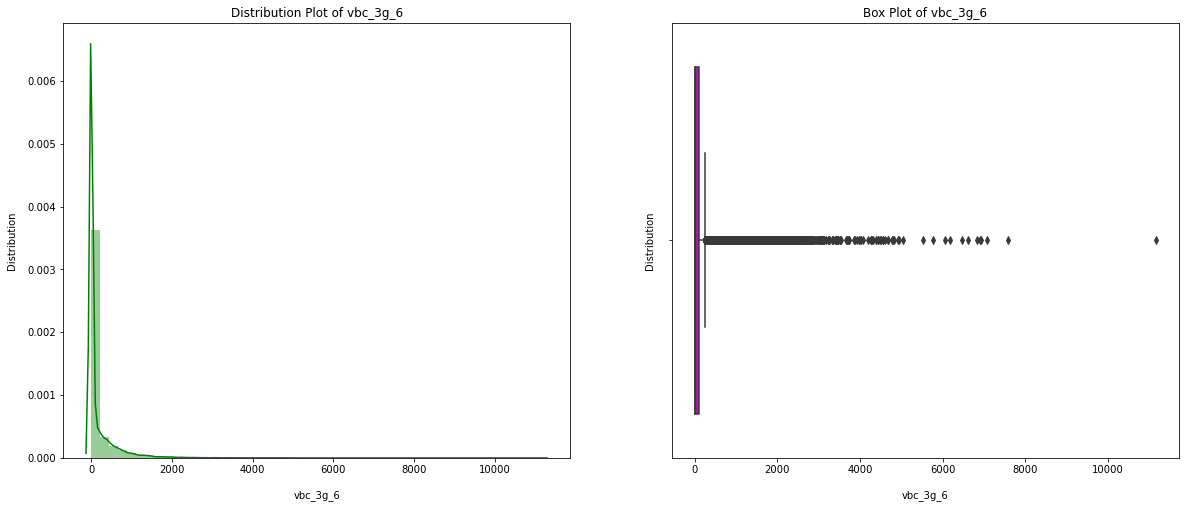

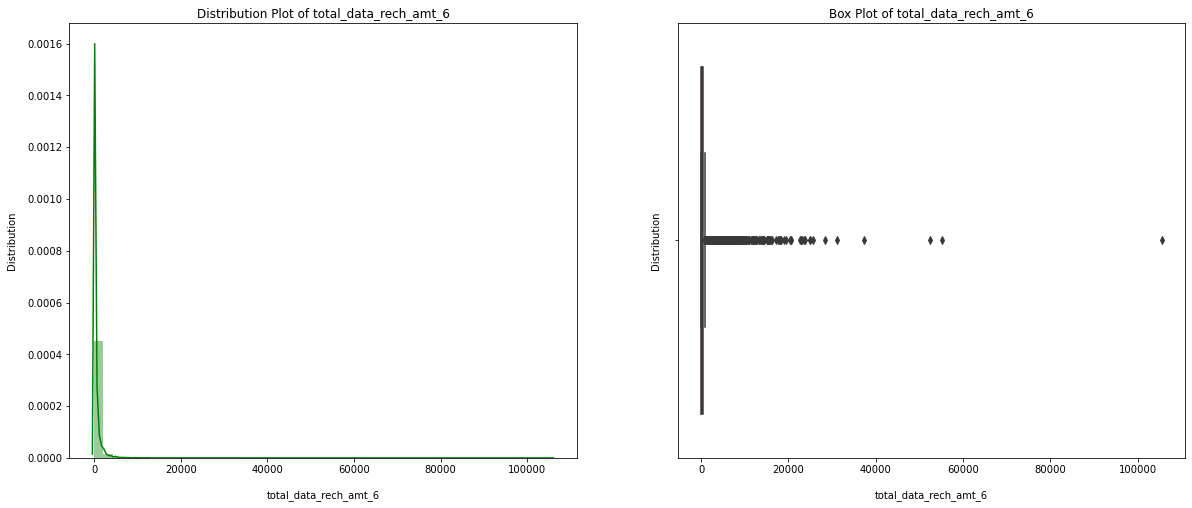

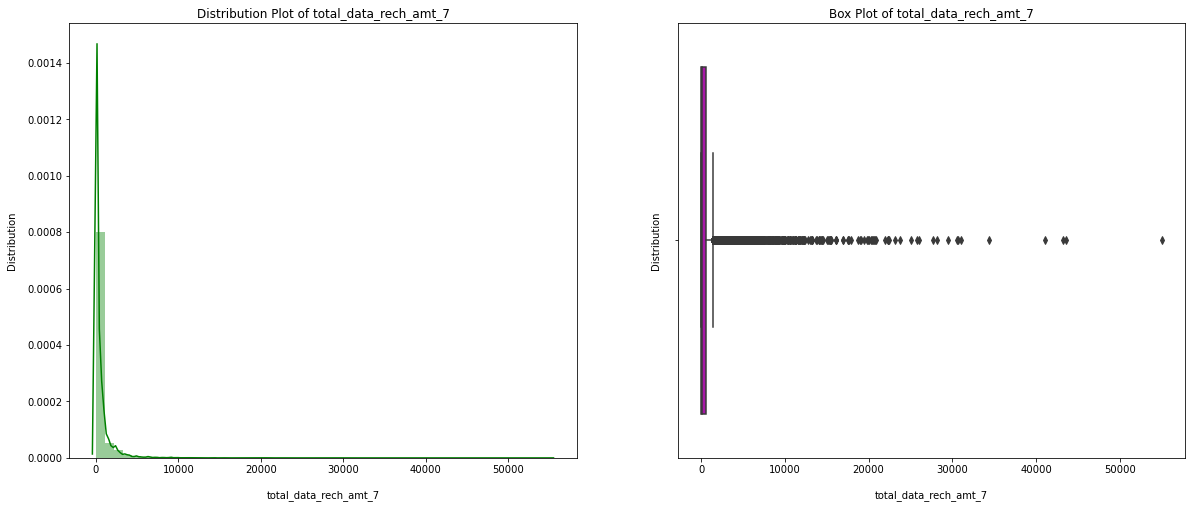

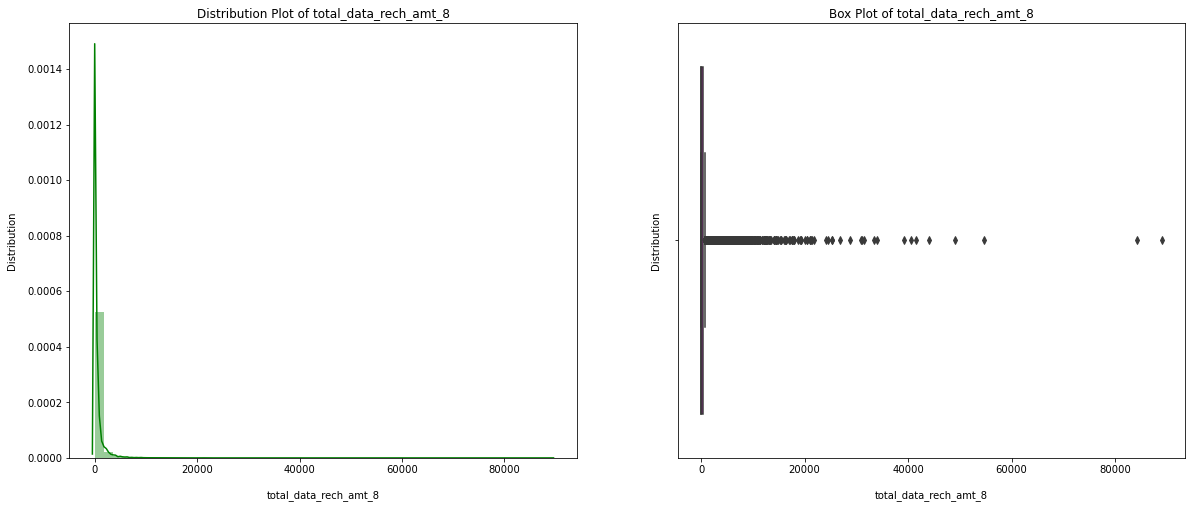

In [72]:
cat_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in df.columns:
    
    if col_list not in cat_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = df,
                        wspace = 0.2)

        counter += 1

###### There are lot of Outliers present 

### Bivariate Analysis - variable =churn

In [73]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)
    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = df, showfliers = False)
    plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)
    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = df, showfliers = False)
    plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)
    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = df, showfliers = False)
    plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu


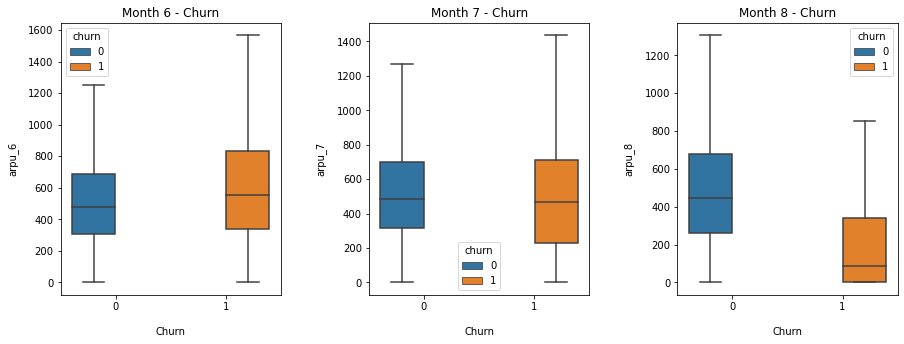


Data Visualization of churn vs onnet_mou


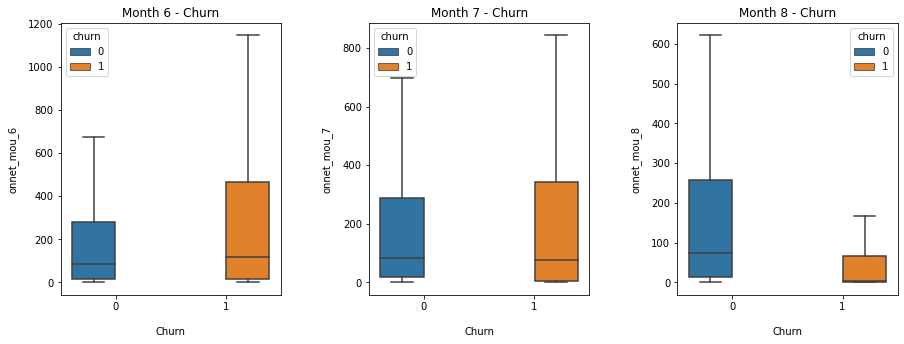


Data Visualization of churn vs offnet_mou


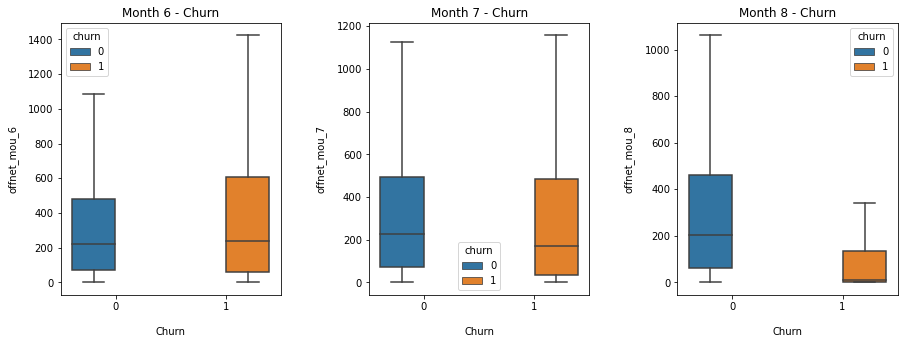


Data Visualization of churn vs total_og_mou


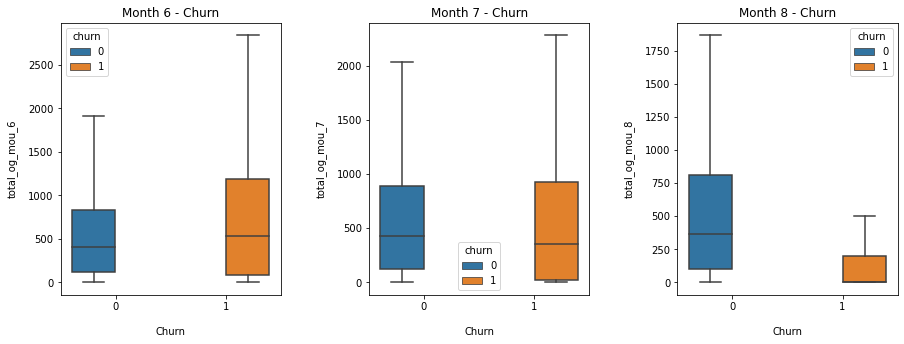


Data Visualization of churn vs total_ic_mou


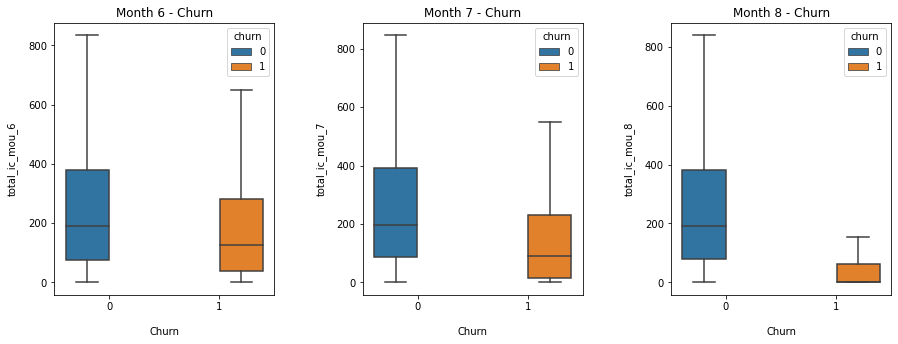


Data Visualization of churn vs total_rech_num


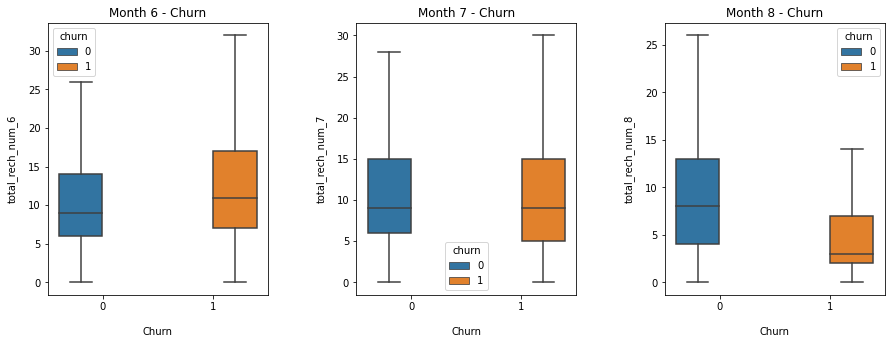


Data Visualization of churn vs total_rech_amt


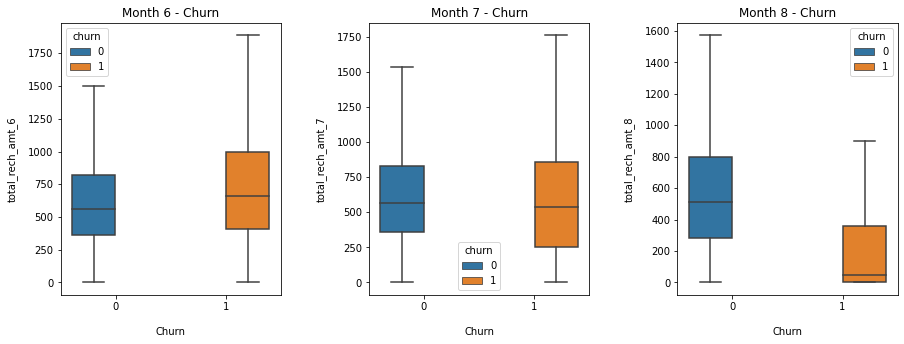


Data Visualization of churn vs total_rech_data


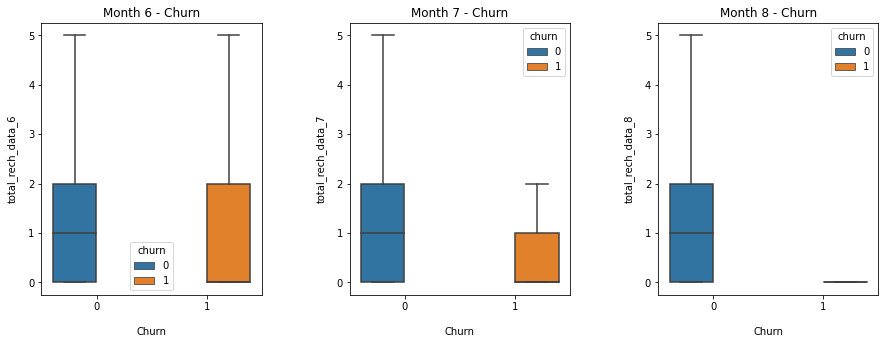


Data Visualization of churn vs vol_2g_mb



Data Visualization of churn vs vol_3g_mb


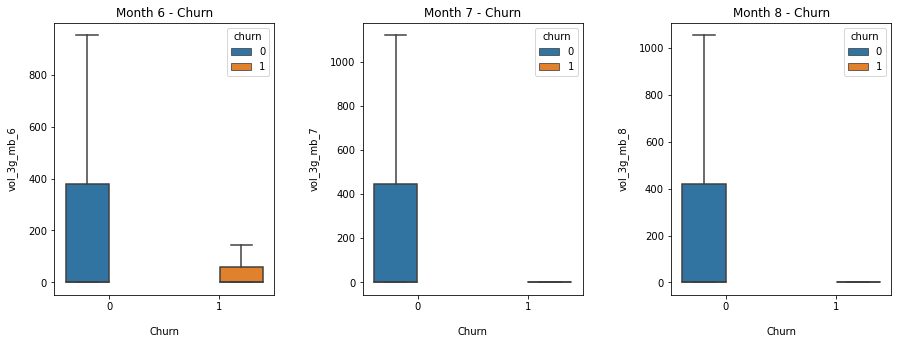


Data Visualization of churn vs vbc_3g


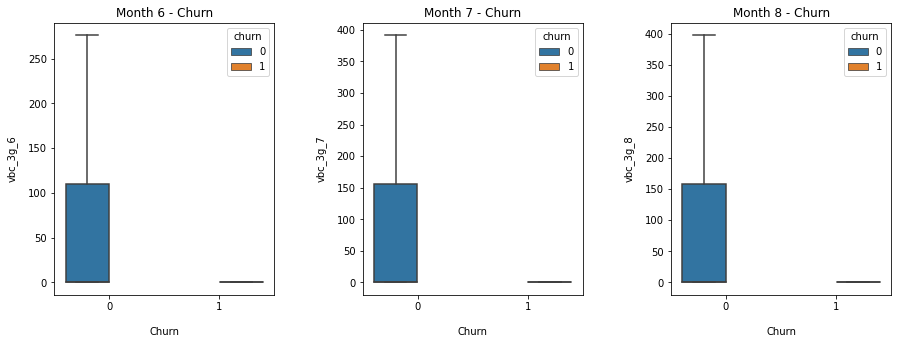


Data Visualization of churn vs total_data_rech_amt


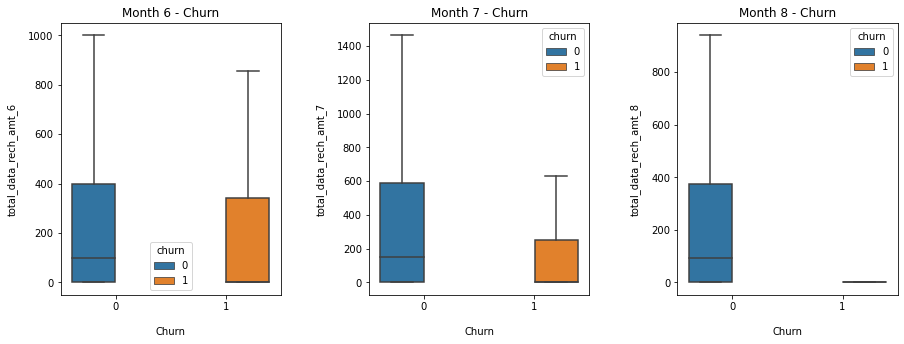

In [74]:
plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

#### Bivariate Analysis - Quantative Variables

In [75]:
df.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.682003  0.619778     0.343885     0.218888   
arpu_7                 0.682003  1.000000  0.767143     0.212713     0.321003   
arpu_8                 0.619778  0.767143  1.000000     0.150736     0.232295   
onnet_mou_6            0.343885  0.212713  0.150736     1.000000     0.751896   
onnet_mou_7            0.218888  0.321003  0.232295     0.751896     1.000000   
onnet_mou_8            0.190011  0.270779  0.345283     0.621407     0.806452   
offnet_mou_6           0.515151  0.355968  0.279095     0.088235     0.052263   
offnet_mou_7           0.344861  0.492669  0.376009     0.036756     0.081527   
offnet_mou_8           0.293097  0.397986  0.523837     0.033265     0.073065   
roam_ic_mou_6          0.126446  0.092642  0.088353     0.024091     0.038215   
roam_ic_mou_7          0.084451  0.093467  0.077881     0.024768     0.008461   
roam_ic_mou_8          0.091188  0.093837  0.110957     0.044219     0.037248   
roam_og_mou_6          0.193762  0.134787  0.130101     0.076006     0.082124   
roam_og_mou_7          0.144104  0.180120  0.141780     0.075626     0.068651   
roam_og_mou_8          0.125665  0.152270  0.199539     0.073057     0.083897   
loc_og_mou_6           0.332272  0.215675  0.208371     0.293235     0.201469   
loc_og_mou_7           0.250254  0.305336  0.264363     0.225099     0.302650   
loc_og_mou_8           0.228189  0.256323  0.347087     0.188050     0.238189   
std_og_mou_6           0.389018  0.250161  0.148893     0.628700     0.469192   
std_og_mou_7           0.233674  0.382571  0.257377     0.449339     0.625063   
std_og_mou_8           0.187182  0.306308  0.398798     0.369663     0.508153   
isd_og_mou_6           0.468214  0.420003  0.397011    -0.014594    -0.014313   
isd_og_mou_7           0.423341  0.511164  0.440010    -0.016056    -0.014017   
isd_og_mou_8           0.415527  0.454754  0.457025    -0.014064    -0.012222   
spl_og_mou_6           0.122977  0.068380  0.100929     0.098952     0.061966   
spl_og_mou_7           0.068927  0.115440  0.124794     0.079091     0.110041   
spl_og_mou_8           0.045037  0.070322  0.107687     0.083549     0.110168   
og_others_6            0.054344  0.018084  0.013613     0.054322     0.028640   
og_others_7            0.024506  0.026200  0.015812    -0.000490    -0.000414   
og_others_8            0.015547  0.017888  0.012377    -0.003241     0.002485   
total_og_mou_6         0.560203  0.368902  0.274829     0.717400     0.525254   
total_og_mou_7         0.369345  0.538390  0.400670     0.521161     0.720013   
total_og_mou_8         0.309954  0.431726  0.560766     0.421604     0.569349   
loc_ic_mou_6           0.181510  0.109477  0.116134     0.027408    -0.018035   
loc_ic_mou_7           0.142665  0.165308  0.158176     0.011159     0.019095   
loc_ic_mou_8           0.124397  0.143613  0.208142    -0.003189     0.005993   
std_ic_mou_6           0.124386  0.087636  0.073925     0.082800     0.049152   
std_ic_mou_7           0.085947  0.123759  0.099254     0.053420     0.076198   
std_ic_mou_8           0.079674  0.116897  0.139846     0.041200     0.064282   
total_ic_mou_6         0.225125  0.140187  0.143012     0.051286    -0.002348   
total_ic_mou_7         0.169390  0.211376  0.193330     0.025798     0.042644   
total_ic_mou_8         0.151226  0.184371  0.253321     0.009481     0.026406   
spl_ic_mou_6           0.030974  0.007778  0.009197     0.035402     0.016282   
spl_ic_mou_7          -0.034140 -0.015937 -0.016210    -0.030378    -0.012002   
spl_ic_mou_8          -0.011639 -0.007898  0.021543    -0.021840    -0.029643   
isd_ic_mou_6           0.101627  0.059973  0.070237    -0.016210    -0.023682   
isd_ic_mou_7           0.063595  0.100083  0.087563    -0.021260    -0.016569   
isd_ic_mou_8           0.071179  0.082853  0.106602    -0.017470    -0.016902   
ic_others_6            0.016058  0.008028  0.010694    -

In [76]:
plt.figure(figsize = (35, 30))
sns.heatmap(df.corr())
plt.show()


In [77]:
df_corr = df.corr().abs()
df_corr.loc[:,:] = np.tril(df_corr, k=-1)
df_corr = df_corr.stack()
df_corr
df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

sachet_2g_8       count_rech_2g_8      0.987167
sachet_2g_7       count_rech_2g_7      0.986406
sachet_2g_6       count_rech_2g_6      0.984860
total_rech_amt_8  arpu_8               0.963979
total_rech_amt_6  arpu_6               0.955028
total_rech_amt_7  arpu_7               0.953983
isd_og_mou_8      isd_og_mou_7         0.943389
                  isd_og_mou_6         0.918919
isd_og_mou_7      isd_og_mou_6         0.916470
count_rech_2g_6   total_rech_data_6    0.911053
count_rech_2g_7   total_rech_data_7    0.910095
count_rech_2g_8   total_rech_data_8    0.906526
sachet_2g_7       total_rech_data_7    0.904105
sachet_2g_6       total_rech_data_6    0.903543
sachet_2g_8       total_rech_data_8    0.900531
total_ic_mou_6    loc_ic_mou_6         0.896370
total_ic_mou_8    loc_ic_mou_8         0.896067
total_ic_mou_7    loc_ic_mou_7         0.884253
sachet_3g_8       count_rech_3g_8      0.875485
sachet_3g_7       count_rech_3g_7      0.858176
sachet_3g_6       count_rech_3g_6      0

In [78]:
col_to_drop=['sachet_2g_8',
             'sachet_2g_7',
             'sachet_2g_6',
             'total_rech_amt_8',
             'total_rech_amt_6',
             'total_rech_amt_7',
             'isd_og_mou_8',
             'isd_og_mou_6',
             'isd_og_mou_7',
             'count_rech_2g_6',
             'count_rech_2g_7',
             'count_rech_2g_8',
             'sachet_2g_7',
             'sachet_2g_6',
             'sachet_2g_8',
             'total_ic_mou_6',
             'total_ic_mou_8',
             'total_ic_mou_7',
             'sachet_3g_8',
             'sachet_3g_7',
             'sachet_3g_6',
             'total_og_mou_8',
             'total_og_mou_7',
             'loc_og_mou_8',
             'loc_ic_mou_8',
             'total_ic_mou_8',
             'loc_og_mou_7',
             'onnet_mou_8',
             'total_ic_mou_7']

# criteria set is for collinearity of 80%

df.drop(col_to_drop, axis=1, inplace=True)

In [79]:
df.shape

(29824, 80)

In [80]:
# creating a new variable 'tenure'
df['tenure'] = (df['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
df.drop('aon',axis=1, inplace=True)

In [81]:
sns.distplot(df['tenure'],bins=30)
plt.show()

In [82]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels=tn_label)
df['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

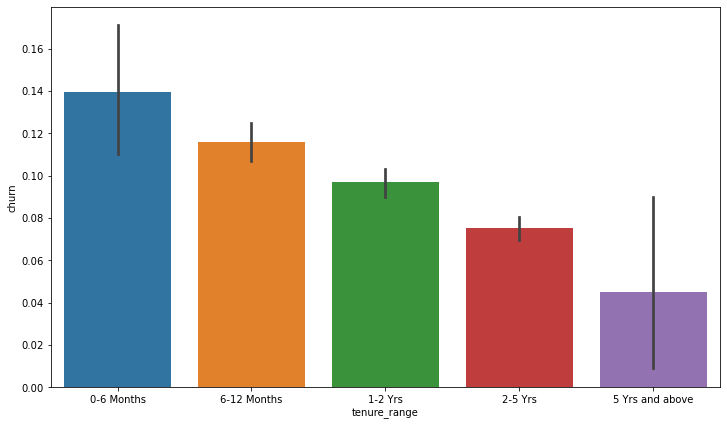

In [83]:
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=df)
plt.show()

##### Inference - The maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.


The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [84]:
df["avg_arpu_6_7"]= (df['arpu_6']+df['arpu_7'])/2
df['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [85]:
df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [86]:
df.shape

(29824, 80)

In [87]:
sns.distplot(df['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

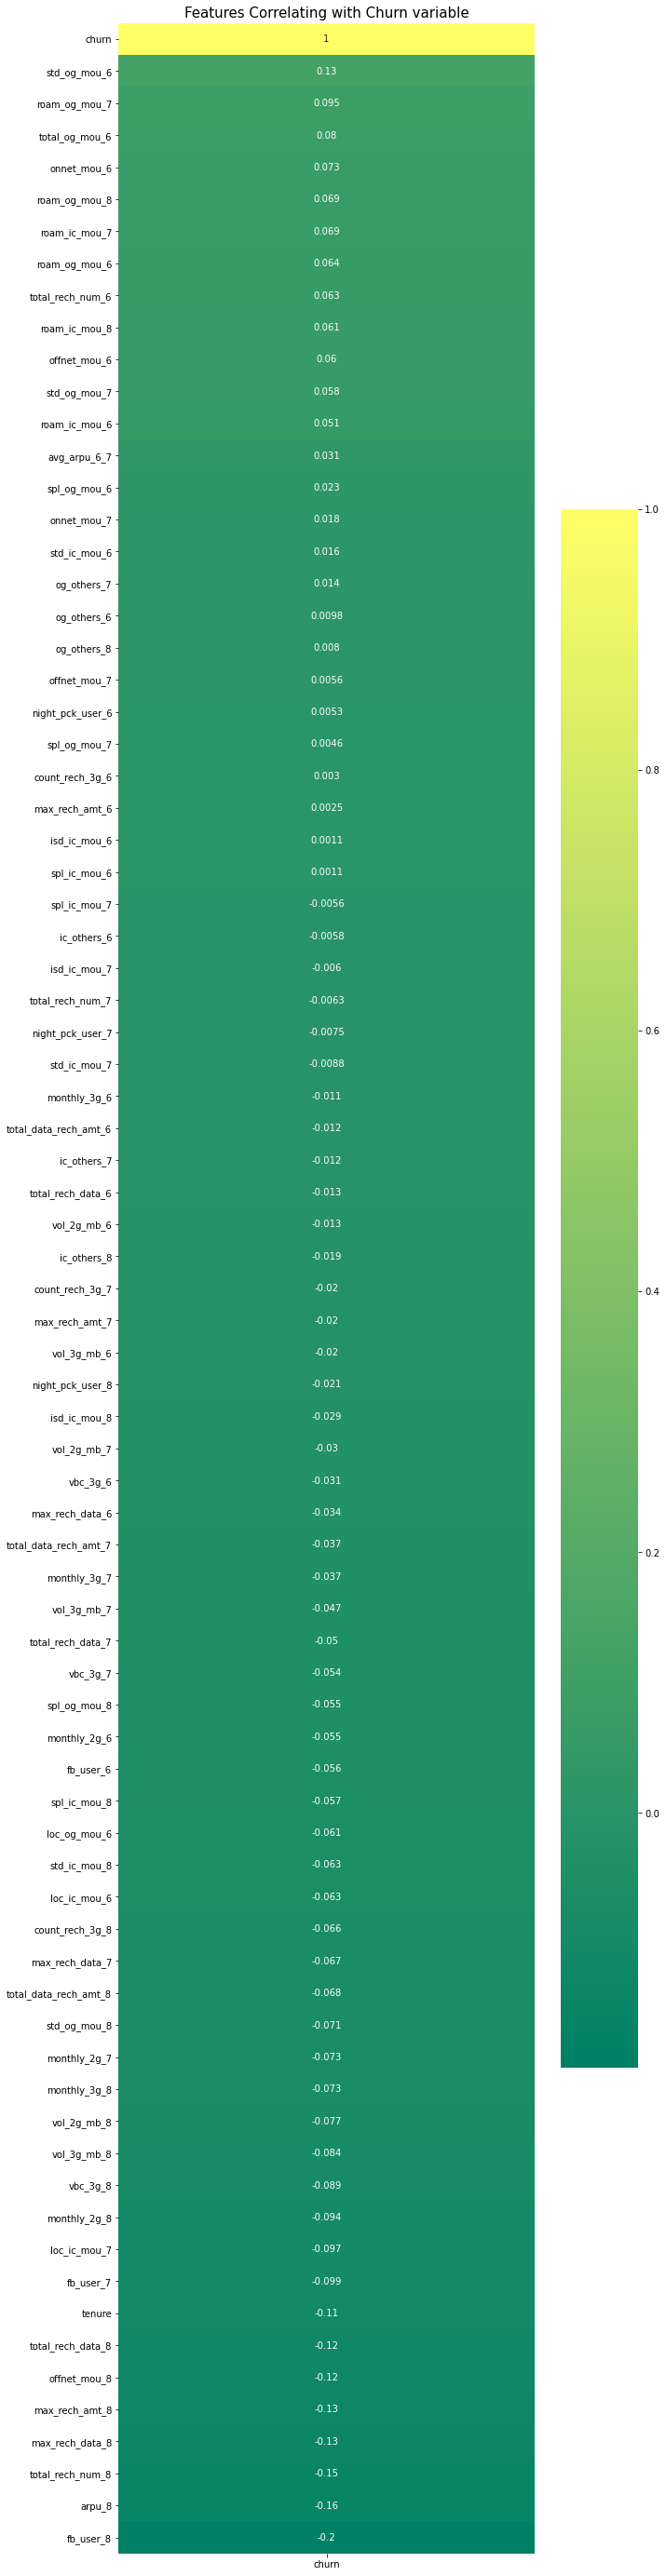

In [88]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True,cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [89]:
sns.boxplot(x = df.churn, y = df.tenure)

plt.show()

##### From the above plot , its clear tenured customers do no churn and they keep availing telecom services

In [90]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 0)],
                color="blue", shade = True)
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 1)],
                ax =ax, color="green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

In [91]:
# Creating categories for month 8 column totalrecharge and their count
df['total_rech_data_group_8']=pd.cut(df['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
df['total_rech_num_group_8']=pd.cut(df['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15279
No_Recharge        13900
10-25_Recharges      607
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


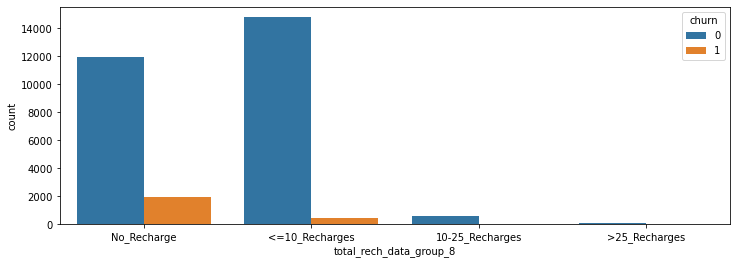

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19226
10-25_Recharges     8239
>25_Recharges       1822
No_Recharge          537
Name: total_rech_num_group_8, dtype: int64


In [92]:
plt.figure(figsize=[12,4])
sns.countplot(data=df,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",df['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=df,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",df['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [93]:
dummy = pd.get_dummies(df[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

total_rech_data_group_8_<=10_Recharges  \
0                                       1   
1                                       0   
2                                       1   
3                                       0   
4                                       1   

   total_rech_data_group_8_10-25_Recharges  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   total_rech_data_group_8_>25_Recharges  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   total_rech_num_group_8_<=10_Recharges  \
0                                      1   
1                                      1   
2                                      0   
3                                      0   
4                                      1   

   total_rech_num_group_8_10-25_Recharges  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   total_rech_num_group_8_>25_Recharges  tenure_range_6-12 Months  \
0                                     0                         0   
1                                     0                         0   
2                                     0                         1   
3                                     1                         0   
4                                     0                         0   

   tenure_range_1-2 Yrs  tenure_range_2-5 Yrs  tenure_range_5 Yrs and above  
0                     0                     1                             0  
1                     0                     1                             0  
2                     0                     0                             0  
3                     1                     0                             0  
4                     1                     0                             0

In [94]:
df = pd.concat([df, dummy], axis=1)
df.head()

arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0   213.803         0.00         0.00          0.00          0.00   
1  3171.480        57.84        54.68        453.43        567.16   
2   137.362       413.69       351.03         94.66         80.63   
3   637.760       102.41       132.11        757.93        896.68   
4   366.966        48.96        50.66         85.41         89.36   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00           0.00           0.00           0.00           0.00   
1        325.91          16.23          33.49          31.64          23.74   
2        136.48           0.00           0.00           0.00           0.00   
3        983.39           0.00           0.00           0.00           0.00   
4        205.89           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  std_og_mou_6  std_og_mou_7  \
0           0.00           0.00          0.00          0.00          0.00   
1          12.59          38.06        422.16         60.86         75.14   
2           0.00           0.00        378.09        130.26        143.48   
3           0.00           0.00         97.04        763.29        934.69   
4           0.00           0.00        131.91          2.36          6.35   

   std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0          0.00           0.0           0.0          0.00          0.0   
1         77.84           4.5           0.0          6.50          0.0   
2         98.28           0.0           0.0         10.23          0.0   
3        938.79           0.0           0.0          0.00          0.0   
4         39.61           0.1           0.0         17.71          0.0   

   og_others_7  og_others_8  total_og_mou_6  loc_ic_mou_6  loc_ic_mou_7  \
0          0.0          0.0            0.00          0.00          0.00   
1          0.0          0.0          487.53        427.88        355.23   
2          0.0          0.0          508.36         81.43         23.83   
3          0.0          0.0          860.34        125.33         87.68   
4          0.0          0.0          134.38        116.63        174.41   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
0          0.00          0.00          0.00          0.00           0.0   
1        180.54        173.08        193.94          0.21           0.0   
2         22.43          4.66          0.75          0.00           0.0   
3         81.76         44.21        101.93          0.00           0.0   
4          2.94         14.89         57.29          0.00           0.0   

   spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
0           0.0          0.00          0.00          0.00         0.00   
1           0.0          2.06         14.53         31.59        15.74   
2           0.0          0.00          0.00          0.00         0.00   
3           0.0          0.00          0.00          0.00         0.00   
4           0.0          0.00         28.23          3.74         0.00   

   ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
0         0.00         0.00                 4                 3   
1        15.19        15.14                 5                 5   
2         0.00         0.00                19                21   
3         0.00         0.00                22                26   
4         5.35        13.06                 3                 5   

   total_rech_num_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                 2             252             252             252   
1                 7            1580             790            1580   
2                14              90             154              30   
3                27              50              50              50   
4                 4               0             179             179   

   total_rech_data_6  total_re

In [95]:
df.drop(['tenure_range','total_rech_data_group_8','total_rech_num_group_8','tenure'], axis=1, inplace=True)

In [96]:
df.head()

arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0   213.803         0.00         0.00          0.00          0.00   
1  3171.480        57.84        54.68        453.43        567.16   
2   137.362       413.69       351.03         94.66         80.63   
3   637.760       102.41       132.11        757.93        896.68   
4   366.966        48.96        50.66         85.41         89.36   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00           0.00           0.00           0.00           0.00   
1        325.91          16.23          33.49          31.64          23.74   
2        136.48           0.00           0.00           0.00           0.00   
3        983.39           0.00           0.00           0.00           0.00   
4        205.89           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  std_og_mou_6  std_og_mou_7  \
0           0.00           0.00          0.00          0.00          0.00   
1          12.59          38.06        422.16         60.86         75.14   
2           0.00           0.00        378.09        130.26        143.48   
3           0.00           0.00         97.04        763.29        934.69   
4           0.00           0.00        131.91          2.36          6.35   

   std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0          0.00           0.0           0.0          0.00          0.0   
1         77.84           4.5           0.0          6.50          0.0   
2         98.28           0.0           0.0         10.23          0.0   
3        938.79           0.0           0.0          0.00          0.0   
4         39.61           0.1           0.0         17.71          0.0   

   og_others_7  og_others_8  total_og_mou_6  loc_ic_mou_6  loc_ic_mou_7  \
0          0.0          0.0            0.00          0.00          0.00   
1          0.0          0.0          487.53        427.88        355.23   
2          0.0          0.0          508.36         81.43         23.83   
3          0.0          0.0          860.34        125.33         87.68   
4          0.0          0.0          134.38        116.63        174.41   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
0          0.00          0.00          0.00          0.00           0.0   
1        180.54        173.08        193.94          0.21           0.0   
2         22.43          4.66          0.75          0.00           0.0   
3         81.76         44.21        101.93          0.00           0.0   
4          2.94         14.89         57.29          0.00           0.0   

   spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
0           0.0          0.00          0.00          0.00         0.00   
1           0.0          2.06         14.53         31.59        15.74   
2           0.0          0.00          0.00          0.00         0.00   
3           0.0          0.00          0.00          0.00         0.00   
4           0.0          0.00         28.23          3.74         0.00   

   ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
0         0.00         0.00                 4                 3   
1        15.19        15.14                 5                 5   
2         0.00         0.00                19                21   
3         0.00         0.00                22                26   
4         5.35        13.06                 3                 5   

   total_rech_num_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                 2             252             252             252   
1                 7            1580             790            1580   
2                14              90             154              30   
3                27              50              50              50   
4                 4               0             179             179   

   total_rech_data_6  total_re

In [97]:
df.shape

(29824, 88)

## Modeling

In [98]:
X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 87)
(20876,)
(8948, 87)
(8948,)


In [99]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [100]:
# Normalize the data(treating outliers)
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [101]:
X_train.head()

arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
22374  0.962679     0.372326     0.386684      3.011677      3.540061   
12986  2.098763    -0.015679     0.966929     -0.270051      3.168632   
18477  0.376753     1.805523     1.537403      1.248748      1.921942   
410   -0.878245    -0.157900     0.056626     -0.305356     -0.082232   
6549  -0.921798     0.367580     0.257124      1.833139      0.162264   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
22374      3.492047           0.00           0.00           0.00   
12986      3.607720          77.63         151.23         269.06   
18477      1.212997           6.68           0.00         329.38   
410       -0.358977           0.00           0.00           0.00   
6549      -0.467604         359.81         201.96          18.28   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
22374           0.00           0.00           0.00      0.843934   
12986         177.38         369.49        1168.99     -0.407532   
18477           1.05           0.00         310.29      2.778006   
410             0.00           0.00           0.00      0.013934   
6549          505.13         442.23           4.28     -0.100680   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
22374      2.620743      2.937229      4.254888     -0.044402     -0.101744   
12986     -0.073589      2.496132      1.593295     -0.044402     -0.101744   
18477      0.647496      0.753433      0.406246      2.214286      0.873547   
410       -0.100247     -0.091438     -0.075345      2.268340      0.549419   
6549       1.072988     -0.091438     -0.075345      3.911197     -0.101744   

       spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
22374      0.165563         0.00          0.0          0.0        1.667391   
12986     -0.071192         0.00          0.0          0.0       -0.534529   
18477      0.215232         0.00          0.0          0.0        1.216595   
410        0.473510         0.83          0.0          0.0       -0.364671   
6549      -0.071192         1.49          0.0          0.0        0.341308   

       loc_ic_mou_6  loc_ic_mou_7  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
22374      0.528919      0.491717      2.062194      1.265394      1.396114   
12986     -0.529120      0.595921     -0.275710      2.272727      1.196799   
18477      4.449485      4.252452      2.453967      0.363753      0.123281   
410        0.428350      1.000611     -0.152547     -0.278780     -0.244885   
6549      -0.053117     -0.561566      2.226983     -0.286463     -0.244885   

       spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
22374          0.15          0.00          0.25          0.00          0.00   
12986          0.00          0.80          0.00          0.00          0.00   
18477          0.00          0.00          0.00         11.23          5.78   
410            0.00          0.38          0.00          0.00          0.00   
6549           0.15          0.00          0.00          0.00          0.00   

       isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
22374          0.00          0.0         0.00         0.00          0.222222   
12986          0.00          0.0         2.11         0.25         -0.333333   
18477         23.06          0.0         0.00         0.00          0.444444   
410            0.00          0.0         4.33         0.00          1.222222   
6549           0.00          0.0         0.00         0.00          0.222222   

       total_rech_num_7  total_rech_num_8  max_rech_amt_6  max_rech_amt_7  \
22374          0.333333          0.333333       -0.111111        0.022222   
12986          0.555556          0.888889        0.088889        0.000000   
18477          0.333333          0.000000       -0.111111        0.022222   
410            1.444444         -0.666667       -0.777778       -0.86

### Data Imbalance Handling

In [102]:
# Handeling data imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [103]:
X_train_sm.shape

(38516, 87)

In [104]:
y_train_sm.shape

(38516,)

In [105]:
y_train_sm.value_counts()

0    19258
1    19258
Name: churn, dtype: int64

**Data is now balanced.**

### Logistic Regression

In [106]:
# Importing the necessary library
import statsmodels.api as sm
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

In [107]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38428
Model Family:                Binomial   Df Model:                           87
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10038.
Date:                Mon, 31 May 2021   Deviance:                       20076.
Time:                        13:24:19   Pearson chi2:                 3.15e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       6.0924      0.455     13.390      0.000       5.201       6.984
arpu_8                                     -0.7787      0.060    -12.886      0.000      -0.897      -0.660
onnet_mou_6                                -0.7048      1.032     -0.683      0.495      -2.727       1.318
onnet_mou_7                                -0.3313      0.044     -7.573      0.000      -0.417      -0.246
offnet_mou_6                               -1.1734      1.555     -0.755      0.450      -4.221       1.874
offnet_mou_7                                0.1523      0.069      2.206      0.027       0.017       0.288
offnet_mou_8                               -0.9511      0.054    -17.670      0.000      -1.057      -0.846
roam_ic_mou_6                              -0.0004      0.000     -0.977      0.329      -0.001       0.000
roam_ic_mou_7                               0.0007      0.000      1.782      0.075   -6.91e-05       0.001
roam_ic_mou_8                               0.0006      0.000      1.612      0.107      -0.000       0.001
roam_og_mou_6                               0.0027      0.004      0.704      0.481      -0.005       0.010
roam_og_mou_7                               0.0009      0.000      2.803      0.005       0.000       0.002
roam_og_mou_8                               0.0033      0.000     11.307      0.000       0.003       0.004
loc_og_mou_6                               -1.1239      0.351     -3.206      0.001      -1.811      -0.437
std_og_mou_6                               -1.4158      0.550     -2.574      0.010      -2.494      -0.338
std_og_mou_7                                0.4464      0.081      5.500      0.000       0.287       0.606
std_og_mou_8                                0.0522      0.035      1.499      0.134      -0.016       0.120
spl_og_mou_6                               -0.0291      0.010     -2.947      0.003      -0.048      -0.010
spl_og_mou_7                             4.609e-05      0.011      0.004      0.997      -0.021       0.021
spl_og_mou_8                                0.0044      0.010      0.448      0.654      -0.015       0.024
og_others_6                                -0.0131      0.013     -1.044      0.297      -0.038       0.012
og_others_7                                -0.0036      0.009     -0.401      0.688      -0.021       0.014
og_others_8                                 0.0115      0.010      1.181      0.238      -0.008       0.031
total_og_mou_6                              4.4767      2.809      1.594      0.111      -1.029       9.982
loc_ic_mou_6                                0.1368      0.031      4.452      0.000       0.077       0.197
loc_ic_mou_7                               -0.4649      0.0

> We can see that there are multiple variables that have a high p-value. Therefore, we use RFE method to get the top 20 variables that are the most significant.

In [108]:
# RFE method with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [109]:
# Features that have been selected by RFE
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 10),
 ('onnet_mou_7', False, 28),
 ('offnet_mou_6', False, 9),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 64),
 ('roam_ic_mou_7', False, 63),
 ('roam_ic_mou_8', False, 65),
 ('roam_og_mou_6', False, 66),
 ('roam_og_mou_7', False, 45),
 ('roam_og_mou_8', False, 50),
 ('loc_og_mou_6', False, 7),
 ('std_og_mou_6', False, 23),
 ('std_og_mou_7', False, 27),
 ('std_og_mou_8', False, 24),
 ('spl_og_mou_6', False, 40),
 ('spl_og_mou_7', False, 43),
 ('spl_og_mou_8', False, 38),
 ('og_others_6', False, 52),
 ('og_others_7', False, 39),
 ('og_others_8', False, 58),
 ('total_og_mou_6', False, 8),
 ('loc_ic_mou_6', False, 18),
 ('loc_ic_mou_7', True, 1),
 ('std_ic_mou_6', False, 55),
 ('std_ic_mou_7', False, 31),
 ('std_ic_mou_8', False, 26),
 ('spl_ic_mou_6', False, 61),
 ('spl_ic_mou_7', False, 54),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 60),
 ('isd_ic_mou_7', False, 67),
 ('isd_ic_mou_8', False, 5

In [110]:
# Selecting columns selected by RFE
columns = X_train_sm.columns[rfe.support_]

X_train_rfe = X_train_sm[columns]

**Logistic Regression model with the help of RFE:**

In [111]:
# Logistic regression model 2 
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38495
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11573.
Date:                Mon, 31 May 2021   Deviance:                       23146.
Time:                        13:25:05   Pearson chi2:                 1.25e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       4.8601      0.098     49.615      0.000       4.668       5.052
arpu_8                                     -0.8886      0.037    -23.802      0.000      -0.962      -0.815
offnet_mou_7                                0.6123      0.030     20.515      0.000       0.554       0.671
offnet_mou_8                               -1.1152      0.045    -24.686      0.000      -1.204      -1.027
loc_ic_mou_7                               -0.7366      0.024    -31.290      0.000      -0.783      -0.690
spl_ic_mou_8                               -6.4824      0.446    -14.548      0.000      -7.356      -5.609
max_rech_data_8                             0.3513      0.037      9.502      0.000       0.279       0.424
night_pck_user_6                           -0.9694      0.298     -3.249      0.001      -1.554      -0.385
night_pck_user_7                           -0.6669      0.364     -1.831      0.067      -1.381       0.047
night_pck_user_8                           -0.2398      0.494     -0.486      0.627      -1.207       0.728
fb_user_8                                  -1.3557      0.097    -14.011      0.000      -1.545      -1.166
avg_arpu_6_7                                0.4615      0.027     17.178      0.000       0.409       0.514
total_rech_data_group_8_<=10_Recharges     -1.1194      0.086    -13.077      0.000      -1.287      -0.952
total_rech_data_group_8_10-25_Recharges    -2.5407      0.720     -3.530      0.000      -3.951      -1.130
total_rech_num_group_8_<=10_Recharges      -3.7864      0.097    -39.009      0.000      -3.977      -3.596
total_rech_num_group_8_10-25_Recharges     -4.8217      0.108    -44.689      0.000      -5.033      -4.610
total_rech_num_group_8_>25_Recharges       -5.3253      0.186    -28.608      0.000      -5.690      -4.960
tenure_range_6-12 Months                   -1.5195      0.053    -28.754      0.000      -1.623      -1.416
tenure_range_1-2 Yrs                       -1.5670      0.046    -34.123      0.000      -1.657      -1.477
tenure_range_2-5 Yrs                       -1.8758      0.045    -41.445      0.000      -1.965      -1.787
tenure_range_5 Yrs and above               -5.3733      0.953     -5.636      0.000      -7.242      -3.505
===========================================================================================================
"""

> Now, we have almost all the variables with p-value = 0. However, there are 2 variables present with a very high p-value viz., night_pck_user_8 & night_pck_user_7. Any variable with a higher p-value than 0.05 must be dropped, one by one.

In [112]:
#Dropping night_pck_user_8
X_train_rfe = X_train_rfe.drop(['night_pck_user_8'], axis=1)

In [113]:
# Logistic regression model 4
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38496
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11573.
Date:                Mon, 31 May 2021   Deviance:                       23147.
Time:                        13:25:05   Pearson chi2:                 1.25e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       4.8607      0.098     49.621      0.000       4.669       5.053
arpu_8                                     -0.8887      0.037    -23.804      0.000      -0.962      -0.816
offnet_mou_7                                0.6122      0.030     20.515      0.000       0.554       0.671
offnet_mou_8                               -1.1151      0.045    -24.685      0.000      -1.204      -1.027
loc_ic_mou_7                               -0.7366      0.024    -31.290      0.000      -0.783      -0.690
spl_ic_mou_8                               -6.4842      0.446    -14.551      0.000      -7.358      -5.611
max_rech_data_8                             0.3519      0.037      9.523      0.000       0.279       0.424
night_pck_user_6                           -0.9804      0.297     -3.299      0.001      -1.563      -0.398
night_pck_user_7                           -0.7094      0.354     -2.005      0.045      -1.403      -0.016
fb_user_8                                  -1.3560      0.097    -14.019      0.000      -1.546      -1.166
avg_arpu_6_7                                0.4615      0.027     17.176      0.000       0.409       0.514
total_rech_data_group_8_<=10_Recharges     -1.1208      0.086    -13.103      0.000      -1.288      -0.953
total_rech_data_group_8_10-25_Recharges    -2.5471      0.720     -3.540      0.000      -3.957      -1.137
total_rech_num_group_8_<=10_Recharges      -3.7868      0.097    -39.013      0.000      -3.977      -3.597
total_rech_num_group_8_10-25_Recharges     -4.8224      0.108    -44.698      0.000      -5.034      -4.611
total_rech_num_group_8_>25_Recharges       -5.3269      0.186    -28.624      0.000      -5.692      -4.962
tenure_range_6-12 Months                   -1.5194      0.053    -28.754      0.000      -1.623      -1.416
tenure_range_1-2 Yrs                       -1.5668      0.046    -34.120      0.000      -1.657      -1.477
tenure_range_2-5 Yrs                       -1.8757      0.045    -41.442      0.000      -1.964      -1.787
tenure_range_5 Yrs and above               -5.3736      0.954     -5.635      0.000      -7.243      -3.505
===========================================================================================================
"""

> All variables look good w.r.t p-value. Now, we must use VIF to ensure that there is no collinearity.

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                                 fb_user_8  9.24
10   total_rech_data_group_8_<=10_Recharges  8.69
0                                    arpu_8  2.92
2                              offnet_mou_8  2.83
1                              offnet_mou_7  2.47
9                              avg_arpu_6_7  2.32
5                           max_rech_data_8  2.18
12    total_rech_num_group_8_<=10_Recharges  2.18
13   total_rech_num_group_8_10-25_Recharges  1.80
17                     tenure_range_2-5 Yrs  1.51
16                     tenure_range_1-2 Yrs  1.47
11  total_rech_data_group_8_10-25_Recharges  1.42
7                          night_pck_user_7  1.33
6                          night_pck_user_6  1.32
15                 tenure_range_6-12 Months  1.30
14     total_rech_num_group_8_>25_Recharges  1.28
3                              loc_ic_mou_7  1.10
4                              spl_ic_mou_8  1.09
18             tenure_range_5 Yrs and above  1.01

> Variables that have a value higher than 5 must be dropped, one by one.

In [115]:
#Dropping total_rech_num_group_8_<=10_Recharges
X_train_rfe = X_train_rfe.drop(['fb_user_8'], axis=1)

In [116]:
# Logistic regression model 5
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train_sm, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38497
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11667.
Date:                Mon, 31 May 2021   Deviance:                       23335.
Time:                        13:25:06   Pearson chi2:                 1.14e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       4.8754      0.099     49.458      0.000       4.682       5.069
arpu_8                                     -0.9011      0.037    -24.143      0.000      -0.974      -0.828
offnet_mou_7                                0.6295      0.030     21.005      0.000       0.571       0.688
offnet_mou_8                               -1.1083      0.045    -24.526      0.000      -1.197      -1.020
loc_ic_mou_7                               -0.7445      0.024    -31.663      0.000      -0.791      -0.698
spl_ic_mou_8                               -6.5747      0.448    -14.689      0.000      -7.452      -5.697
max_rech_data_8                             0.2050      0.035      5.801      0.000       0.136       0.274
night_pck_user_6                           -0.9908      0.296     -3.351      0.001      -1.570      -0.411
night_pck_user_7                           -0.7739      0.350     -2.210      0.027      -1.460      -0.087
avg_arpu_6_7                                0.4948      0.027     18.585      0.000       0.443       0.547
total_rech_data_group_8_<=10_Recharges     -2.1260      0.052    -41.160      0.000      -2.227      -2.025
total_rech_data_group_8_10-25_Recharges    -3.8037      0.714     -5.328      0.000      -5.203      -2.404
total_rech_num_group_8_<=10_Recharges      -3.8260      0.098    -39.203      0.000      -4.017      -3.635
total_rech_num_group_8_10-25_Recharges     -4.8752      0.108    -44.995      0.000      -5.088      -4.663
total_rech_num_group_8_>25_Recharges       -5.4202      0.187    -29.054      0.000      -5.786      -5.055
tenure_range_6-12 Months                   -1.5423      0.052    -29.391      0.000      -1.645      -1.439
tenure_range_1-2 Yrs                       -1.5782      0.046    -34.513      0.000      -1.668      -1.489
tenure_range_2-5 Yrs                       -1.8768      0.045    -41.601      0.000      -1.965      -1.788
tenure_range_5 Yrs and above               -5.3885      0.955     -5.643      0.000      -7.260      -3.517
===========================================================================================================
"""

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                    arpu_8  2.91
9    total_rech_data_group_8_<=10_Recharges  2.87
2                              offnet_mou_8  2.82
1                              offnet_mou_7  2.47
8                              avg_arpu_6_7  2.31
11    total_rech_num_group_8_<=10_Recharges  2.18
5                           max_rech_data_8  2.00
12   total_rech_num_group_8_10-25_Recharges  1.79
16                     tenure_range_2-5 Yrs  1.51
15                     tenure_range_1-2 Yrs  1.47
7                          night_pck_user_7  1.33
6                          night_pck_user_6  1.32
14                 tenure_range_6-12 Months  1.29
13     total_rech_num_group_8_>25_Recharges  1.27
10  total_rech_data_group_8_10-25_Recharges  1.13
3                              loc_ic_mou_7  1.10
4                              spl_ic_mou_8  1.09
17             tenure_range_5 Yrs and above  1.01

> All values are now under 5. The current model seems to be the one we go forward with.

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.000437
1    0.001903
2    0.118226
3    0.335999
4    0.832811
5    0.675348
6    0.074184
7    0.380856
8    0.003294
9    0.024442
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.36905259e-04, 1.90334522e-03, 1.18226127e-01, 3.35999364e-01,
       8.32811337e-01, 6.75348244e-01, 7.41836893e-02, 3.80855927e-01,
       3.29350597e-03, 2.44421062e-02])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train_sm.index
y_train_pred_final.head()

Churn  Churn_Prob  ID
0      0    0.000437   0
1      0    0.001903   1
2      0    0.118226   2
3      0    0.335999   3
4      1    0.832811   4

In [121]:
# Creating a new column of predicted
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  ID  predicted
0      0    0.000437   0          0
1      0    0.001903   1          0
2      0    0.118226   2          0
3      0    0.335999   3          0
4      1    0.832811   4          1

In [122]:
from sklearn import metrics

In [123]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16945  2313]
 [ 2324 16934]]


In [124]:
# Predicted     not_churn    churn
# Actual
# not_churn        3439      515
# churn            821       1689  

In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8796084744002493


### Metrics Beyond Accuracy

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.879322878803614

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8798940699968845

In [129]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12010593000311559


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.8798254273393256


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8793917691629042


### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
#ROC Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

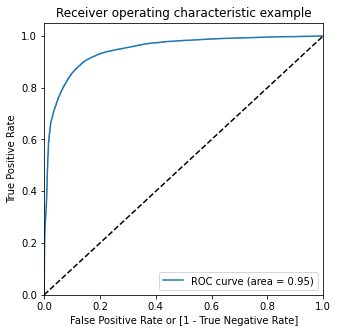

In [134]:
#ROC Curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [135]:
#Let's create columns with different probablitity cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0    0.000437   0          0    1    0    0    0    0    0    0    0   
1      0    0.001903   1          0    1    0    0    0    0    0    0    0   
2      0    0.118226   2          0    1    1    0    0    0    0    0    0   
3      0    0.335999   3          0    1    1    1    1    0    0    0    0   
4      1    0.832811   4          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    1    0

In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.757244  0.979904  0.534583
0.2   0.2  0.828772  0.954928  0.702617
0.3   0.3  0.857825  0.938571  0.777080
0.4   0.4  0.875247  0.913387  0.837107
0.5   0.5  0.879608  0.879323  0.879894
0.6   0.6  0.874494  0.835133  0.913854
0.7   0.7  0.858241  0.772043  0.944439
0.8   0.8  0.832641  0.696853  0.968429
0.9   0.9  0.768226  0.550680  0.985772


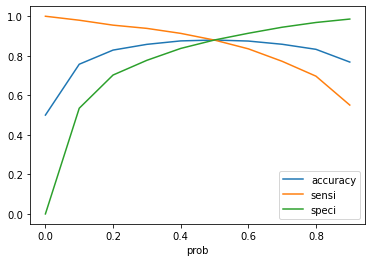

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

> From the above graph we can see that 0.525 is the optimum point to take as cutoff probability.

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0    0.000437   0          0    1    0    0    0    0    0    0    0   
1      0    0.001903   1          0    1    0    0    0    0    0    0    0   
2      0    0.118226   2          0    1    1    0    0    0    0    0    0   
3      0    0.335999   3          0    1    1    1    1    0    0    0    0   
4      1    0.832811   4          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    0    0                0  
4    1    0                1

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8796084744002493

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16945,  2313],
       [ 2324, 16934]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.879322878803614

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.8798940699968845

In [144]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12010593000311559


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8798254273393256


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8793917691629042


### Precision & Recall Tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

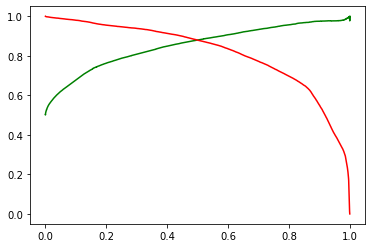

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Test Set

In [150]:
# Scaling the test data
num_col = X_test.select_dtypes(include = ['int64','float64']).columns.tolist()
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
25321 -0.427503    -0.240655    -0.237110     -0.149027     -0.201863   
28048 -0.016676    -0.251059    -0.224434      0.052000      0.077998   
10133 -0.428521    -0.312605    -0.180121     -0.535828     -0.182765   
28877  0.378637    -0.312605     1.873091     -0.526481     -0.376911   
18927 -1.000788    -0.152022    -0.259376     -0.125564     -0.312766   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
25321     -0.307698           0.00           0.00            0.0   
28048      0.469867           0.00           0.00            0.0   
10133     -0.202518          20.19           0.81            0.0   
28877     -0.292448           6.94           0.00            0.0   
18927     -0.471590           0.00           0.00            0.0   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
25321           0.00           0.00            0.0      0.184586   
28048           0.00           0.00            0.0      0.086846   
10133           0.21           0.00            0.0     -0.411575   
28877           4.06           2.55            0.0     -0.411575   
18927           0.00           0.00            0.0     -0.003876   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
25321     -0.098009     -0.089919     -0.075345     -0.044402     -0.101744   
28048      0.106938      0.078504      0.152749     -0.044402     -0.101744   
10133     -0.100247      0.208644      0.336243     -0.044402      2.889535   
28877     -0.100247      1.065090      1.603812     -0.044402      0.854651   
18927      0.094536      0.003378     -0.075345     -0.044402     -0.101744   

       spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
25321      0.142384          0.0          0.0          0.0       -0.311872   
28048     -0.071192          0.0          0.0          0.0       -0.204164   
10133      2.711921          0.0          0.0          0.0       -0.552976   
28877     -0.071192          0.0          0.0          0.0       -0.552976   
18927     -0.071192          0.0          0.0          0.0       -0.266234   

       loc_ic_mou_6  loc_ic_mou_7  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
25321      0.143882      0.090691     -0.283790     -0.261320     -0.244885   
28048      0.238423      0.104408      0.580069      1.618554      1.163751   
10133     -0.541616     -0.540481     -0.283790      0.816785      2.467050   
28877     -0.541616     -0.315057     -0.283790     -0.023629      0.231201   
18927      0.062639     -0.177962      3.664300      2.486439     -0.244885   

       spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
25321          0.29           0.0           0.0          0.00          0.00   
28048          0.00           0.0           0.0          4.54          0.43   
10133          0.00           0.0           0.0          0.00          0.00   
28877          0.00           0.0           0.0          0.00          0.00   
18927          0.00           0.0           0.0          0.00          0.00   

       isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
25321           0.0         10.8         0.00         3.70          0.444444   
28048           0.0          0.0         0.00         0.00         -0.333333   
10133           0.0          0.0         0.33         0.56         -0.666667   
28877           0.0          0.0         0.00         0.00         -0.666667   
18927           0.0          1.2         0.00         0.00         -0.111111   

       total_rech_num_7  total_rech_num_8  max_rech_amt_6  max_rech_amt_7  \
25321          0.111111          0.333333        0.655556        0.188889   
28048         -0.333333         -0.333333        1.444444        0.288889   
10133         -0.111111          0.000000       -1.333333        0.777778   
28877          0.777778          0.444444       -1.000000        0.28

In [151]:
col = X_train_rfe.columns
col

Index(['arpu_8', 'offnet_mou_7', 'offnet_mou_8', 'loc_ic_mou_7',
       'spl_ic_mou_8', 'max_rech_data_8', 'night_pck_user_6',
       'night_pck_user_7', 'avg_arpu_6_7',
       'total_rech_data_group_8_<=10_Recharges',
       'total_rech_data_group_8_10-25_Recharges',
       'total_rech_num_group_8_<=10_Recharges',
       'total_rech_num_group_8_10-25_Recharges',
       'total_rech_num_group_8_>25_Recharges', 'tenure_range_6-12 Months',
       'tenure_range_1-2 Yrs', 'tenure_range_2-5 Yrs',
       'tenure_range_5 Yrs and above'],
      dtype='object')

In [152]:
X_test_lr = X_test[col]
X_test_lr.head()

arpu_8  offnet_mou_7  offnet_mou_8  loc_ic_mou_7  spl_ic_mou_8  \
25321 -0.427503     -0.201863     -0.307698      0.090691           0.0   
28048 -0.016676      0.077998      0.469867      0.104408           0.0   
10133 -0.428521     -0.182765     -0.202518     -0.540481           0.0   
28877  0.378637     -0.376911     -0.292448     -0.315057           0.0   
18927 -1.000788     -0.312766     -0.471590     -0.177962           0.0   

       max_rech_data_8  night_pck_user_6  night_pck_user_7  avg_arpu_6_7  \
25321         0.837662                 0                 0     -0.473667   
28048        -0.149351                 0                 0      0.327879   
10133         0.487013                 0                 0     -1.084937   
28877         0.850649                 0                 0     -0.133411   
18927        -0.149351                 0                 0      0.504923   

       total_rech_data_group_8_<=10_Recharges  \
25321                                       1   
28048                                       0   
10133                                       1   
28877                                       1   
18927                                       0   

       total_rech_data_group_8_10-25_Recharges  \
25321                                        0   
28048                                        0   
10133                                        0   
28877                                        0   
18927                                        0   

       total_rech_num_group_8_<=10_Recharges  \
25321                                      0   
28048                                      1   
10133                                      1   
28877                                      0   
18927                                      0   

       total_rech_num_group_8_10-25_Recharges  \
25321                                       1   
28048                                       0   
10133                                       0   
28877                                       1   
18927                                       0   

       total_rech_num_group_8_>25_Recharges  tenure_range_6-12 Months  \
25321                                     0                         0   
28048                                     0                         0   
10133                                     0                         1   
28877                                     0                         0   
18927                                     0                         0   

       tenure_range_1-2 Yrs  tenure_range_2-5 Yrs  \
25321                     1                     0   
28048                     0                     1   
10133                     0                     0   
28877                     0                     1   
18927                     1                     0   

       tenure_range_5 Yrs and above  
25321                             0  
28048                             0  
10133                             0  
28877                             0  
18927                             0

In [153]:
X_test_sm = sm.add_constant(X_test_lr)

#### Making predictions on test dataset

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

25321    0.037865
28048    0.226145
10133    0.103574
28877    0.019567
18927    0.992433
24680    0.080660
14161    0.000298
217      0.003654
11358    0.094533
12348    0.084580
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head
y_pred_1.head()

0
25321  0.037865
28048  0.226145
10133  0.103574
28877  0.019567
18927  0.992433

In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [159]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

churn     ID         0
0      0  25321  0.037865
1      0  28048  0.226145
2      0  10133  0.103574
3      0  28877  0.019567
4      1  18927  0.992433

In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [164]:
# Rearranging the columns
y_pred_final = y_pred_final[['ID','churn','Churn_Prob']]

In [165]:
# Let's see the head of y_pred_final
y_pred_final.head()

ID  churn  Churn_Prob
0  25321      0    0.037865
1  28048      0    0.226145
2  10133      0    0.103574
3  28877      0    0.019567
4  18927      1    0.992433

In [166]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.525 else 0)

In [167]:
y_pred_final.head()

ID  churn  Churn_Prob  final_predicted
0  25321      0    0.037865                0
1  28048      0    0.226145                0
2  10133      0    0.103574                0
3  28877      0    0.019567                0
4  18927      1    0.992433                1

**Metrics:**

In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8712561466249441

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7356,  846],
       [ 306,  440]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5898123324396782

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.8968544257498171

## DecisionTreeClassifier

In [173]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

**Evaluating Model Performance**

In [174]:
y_test_pred_default = dt.predict(X_test)

print(confusion_matrix(y_test,y_test_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_test_pred_default))

[[8084  118]
 [ 463  283]]
Acuracy Score 0.9350692892266428


In [175]:
confusion_tree = confusion_matrix(y_test,y_test_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_test_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.9350692892266428
Sensitivity:  0.37935656836461124
Specificity:  0.9856132650573031
false postive rate:  0.014386734942696903
positive predictive value:  0.7057356608478803
Negative predictive value:  0.9458289458289458
Misclassification Rate:  0.06493071077335717


As we can see above Sensitivity of model is not great let's tune the Hyperparameter.

### Hyperparameter Tuning

In [176]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [177]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

#### Model 1

In [178]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 50, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, n_jobs=-1, verbose=1,
                   scoring="accuracy")
tree.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 50, 5)},
             scoring='accuracy', verbose=1)

In [179]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.110998      0.007067         0.007600        0.000801   
1       0.483796      0.024734         0.007800        0.000400   
2       0.694796      0.011196         0.007801        0.000400   
3       0.893798      0.005382         0.007600        0.000490   
4       0.965397      0.014813         0.008400        0.000491   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.885297           0.872335   
1               6   {'max_depth': 6}           0.848659           0.857485   
2              11  {'max_depth': 11}           0.878352           0.886707   
3              16  {'max_depth': 16}           0.895115           0.906587   
4              21  {'max_depth': 21}           0.906849           0.909222   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.885988           0.883114           0.879281         0.881203   
1           0.816048           0.863713           0.871377         0.851456   
2           0.880479           0.895569           0.881198         0.884461   
3           0.908263           0.901078           0.906347         0.903478   
4           0.907784           0.906826           0.911856         0.908507   

   std_test_score  rank_test_score  
0        0.005013                9  
1        0.019209               10  
2        0.006201                8  
3        0.004827                7  
4        0.001888                6

**We can see that as the max_depth increases the mean_test_score increases.**

In [180]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", tree.best_score_)
print(tree.best_estimator_)

best accuracy 0.9128664854199646
DecisionTreeClassifier(class_weight='balanced', max_depth=36, random_state=100)


In [181]:
dt_best = tree.best_estimator_

In [182]:
evaluate_model(dt_best)

Train Accuracy : 0.9902759149262311
Train Confusion Matrix:
[[19055   203]
 [    0  1618]]
--------------------------------------------------
Test Accuracy : 0.9078006258381761
Test Confusion Matrix:
[[7768  434]
 [ 391  355]]


**The train accuracy is clearly too high and is a result of overfitting. Lets look at some other metrics.**

In [183]:
y_pred_default = dt_best.predict(X_test)
confusion_tree_hyper=confusion_matrix(y_test,y_test_pred_default)
confusion_tree_hyper

array([[8084,  118],
       [ 463,  283]], dtype=int64)

In [184]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.37935656836461124
Specificity:  0.9856132650573031
false postive rate:  0.014386734942696903
positive predictive value:  0.7057356608478803
Negative predictive value:  0.9458289458289458
Misclassification Rate:  0.06493071077335717


**The sensitivity rate seems to be very low. Lets further try to tune the hyperparameteres.**

#### Model 2

In [185]:
## Tuning min sample split
# parameters to build the model on
parameters = { 'max_depth': range(5, 35, 5),
            'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, n_jobs=-1, verbose=1, 
                   scoring="accuracy")
tree.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 35, 5),
                         'min_samples_split': range(5, 200, 20)},
             scoring='accuracy', verbose=1)

> Keeping the range of max_depth from 5-35 as previously we had 36 as the best max_depth. We need to also see that the model should not overfit, hence the choice. Trying out the min_samples split range of 5-200 with steps of 20.

In [186]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.378860      0.010585         0.018753        0.006248   
1       0.369070      0.007598         0.009373        0.007653   
2       0.361913      0.009026         0.013680        0.007214   
3       0.368748      0.007656         0.003124        0.006248   
4       0.368752      0.012500         0.009375        0.007655   

  param_max_depth param_min_samples_split  \
0               5                       5   
1               5                      25   
2               5                      45   
3               5                      65   
4               5                      85   

                                      params  split0_test_score  \
0   {'max_depth': 5, 'min_samples_split': 5}           0.860872   
1  {'max_depth': 5, 'min_samples_split': 25}           0.860872   
2  {'max_depth': 5, 'min_samples_split': 45}           0.860872   
3  {'max_depth': 5, 'min_samples_split': 65}           0.861111   
4  {'max_depth': 5, 'min_samples_split': 85}           0.861111   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.852695           0.884072           0.881198           0.884311   
1           0.852695           0.884072           0.881198           0.884311   
2           0.852695           0.884072           0.881198           0.884311   
3           0.852695           0.884072           0.880719           0.884311   
4           0.852695           0.884072           0.880958           0.884311   

   mean_test_score  std_test_score  rank_test_score  
0         0.872629        0.013240               12  
1         0.872629        0.013240               12  
2         0.872629        0.013240               12  
3         0.872582        0.013137               16  
4         0.872629        0.013167               15

In [187]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", tree.best_score_)
print(tree.best_estimator_)

best accuracy 0.9085555899694864
DecisionTreeClassifier(class_weight='balanced', max_depth=25,
                       min_samples_split=5, random_state=100)


> The best measures of hyperparameters are: max_depth=25, min_samples_split=5. 

In [188]:
dt_best = tree.best_estimator_

In [189]:
evaluate_model(dt_best)

Train Accuracy : 0.9780130293159609
Train Confusion Matrix:
[[18799   459]
 [    0  1618]]
--------------------------------------------------
Test Accuracy : 0.9051184622261959
Test Confusion Matrix:
[[7687  515]
 [ 334  412]]


> Although the accuracy for the train set has gone down, it is still is too high and is a consequence of a case of overfitting.

In [190]:
y_pred_default = dt_best.predict(X_test)
confusion_tree_hyper=confusion_matrix(y_test,y_test_pred_default)
confusion_tree_hyper

array([[8084,  118],
       [ 463,  283]], dtype=int64)

In [191]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.37935656836461124
Specificity:  0.9856132650573031
false postive rate:  0.014386734942696903
positive predictive value:  0.7057356608478803
Negative predictive value:  0.9458289458289458
Misclassification Rate:  0.06493071077335717


> The sensitivity is still low.

#### Model 3

In [192]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 240, 30),
    'min_samples_split': range(5, 240, 30),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 240, 30),
                         'min_samples_split': range(5, 240, 30)},
             refit='recall_score', verbose=1)

In [193]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.572504      0.014613         0.009850        0.005884   
1       0.550392      0.022255         0.009801        0.002139   
2       0.529195      0.005562         0.009802        0.001166   
3       0.531198      0.007470         0.009198        0.000747   
4       0.537997      0.009099         0.008401        0.001497   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                      5   
1         entropy               5                      5   
2         entropy               5                      5   
3         entropy               5                      5   
4         entropy               5                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      35  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      65  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      95  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                     125  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.840038           0.858922           0.882156           0.860599   
1           0.840038           0.858922           0.882156           0.860599   
2           0.840278           0.858922           0.882156           0.860599   
3           0.840278           0.858922           0.882156           0.860599   
4           0.842433           0.858683           0.883593           0.858204   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.883353         0.865014        0.016190               46  
1           0.883353         0.865014        0.016190               46  
2           0.883353         0.865062        0.016116               44  
3           0.883353         0.865062        0.016116               44  
4           0.886707         0.865924        0.016781               42

In [194]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8749769541377017
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=65, min_samples_split=35)


In [195]:
dt_best = grid_search.best_estimator_

In [196]:
evaluate_model(dt_best)

Train Accuracy : 0.8764610078559111
Train Confusion Matrix:
[[17015  2243]
 [  336  1282]]
--------------------------------------------------
Test Accuracy : 0.8682387125614662
Test Confusion Matrix:
[[7219  983]
 [ 196  550]]


> We have a train and test accuracy which are approximately close to each other. This model is not overfitting and is the best model yet. However, we must look at the other metrics.

In [198]:
y_pred_default = dt_best.predict(X_test)
confusion_tree_hyper=confusion_matrix(y_test,y_test_pred_default)
confusion_tree_hyper

array([[8084,  118],
       [ 463,  283]], dtype=int64)

In [199]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.37935656836461124
Specificity:  0.9856132650573031
false postive rate:  0.014386734942696903
positive predictive value:  0.7057356608478803
Negative predictive value:  0.9458289458289458
Misclassification Rate:  0.06493071077335717


> The sensitivity has still not budged and is low.

#### Model 4

In [200]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 2),
    'min_samples_leaf': range(5, 60, 10),
    'min_samples_split': range(5, 50, 10),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(5, 60, 10),
                         'min_samples_split': range(5, 50, 10)},
             refit='recall_score', verbose=1)

> Narrowing down the range of the hyperparameters in order to gain a better result.

In [201]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.162397      0.017815         0.009001        0.001898   
1       0.188596      0.021002         0.010600        0.004924   
2       0.188196      0.026927         0.011601        0.007255   
3       0.173798      0.029059         0.011800        0.006147   
4       0.180198      0.025260         0.009001        0.000632   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               1                      5   
1         entropy               1                      5   
2         entropy               1                      5   
3         entropy               1                      5   
4         entropy               1                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
1                      15  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
2                      25  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
3                      35  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
4                      45  {'criterion': 'entropy', 'max_depth': 1, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.885297           0.883114           0.885988           0.883114   
1           0.885297           0.883114           0.885988           0.883114   
2           0.885297           0.883114           0.885988           0.883114   
3           0.885297           0.883114           0.885988           0.883114   
4           0.885297           0.883114           0.885988           0.883114   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.894611         0.886425        0.004252                1  
1           0.894611         0.886425        0.004252                1  
2           0.894611         0.886425        0.004252                1  
3           0.894611         0.886425        0.004252                1  
4           0.894611         0.886425        0.004252                1

In [202]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8864246564342579
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1, min_samples_leaf=5, min_samples_split=5)


In [203]:
dt_best = grid_search.best_estimator_

In [204]:
evaluate_model(dt_best)

Train Accuracy : 0.8855144663728683
Train Confusion Matrix:
[[17600  1658]
 [  732   886]]
--------------------------------------------------
Test Accuracy : 0.8862315601251677
Test Confusion Matrix:
[[7542  660]
 [ 358  388]]


In [205]:
y_pred_default = dt_best.predict(X_test)
confusion_tree_hyper=confusion_matrix(y_test,y_test_pred_default)
confusion_tree_hyper

array([[8084,  118],
       [ 463,  283]], dtype=int64)

In [206]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.37935656836461124
Specificity:  0.9856132650573031
false postive rate:  0.014386734942696903
positive predictive value:  0.7057356608478803
Negative predictive value:  0.9458289458289458
Misclassification Rate:  0.06493071077335717


> Both the accuracy for train and test set are 88. This is because the max_depth = 1. There is no depth and we cannot use this model as it is too weak. The sensitivity is higher in this model but it doesn't matter. Thus model 3 is the best out of the models that we have evaluated.

## RandomForestClassifier 

> Creating a default random forest just to look at the metrics.

In [207]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(X_train,y_train)

# Making predictions
y_pred_default = rfc.predict(X_test)

In [208]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8105,   97],
       [ 455,  291]], dtype=int64)

In [209]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.3900804289544236
Specificity:  0.9881736161911728
false postive rate:  0.011826383808827116
positive predictive value:  0.75
Negative predictive value:  0.9468457943925234
Misclassification Rate:  0.06168976307554761


## Hyperparameter Tuning in RandomForest

In [210]:
def evaluate_model_rf(rf_classifier):
    print("Train Accuracy :", accuracy_score(y_train, rf_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, rf_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, rf_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, rf_classifier.predict(X_test)))

#### Model 1

In [211]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators

from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_default = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_default.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             scoring='accuracy')

In [212]:
# scores of GridSearch CV
scores = rf_default.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.233219      0.014598         0.053126        0.007657   
1       3.441316      0.022360         0.076904        0.002450   
2       4.933672      0.052625         0.097600        0.004964   
3       5.377339      0.108518         0.091199        0.011270   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.884100           0.862754   
1               7   {'max_depth': 7}           0.896312           0.912575   
2              12  {'max_depth': 12}           0.931992           0.939401   
3              17  {'max_depth': 17}           0.939416           0.943713   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.859641           0.874251           0.861796         0.868509   
1           0.915449           0.904431           0.914012         0.908556   
2           0.942994           0.935329           0.940359         0.938015   
3           0.945868           0.942275           0.946587         0.943572   

   std_test_score  rank_test_score  
0        0.009304                4  
1        0.007216                3  
2        0.003891                2  
3        0.002582                1

**We can clearly see that as the max_depth increases the mean_test_score increases.**

In [263]:
evaluate_model_rf(rf_default.best_estimator_)

Train Accuracy : 0.9874497030082391
Train Confusion Matrix:
[[18999   259]
 [    3  1615]]
--------------------------------------------------
Test Accuracy : 0.9388690210102816
Test Confusion Matrix:
[[8023  179]
 [ 368  378]]


> The train accuracy is too high. Lets try to tune the hyperparameters further for a better result. This time we input a range on n_estimators.

In [214]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 500, 200)},
             scoring='accuracy')

In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.416901      0.019297         0.099049        0.008607   
1      13.115477      0.411488         0.236769        0.020023   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.921695   
1                300  {'n_estimators': 300}           0.922414   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.933413           0.936527           0.928862           0.934371   
1           0.934132           0.938922           0.930539           0.935569   

   mean_test_score  std_test_score  rank_test_score  
0         0.930974        0.005270                2  
1         0.932315        0.005634                1

> From this we know that 300 seems to be the optimal n_estimators value to use. Lets further tune the hyperparameters. This time looking at max_features.

In [216]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             scoring='accuracy')

In [217]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.286188      0.029758         0.103125        0.015934   
1       4.016043      0.023167         0.091949        0.005079   
2       7.001234      0.378781         0.089725        0.006095   
3      10.072431      0.205010         0.093400        0.017408   
4      11.216370      0.471437         0.070859        0.013393   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.919061   
1                  8   {'max_features': 8}           0.922174   
2                 14  {'max_features': 14}           0.923851   
3                 20  {'max_features': 20}           0.925048   
4                 24  {'max_features': 24}           0.924808   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.929341           0.931737           0.918323           0.928623   
1           0.932216           0.937246           0.928862           0.936287   
2           0.933892           0.937725           0.930060           0.936766   
3           0.934611           0.936287           0.929820           0.936527   
4           0.936527           0.936287           0.930060           0.934850   

   mean_test_score  std_test_score  rank_test_score  
0         0.925417        0.005592                5  
1         0.931357        0.005482                4  
2         0.932459        0.005064                2  
3         0.932459        0.004421                3  
4         0.932507        0.004499                1

> The mean_test_score for all of the max_features is around 93. Lets look at the metrics.

In [218]:
evaluate_model(rf.best_estimator_)

Train Accuracy : 0.958948074343744
Train Confusion Matrix:
[[18553   705]
 [  152  1466]]
--------------------------------------------------
Test Accuracy : 0.9275815824765311
Test Confusion Matrix:
[[7830  372]
 [ 276  470]]


> The train accuracy has come down but we should make a model where it should be as close to the test accuracy. Lets try to look at min_samples_split.

In [290]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             scoring='accuracy')

In [291]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.155376      0.126850         0.065400        0.006474   
1       4.072817      0.116226         0.070331        0.006568   
2       3.871944      0.046003         0.068745        0.007655   
3       3.761619      0.055060         0.068987        0.007961   
4       3.677581      0.034344         0.066314        0.006013   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.889607   
1                     250  {'min_samples_split': 250}           0.877874   
2                     300  {'min_samples_split': 300}           0.874521   
3                     350  {'min_samples_split': 350}           0.868774   
4                     400  {'min_samples_split': 400}           0.862069   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.895569           0.896766           0.887425           0.906587   
1           0.885749           0.884311           0.885988           0.901557   
2           0.882635           0.879521           0.881198           0.892216   
3           0.877844           0.876407           0.871617           0.888862   
4           0.869940           0.871856           0.870180           0.888383   

   mean_test_score  std_test_score  rank_test_score  
0         0.895191        0.006693                1  
1         0.887096        0.007810                2  
2         0.882018        0.005788                3  
3         0.876701        0.006899                4  
4         0.872486        0.008642                5

> The mean_test score for all of the min_samples_split we chose is around 88. Lets look at the accuracy.

In [292]:
evaluate_model(rf)

Train Accuracy : 0.9100402375934087
Train Confusion Matrix:
[[17627  1631]
 [  247  1371]]
--------------------------------------------------
Test Accuracy : 0.8989718372820742
Test Confusion Matrix:
[[7485  717]
 [ 187  559]]


> The min_samples_split hyperparameter has given the best accuracy for both the train and test accuracy so far. Lets now put all the other hyperparameters together to see how to model fits.

In [222]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(100, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [223]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(100, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [225]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8841256567325122 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [281]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [284]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [285]:
evaluate_model_rf(rfc)

Train Accuracy : 0.8884364820846905
Train Confusion Matrix:
[[17221  2037]
 [  292  1326]]
--------------------------------------------------
Test Accuracy : 0.8839964237818507
Test Confusion Matrix:
[[7349  853]
 [ 185  561]]


In [236]:
# predict
y_pred_default = rfc.predict(X_test)

In [286]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      8202
           1       0.40      0.75      0.52       746

    accuracy                           0.89      8948
   macro avg       0.69      0.83      0.73      8948
weighted avg       0.93      0.89      0.90      8948

[[7359  843]
 [ 184  562]]
accuracy_score:   0.8852257487706751


In [287]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7359,  843],
       [ 184,  562]], dtype=int64)

In [288]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8852257487706751
Sensitivity:  0.7533512064343163
Specificity:  0.8972201901975128
false postive rate:  0.1027798098024872
positive predictive value:  0.4
Negative predictive value:  0.9756065226037386
Misclassification Rate:  0.11477425122932498


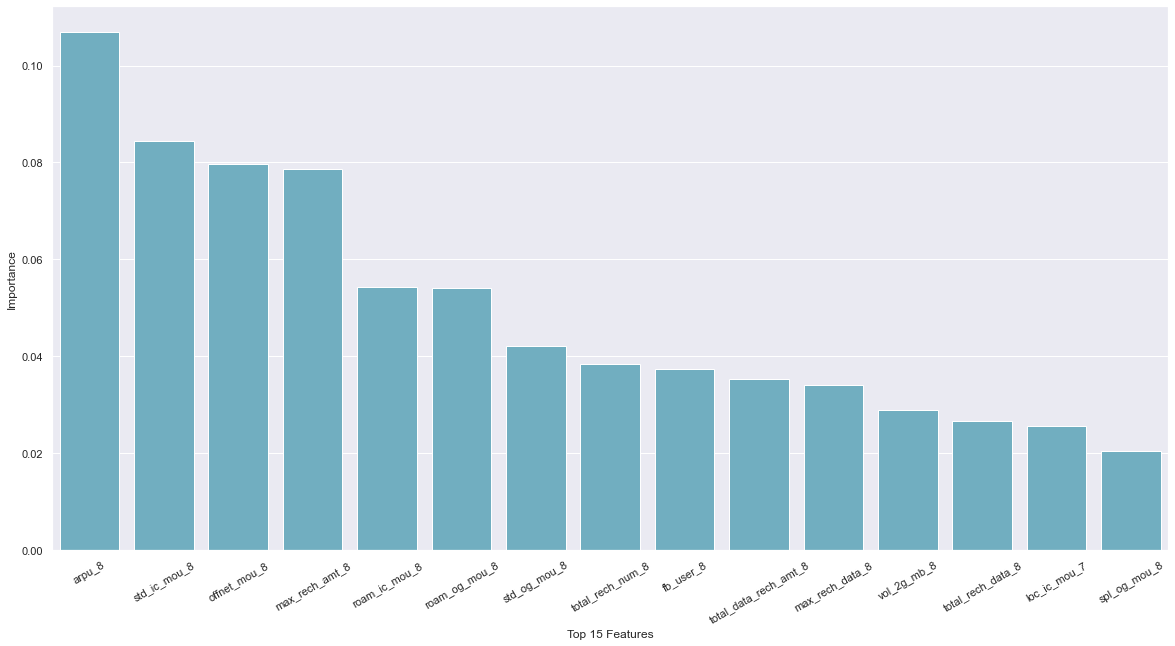

In [289]:
imp=rfc.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:15], color = 'c')
labels = ax.get_xticklabels()
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
ax.set_xticklabels(labels, rotation=30)
plt.show()

## Analysis & Recommendation:

- We have consistently used the following metrics for our model evaluation:
    - Accuracy
    - Sensitivity
    - Specificity
    - False Positive Rate
    - Positive Predictive Value
    - Negative Predictive Value
    - Misclassification Rate
- Arpu 8th - Average Revenue per user decreases and by month 8 we can see that the users are churned.
- Lower the std_ic_mou_8 higher is the churn rate. Therefore, the company must focus more on users that have lower number of incoming calls as they have a high probability of churning. 
- std_og_mou_8 - Focus on users having less number of outgoing calls in the month of 8.
- roam_ic_mou_8 - The company must also focus on users having increased incoming roaming amount, as they are likely to churn.
- Higher the offnet_mou_8, higher the churn rate. This means that the company must focus on users having calls outside the operator network.
- max_rech_amt_8 - Focus on the customer whoes Avg max recharge amount has been decreased.
- max_rech_data_8 - Focus on the customer whoes Avg max recharge data has been decreased.
- total_rech_data_amt_8 - Focus on users having less amount of recharge data amount in the month of 8. They have a high chance of churning.
- fb_user seems to be an important variable that determines the churning of the user.
- total_rech_num_8 & total_rech_data_8 - Focus on users with less number of recharge for both their calls and data as they are likely to churn.
- spl_og_mou_8 - Focus on users having less number of special outgoing calls in the month of 8.
- loc_ic_mou_7 - Focus on users having less number of local incoming calls in the month of 7.
- Better internet coverage of 2G/3G where services are not good. This is also a strong indicator.

> As per our analysis, Random Forest has the best score of accuracy along with other metrics such as sensitivity, specificity, FPR, PPV, NPV & Misclassification Rate, where sensitivity has played a great role in identifying the best method. 

Note: Although the accuracy for all the 3 methods viz., Logistic Regression, Decision Tree Classifier and Random Forest Classifier had similar and precise accuracy for both their train and test data sets, only Random Forest Classifier had the best and most optimal sensitivity out of all the models.